In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [362]:
df_with_upsets

team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  \
0    BAL          5.200000   0.057377       0.106557          94.631353   
1    DEN          6.254767   0.064801       0.120766          96.524064   
2    IND          5.612999   0.066561       0.120444          97.389413   
3    MIA          5.840568   0.068740       0.121113          95.538721   
4    MIN          4.335048   0.045190       0.086006          95.064541   
..   ...               ...        ...            ...                ...   
291  MIN         11.418440   0.065333       0.214667          89.067055   
292  PHI          9.457364   0.062500       0.185976          91.471215   
293  PIT         10.584752   0.058480       0.209064          88.657574   
294   TB         11.385062   0.061333       0.209333          93.066476   
295  WAS          9.292035   0.069579       0.203883          91.365888   

     sacks_allowed_rate  protection_rate        primary_qb            coach  \
0              0.072027         0.874372        Tony Banks    Brian Billick   
1              0.045113         0.921805      Brian Griese    Mike Shanahan   
2              0.030817         0.944530    Peyton Manning         Jim Mora   
3              0.058190         0.885776       Jay Fiedler   Dave Wannstedt   
4              0.057283         0.893617  Daunte Culpepper     Dennis Green   
..                  ...              ...               ...              ...   
291            0.072700         0.777448       Sam Darnold  Kevin O'Connell   
292            0.079646         0.787611       Jalen Hurts    Nick Sirianni   
293            0.079160         0.744750    Russell Wilson      Mike Tomlin   
294            0.058055         0.859216    Baker Mayfield      Todd Bowles   
295            0.072464         0.823188    Jayden Daniels        Dan Quinn   

     passing_epa  ...  momentum_residual_a  predicted_finish_b  \
0      -0.058830  ...             0.253079            0.761553   
1       0.170375  ...             0.106172            0.693224   
2       0.248321  ...            -0.039934            0.695797   
3       0.080670  ...            -0.059698            0.700871   
4       0.187037  ...            -0.265320            0.628229   
..           ...  ...                  ...                 ...   
291     0.133091  ...             0.138578            0.710302   
292     0.163234  ...             0.034465            0.760102   
293     0.047466  ...            -0.399708            0.635034   
294     0.208587  ...             0.082386            0.712793   
295     0.210168  ...             0.365238            0.686850   

     momentum_residual_b  momentum_residual_a_std  momentum_residual_b_std  \
0               0.238447                 1.365842                 1.149577   
1               0.106776                 0.412741                 0.361912   
2              -0.095797                -0.535170                -0.849880   
3              -0.100871                -0.663392                -0.880235   
4              -0.228229                -1.997430                -1.642095   
..                   ...                      ...                      ...   
291             0.089698                 0.745432                 0.519262   
292             0.039898                 0.183836                 0.272927   
293            -0.435034                -2.158118                -2.076339   
294             0.087207                 0.442328                 0.506941   
295             0.313150                 1.968047                 1.624577   

     momentum_residual         momentum_bin  champion  upset  upset_winner  
0             1.365842      Very Hot\n(>1σ)         1     No            No  
1             0.412741    Warm\n(0 to 0.5σ)         0     No            No  
2            -0.535170  Cold\n(-1 to -0.5σ)         0     No            No  
3            -0.663392  Cold\n(-1 to -0.5σ)         0     No            No  
4            -1.997430    Very Cold\n(<

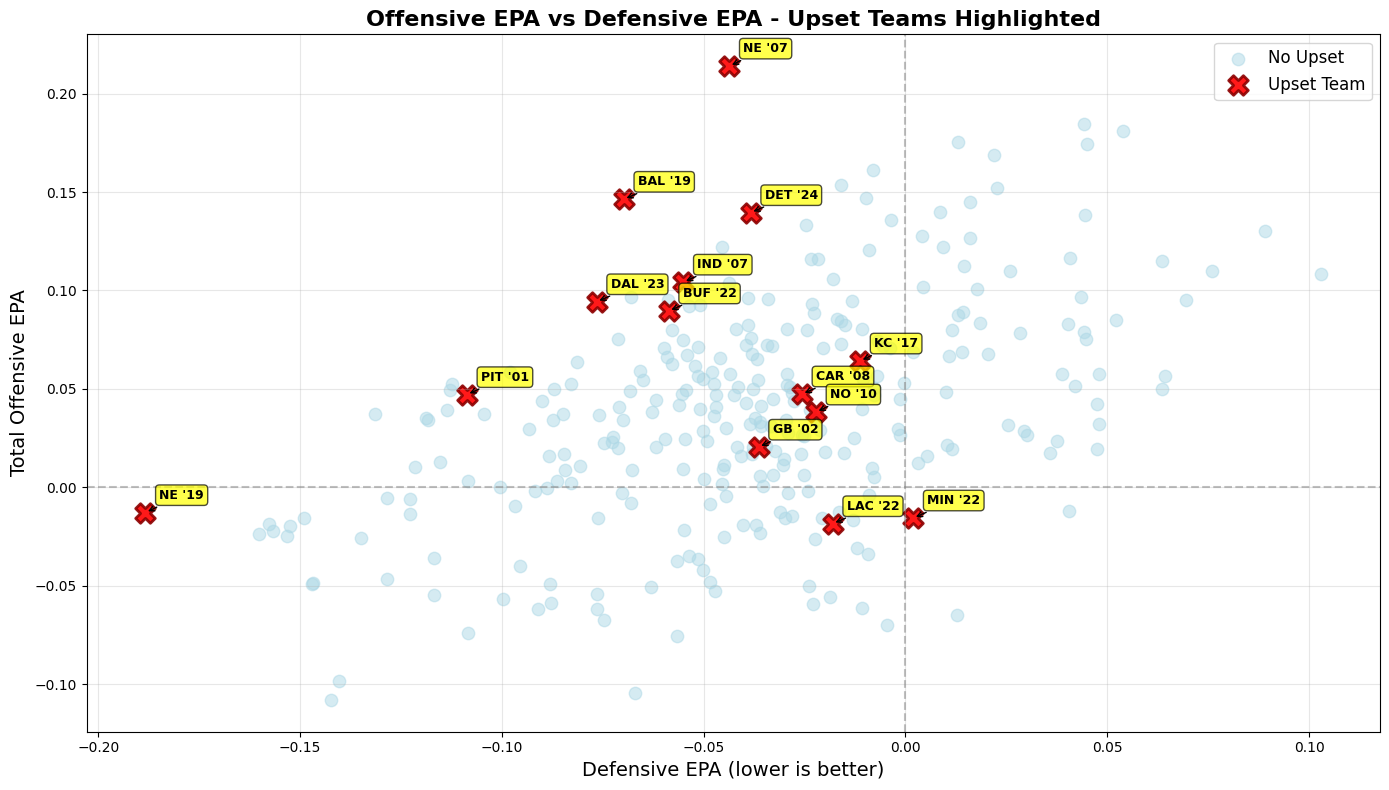

Upset Teams Statistics:
Average Offensive EPA (upset teams): 0.069
Average Defensive EPA (upset teams): -0.054

Average Offensive EPA (all teams): 0.037
Average Defensive EPA (all teams): -0.037


In [363]:
# Create the plot
plt.figure(figsize=(14, 8))

# Plot upset teams with a different marker
upset_teams = df_with_upsets[df_with_upsets['upset'] == 'Yes']
regular_teams = df_with_upsets[df_with_upsets['upset'] == 'No']

# Plot regular teams first (so upset teams appear on top)
plt.scatter(regular_teams['defensive_epa'], 
           regular_teams['total_offensive_epa'],
           alpha=0.5, 
           s=80, 
           color='lightblue',
           label='No Upset')

# Plot upset teams with a distinct marker and color
plt.scatter(upset_teams['defensive_epa'], 
           upset_teams['total_offensive_epa'],
           alpha=0.9, 
           s=200, 
           color='red',
           marker='X',
           edgecolors='darkred',
           linewidths=2,
           label='Upset Team')

# Add labels for upset teams
for idx, row in upset_teams.iterrows():
    plt.annotate(f"{row['team']} '{str(row['season'])[2:]}", 
                xy=(row['defensive_epa'], row['total_offensive_epa']),
                xytext=(10, 10),  # offset the text
                textcoords='offset points',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black', lw=1))

plt.xlabel('Defensive EPA (lower is better)', fontsize=14)
plt.ylabel('Total Offensive EPA', fontsize=14)
plt.title('Offensive EPA vs Defensive EPA - Upset Teams Highlighted', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print some stats about upset teams
print("Upset Teams Statistics:")
print(f"Average Offensive EPA (upset teams): {upset_teams['total_offensive_epa'].mean():.3f}")
print(f"Average Defensive EPA (upset teams): {upset_teams['defensive_epa'].mean():.3f}")
print(f"\nAverage Offensive EPA (all teams): {regular_teams['total_offensive_epa'].mean():.3f}")
print(f"Average Defensive EPA (all teams): {regular_teams['defensive_epa'].mean():.3f}")

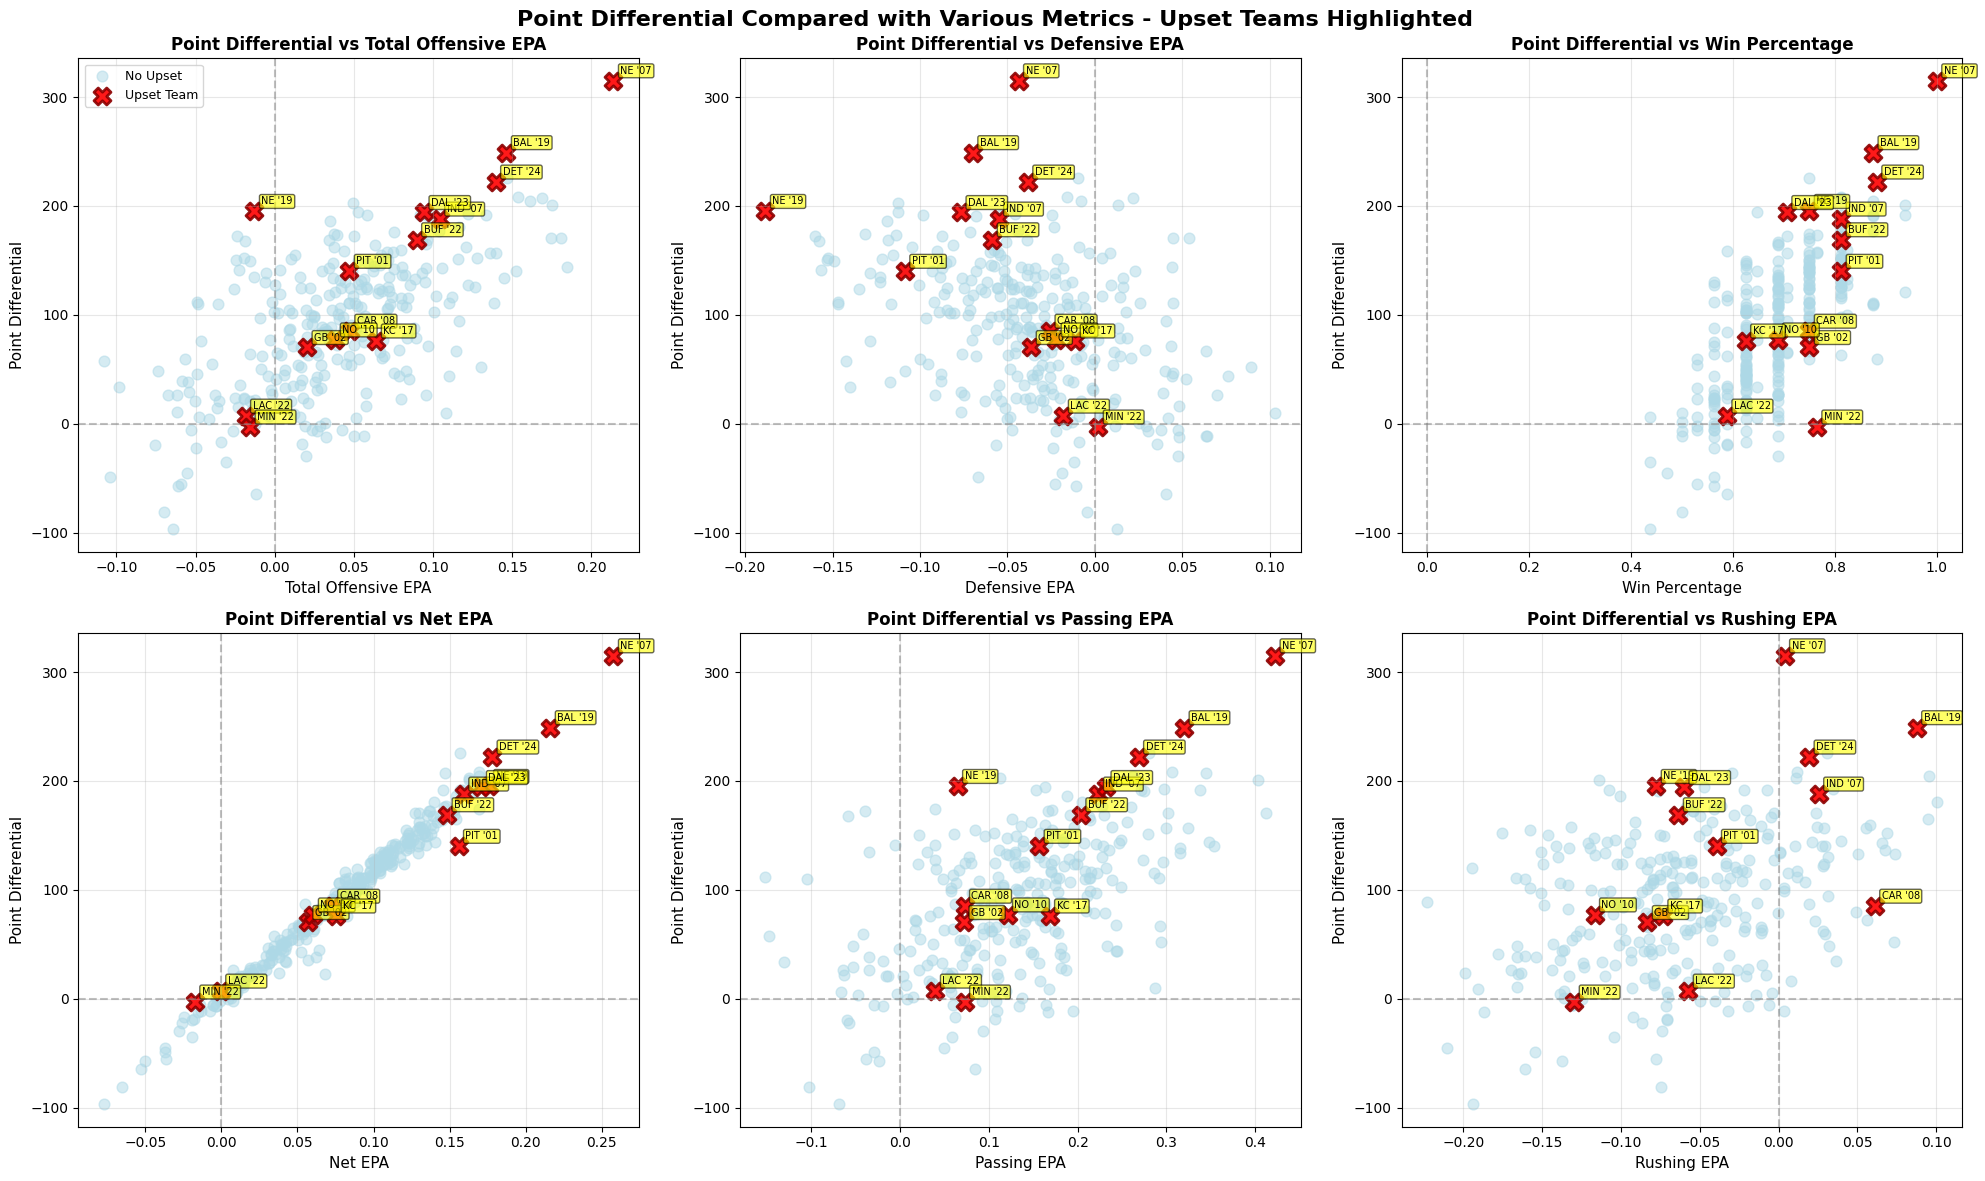

In [364]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

upset_teams = df_with_upsets[df_with_upsets['upset'] == 'Yes']
regular_teams = df_with_upsets[df_with_upsets['upset'] == 'No']

# List of variables to compare with point_differential
comparisons = [
    ('total_offensive_epa', 'Total Offensive EPA'),
    ('defensive_epa', 'Defensive EPA'),
    ('win_pct', 'Win Percentage'),
    ('net_epa', 'Net EPA'),
    ('passing_epa', 'Passing EPA'),
    ('rushing_epa', 'Rushing EPA')
]

# Create each subplot
for idx, (var, label) in enumerate(comparisons):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Plot regular teams
    ax.scatter(regular_teams[var], 
              regular_teams['point_differential'],
              alpha=0.5, 
              s=60, 
              color='lightblue',
              label='No Upset')
    
    # Plot upset teams
    ax.scatter(upset_teams[var], 
              upset_teams['point_differential'],
              alpha=0.9, 
              s=150, 
              color='red',
              marker='X',
              edgecolors='darkred',
              linewidths=2,
              label='Upset Team')
    
    # Add labels for upset teams
    for _, row_data in upset_teams.iterrows():
        ax.annotate(f"{row_data['team']} '{str(row_data['season'])[2:]}", 
                   xy=(row_data[var], row_data['point_differential']),
                   xytext=(5, 5),
                   textcoords='offset points',
                   fontsize=7,
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.6))
    
    ax.set_xlabel(label, fontsize=11)
    ax.set_ylabel('Point Differential', fontsize=11)
    ax.set_title(f'Point Differential vs {label}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    if idx == 0:
        ax.legend(fontsize=9)

plt.suptitle('Point Differential Compared with Various Metrics - Upset Teams Highlighted', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

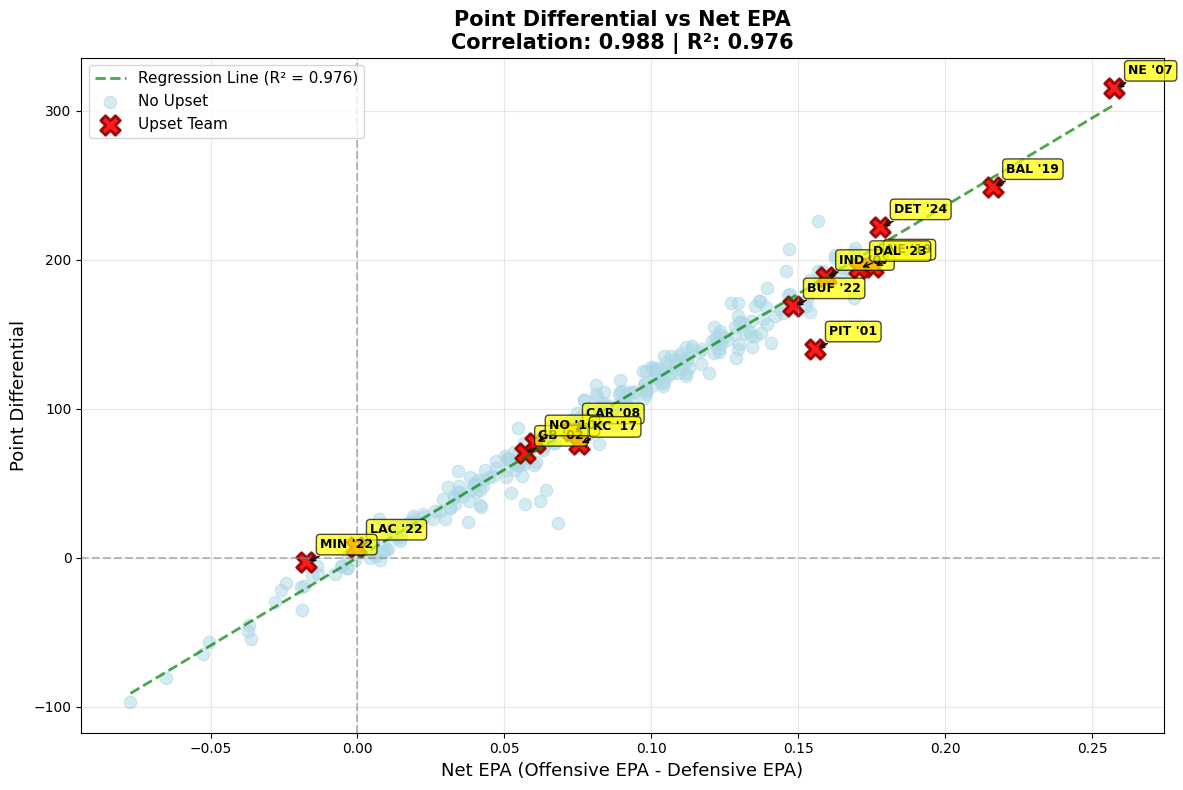

Correlation: 0.9882
R-squared: 0.9765
Equation: Point Differential = 1180.08 * Net EPA + -0.05
P-value: 1.69e-241

Upset Teams Analysis:
PIT '01: Net EPA = 0.156, Actual PD = 140, Expected PD = 184, Difference = -44
GB '02: Net EPA = 0.057, Actual PD = 70, Expected PD = 67, Difference = 3
IND '07: Net EPA = 0.159, Actual PD = 188, Expected PD = 188, Difference = 0
NE '07: Net EPA = 0.258, Actual PD = 315, Expected PD = 304, Difference = 11
CAR '08: Net EPA = 0.073, Actual PD = 85, Expected PD = 86, Difference = -1
NO '10: Net EPA = 0.060, Actual PD = 77, Expected PD = 71, Difference = 6
KC '17: Net EPA = 0.075, Actual PD = 76, Expected PD = 89, Difference = -13
BAL '19: Net EPA = 0.216, Actual PD = 249, Expected PD = 255, Difference = -6
NE '19: Net EPA = 0.176, Actual PD = 195, Expected PD = 207, Difference = -12
BUF '22: Net EPA = 0.148, Actual PD = 169, Expected PD = 175, Difference = -6
LAC '22: Net EPA = -0.000, Actual PD = 7, Expected PD = -0, Difference = 7
MIN '22: Net EPA = -0

In [365]:
# Create focused plot on Point Differential vs Net EPA
plt.figure(figsize=(12, 8))

upset_teams = df_with_upsets[df_with_upsets['upset'] == 'Yes']
regular_teams = df_with_upsets[df_with_upsets['upset'] == 'No']

# Calculate correlation and regression line for ALL teams
correlation = df_with_upsets['net_epa'].corr(df_with_upsets['point_differential'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df_with_upsets['net_epa'], 
                                                                 df_with_upsets['point_differential'])

# Create regression line
x_line = np.linspace(df_with_upsets['net_epa'].min(), df_with_upsets['net_epa'].max(), 100)
y_line = slope * x_line + intercept

# Plot regression line
plt.plot(x_line, y_line, 'g--', linewidth=2, label=f'Regression Line (R² = {r_value**2:.3f})', alpha=0.7)

# Plot regular teams
plt.scatter(regular_teams['net_epa'], 
           regular_teams['point_differential'],
           alpha=0.5, 
           s=80, 
           color='lightblue',
           label='No Upset')

# Plot upset teams
plt.scatter(upset_teams['net_epa'], 
           upset_teams['point_differential'],
           alpha=0.9, 
           s=200, 
           color='red',
           marker='X',
           edgecolors='darkred',
           linewidths=2,
           label='Upset Team')

# Add labels for upset teams
for _, row in upset_teams.iterrows():
    plt.annotate(f"{row['team']} '{str(row['season'])[2:]}", 
               xy=(row['net_epa'], row['point_differential']),
               xytext=(10, 10),
               textcoords='offset points',
               fontsize=9,
               fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

plt.xlabel('Net EPA (Offensive EPA - Defensive EPA)', fontsize=13)
plt.ylabel('Point Differential', fontsize=13)
plt.title(f'Point Differential vs Net EPA\nCorrelation: {correlation:.3f} | R²: {r_value**2:.3f}', 
         fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Correlation: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"Equation: Point Differential = {slope:.2f} * Net EPA + {intercept:.2f}")
print(f"P-value: {p_value:.2e}\n")

# Analyze upset teams specifically
print("Upset Teams Analysis:")
print("="*60)
for _, row in upset_teams.iterrows():
    expected_pd = slope * row['net_epa'] + intercept
    difference = row['point_differential'] - expected_pd
    print(f"{row['team']} '{str(row['season'])[2:]}: Net EPA = {row['net_epa']:.3f}, "
          f"Actual PD = {row['point_differential']:.0f}, "
          f"Expected PD = {expected_pd:.0f}, "
          f"Difference = {difference:.0f}")


In [366]:
# Let's quantify this
print("\nTeams that OVERPERFORMED their EPA (vulnerable to upset):")
vulnerable = upset_teams[upset_teams['point_differential'] > (slope * upset_teams['net_epa'] + intercept)]
print(vulnerable[['team', 'season', 'net_epa', 'point_differential']])

print("\nTeams that were LEGITIMATELY GREAT (true upsets):")
true_upsets = upset_teams[upset_teams['point_differential'] <= (slope * upset_teams['net_epa'] + intercept)]
print(true_upsets[['team', 'season', 'net_epa', 'point_differential']])


Teams that OVERPERFORMED their EPA (vulnerable to upset):
    team  season   net_epa  point_differential
22    GB    2002  0.056858                  70
77   IND    2007  0.159318                 188
79    NE    2007  0.257626                 315
115   NO    2010  0.060480                  77
260  LAC    2022 -0.000373                   7
262  MIN    2022 -0.017428                  -3
285  DET    2024  0.177911                 222

Teams that were LEGITIMATELY GREAT (true upsets):
    team  season   net_epa  point_differential
17   PIT    2001  0.155831                 140
89   CAR    2008  0.073139                  85
194   KC    2017  0.075453                  76
214  BAL    2019  0.216143                 249
220   NE    2019  0.175581                 195
255  BUF    2022  0.148344                 169
271  DAL    2023  0.170848                 194


In [367]:
# Separate by EPA level
print("VULNERABLE (Overperformed with low/negative EPA):")
vulnerable = upset_teams[(upset_teams['point_differential'] > (slope * upset_teams['net_epa'] + intercept)) & 
                         (upset_teams['net_epa'] < 0.10)]
print(vulnerable[['team', 'season', 'net_epa', 'point_differential']])

print("\nSUPER ELITE (Overperformed with already elite EPA):")
super_elite = upset_teams[(upset_teams['point_differential'] > (slope * upset_teams['net_epa'] + intercept)) & 
                          (upset_teams['net_epa'] >= 0.10)]
print(super_elite[['team', 'season', 'net_epa', 'point_differential']])

print("\nLEGITIMATELY GREAT (Underperformed their EPA):")
true_upsets = upset_teams[upset_teams['point_differential'] <= (slope * upset_teams['net_epa'] + intercept)]
print(true_upsets[['team', 'season', 'net_epa', 'point_differential']])

VULNERABLE (Overperformed with low/negative EPA):
    team  season   net_epa  point_differential
22    GB    2002  0.056858                  70
115   NO    2010  0.060480                  77
260  LAC    2022 -0.000373                   7
262  MIN    2022 -0.017428                  -3

SUPER ELITE (Overperformed with already elite EPA):
    team  season   net_epa  point_differential
77   IND    2007  0.159318                 188
79    NE    2007  0.257626                 315
285  DET    2024  0.177911                 222

LEGITIMATELY GREAT (Underperformed their EPA):
    team  season   net_epa  point_differential
17   PIT    2001  0.155831                 140
89   CAR    2008  0.073139                  85
194   KC    2017  0.075453                  76
214  BAL    2019  0.216143                 249
220   NE    2019  0.175581                 195
255  BUF    2022  0.148344                 169
271  DAL    2023  0.170848                 194


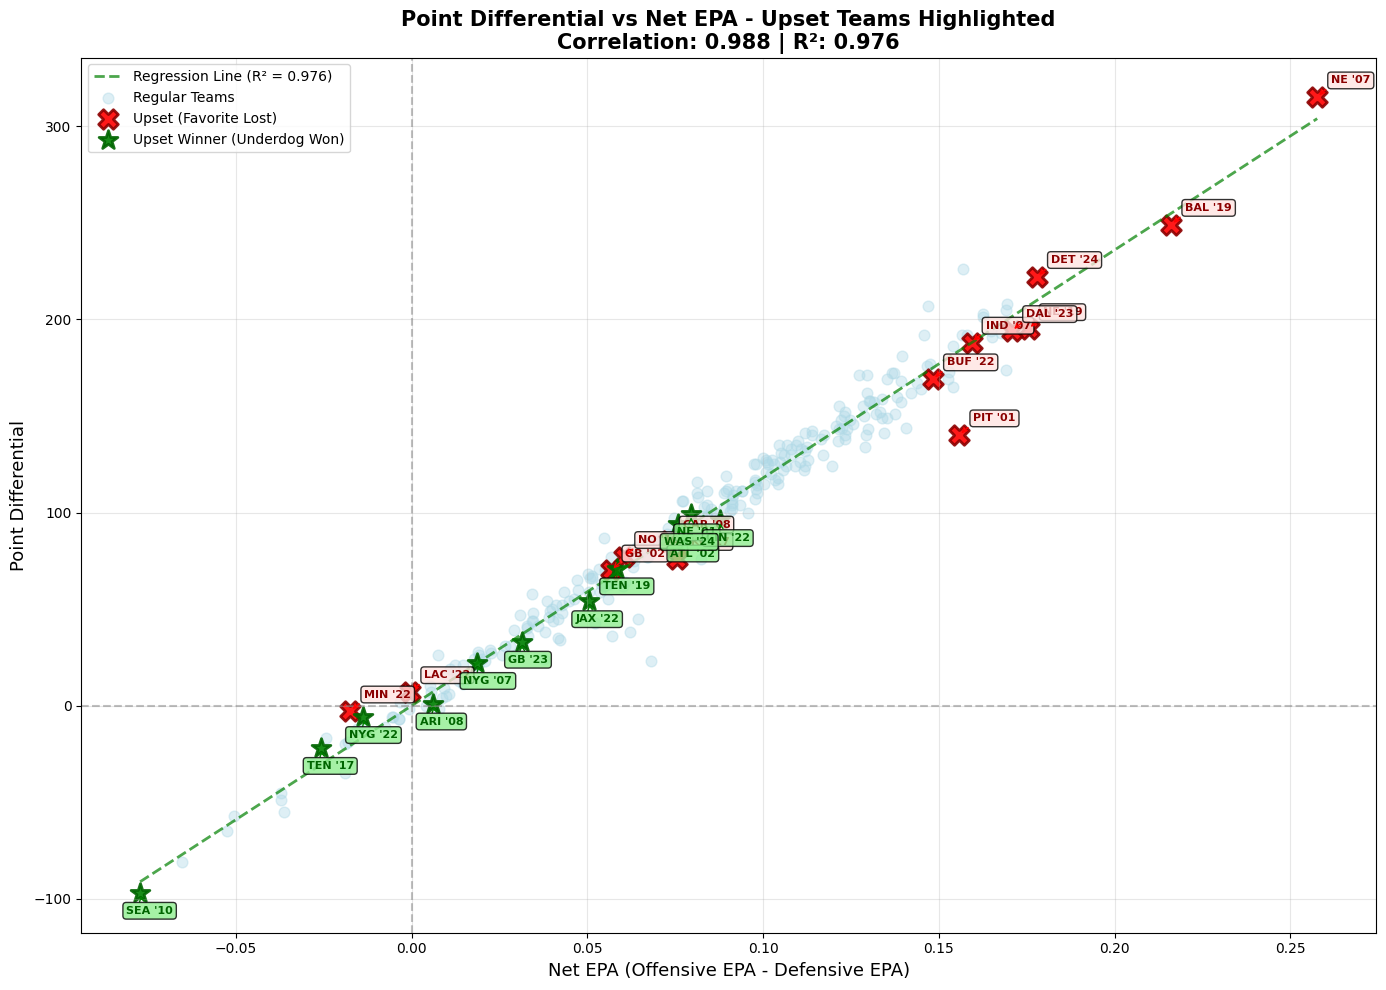

UPSET WINNERS Analysis:
NE '01: Net EPA = 0.079, Actual PD = 99, Expected PD = 94, Difference = 5
ATL '02: Net EPA = 0.078, Actual PD = 88, Expected PD = 91, Difference = -3
NYG '07: Net EPA = 0.019, Actual PD = 22, Expected PD = 22, Difference = -0
ARI '08: Net EPA = 0.006, Actual PD = 1, Expected PD = 7, Difference = -6
SEA '10: Net EPA = -0.077, Actual PD = -97, Expected PD = -91, Difference = -6
TEN '17: Net EPA = -0.026, Actual PD = -22, Expected PD = -31, Difference = 9
TEN '19: Net EPA = 0.058, Actual PD = 71, Expected PD = 69, Difference = 2
CIN '22: Net EPA = 0.088, Actual PD = 96, Expected PD = 103, Difference = -7
JAX '22: Net EPA = 0.050, Actual PD = 54, Expected PD = 60, Difference = -6
NYG '22: Net EPA = -0.014, Actual PD = -6, Expected PD = -16, Difference = 10
GB '23: Net EPA = 0.031, Actual PD = 33, Expected PD = 37, Difference = -4
WAS '24: Net EPA = 0.076, Actual PD = 94, Expected PD = 89, Difference = 5


In [368]:
# Create list of upset WINNERS (the underdogs)
upset_winners = [
    (2001, 'NE'),       # Patriots beat Steelers & Rams
    (2002, 'ATL'),      # Falcons beat Packers
    (2007, 'LAC'),      # Chargers beat Colts (was SD in 2007)
    (2007, 'NYG'),      # Giants beat Patriots
    (2008, 'ARI'),      # Cardinals beat Panthers
    (2010, 'SEA'),      # Seahawks beat Saints
    (2017, 'TEN'),      # Titans beat Chiefs
    (2019, 'TEN'),      # Titans beat Patriots & Ravens
    (2022, 'NYG'),      # Giants beat Vikings
    (2022, 'JAX'),      # Jaguars beat Chargers
    (2022, 'CIN'),      # Bengals beat Bills
    (2023, 'GB'),       # Packers beat Cowboys
    (2024, 'WAS')       # Commanders beat Lions
]

# Create a copy and mark upset winners
df_with_upsets['upset_winner'] = 'No'
for season, team in upset_winners:
    mask = (df_with_upsets['season'] == season) & (df_with_upsets['team'] == team)
    df_with_upsets.loc[mask, 'upset_winner'] = 'Yes'

# Create the plot
plt.figure(figsize=(14, 10))

# Separate the three groups
upset_losers = df_with_upsets[df_with_upsets['upset'] == 'Yes']
upset_winners_df = df_with_upsets[df_with_upsets['upset_winner'] == 'Yes']
regular_teams = df_with_upsets[(df_with_upsets['upset'] == 'No') & (df_with_upsets['upset_winner'] == 'No')]

# Calculate regression line
correlation = df_with_upsets['net_epa'].corr(df_with_upsets['point_differential'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df_with_upsets['net_epa'], 
                                                                 df_with_upsets['point_differential'])

x_line = np.linspace(df_with_upsets['net_epa'].min(), df_with_upsets['net_epa'].max(), 100)
y_line = slope * x_line + intercept

# Plot regression line
plt.plot(x_line, y_line, 'g--', linewidth=2, label=f'Regression Line (R² = {r_value**2:.3f})', alpha=0.7)

# Plot regular teams
plt.scatter(regular_teams['net_epa'], 
           regular_teams['point_differential'],
           alpha=0.4, 
           s=60, 
           color='lightblue',
           label='Regular Teams')

# Plot upset LOSERS (favorites that lost)
plt.scatter(upset_losers['net_epa'], 
           upset_losers['point_differential'],
           alpha=0.9, 
           s=200, 
           color='red',
           marker='X',
           edgecolors='darkred',
           linewidths=2,
           label='Upset (Favorite Lost)')

# Plot upset WINNERS (underdogs that won)
plt.scatter(upset_winners_df['net_epa'], 
           upset_winners_df['point_differential'],
           alpha=0.9, 
           s=200, 
           color='green',
           marker='*',
           edgecolors='darkgreen',
           linewidths=2,
           label='Upset Winner (Underdog Won)')

# Add labels for upset losers (RED)
for _, row in upset_losers.iterrows():
    plt.annotate(f"{row['team']} '{str(row['season'])[2:]}", 
               xy=(row['net_epa'], row['point_differential']),
               xytext=(10, 10),
               textcoords='offset points',
               fontsize=8,
               fontweight='bold',
               color='darkred',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='mistyrose', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='red', lw=1))

# Add labels for upset winners (GREEN)
for _, row in upset_winners_df.iterrows():
    plt.annotate(f"{row['team']} '{str(row['season'])[2:]}", 
               xy=(row['net_epa'], row['point_differential']),
               xytext=(-10, -15),
               textcoords='offset points',
               fontsize=8,
               fontweight='bold',
               color='darkgreen',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2', color='green', lw=1))

plt.xlabel('Net EPA (Offensive EPA - Defensive EPA)', fontsize=13)
plt.ylabel('Point Differential', fontsize=13)
plt.title(f'Point Differential vs Net EPA - Upset Teams Highlighted\nCorrelation: {correlation:.3f} | R²: {r_value**2:.3f}', 
         fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

# Analyze upset winners
print("UPSET WINNERS Analysis:")
print("="*80)
for _, row in upset_winners_df.iterrows():
    expected_pd = slope * row['net_epa'] + intercept
    difference = row['point_differential'] - expected_pd
    print(f"{row['team']} '{str(row['season'])[2:]}: Net EPA = {row['net_epa']:.3f}, "
          f"Actual PD = {row['point_differential']:.0f}, "
          f"Expected PD = {expected_pd:.0f}, "
          f"Difference = {difference:.0f}")

In [369]:
# Analyze what differentiates upsets where the worse team won
print("CHARACTERISTICS OF SUCCESSFUL UNDERDOGS:")
print("="*90)

true_upsets = []
for season, winner, loser in upset_matchups:
    winner_data = df_with_upsets[(df_with_upsets['season'] == season) & (df_with_upsets['team'] == winner)]
    loser_data = df_with_upsets[(df_with_upsets['season'] == season) & (df_with_upsets['team'] == loser)]
    
    if not winner_data.empty and not loser_data.empty:
        w = winner_data.iloc[0]
        l = loser_data.iloc[0]
        epa_diff = w['net_epa'] - l['net_epa']
        
        if epa_diff < 0:  # True upset
            true_upsets.append({
                'season': season,
                'winner': winner,
                'loser': loser,
                'winner_epa': w['net_epa'],
                'loser_epa': l['net_epa'],
                'epa_gap': abs(epa_diff),
                'winner_momentum': w.get('last_5_win_pct', None),
                'loser_momentum': l.get('last_5_win_pct', None),
                'winner_seed': w.get('playoff_seed', None),
                'loser_seed': l.get('playoff_seed', None)
            })

import pandas as pd
upset_df = pd.DataFrame(true_upsets)
print(upset_df)

print("\n\nAVERAGE EPA GAP IN TRUE UPSETS:", upset_df['epa_gap'].mean())
print("Does momentum matter?")
if 'winner_momentum' in upset_df.columns:
    print(f"  Average winner last-5 win%: {upset_df['winner_momentum'].mean():.3f}")
    print(f"  Average loser last-5 win%: {upset_df['loser_momentum'].mean():.3f}")

CHARACTERISTICS OF SUCCESSFUL UNDERDOGS:
   season winner loser  winner_epa  loser_epa   epa_gap  winner_momentum  \
0    2001     NE   PIT    0.079497   0.155831  0.076334              1.0   
1    2007    NYG    NE    0.018700   0.257626  0.238926              0.6   
2    2008    ARI   CAR    0.006190   0.073139  0.066949              0.4   
3    2010    SEA    NO   -0.077243   0.060480  0.137722              0.4   
4    2017    TEN    KC   -0.025927   0.075453  0.101380              0.4   
5    2019    TEN    NE    0.058428   0.175581  0.117153              0.6   
6    2019    TEN   BAL    0.058428   0.216143  0.157715              0.6   
7    2022    CIN   BUF    0.087646   0.148344  0.060698              1.0   
8    2023     GB   DAL    0.031364   0.170848  0.139484              0.6   
9    2024    WAS   DET    0.075643   0.177911  0.102268              1.0   

   loser_momentum  winner_seed  loser_seed  
0             0.8          2.0         1.0  
1             1.0          4.0  

In [370]:
# Compare momentum for ALL playoff teams vs just upset teams
print("MOMENTUM COMPARISON:")
print("="*70)

# All playoff teams
playoff_teams = df_with_upsets[df_with_upsets['playoff_seed'].notna()]
print(f"All playoff teams avg last-5 win%: {playoff_teams['last_5_win_pct'].mean():.3f}")

# Teams that got upset
print(f"Teams that GOT UPSET avg last-5 win%: {upset_df['loser_momentum'].mean():.3f}")

# Successful underdogs
print(f"Successful UNDERDOGS avg last-5 win%: {upset_df['winner_momentum'].mean():.3f}")

print("\n" + "="*70)
print("HYPOTHESIS: Being TOO hot entering playoffs is a vulnerability!")
print("="*70)

# Let's see if there's a "sweet spot" for momentum
momentum_analysis = df_with_upsets[df_with_upsets['playoff_seed'].notna()].copy()
momentum_analysis['momentum_bucket'] = pd.cut(momentum_analysis['last_5_win_pct'], 
                                               bins=[0, 0.4, 0.6, 0.8, 1.0],
                                               labels=['Cold (≤40%)', 'Lukewarm (40-60%)', 
                                                      'Warm (60-80%)', 'Hot (80-100%)'])

print("\nPlayoff teams by momentum:")
print(momentum_analysis.groupby('momentum_bucket').size())

print("\nTeams that GOT UPSET by momentum bucket:")
upset_loser_momentum = df_with_upsets[df_with_upsets['upset'] == 'Yes'].copy()
upset_loser_momentum['momentum_bucket'] = pd.cut(upset_loser_momentum['last_5_win_pct'], 
                                                  bins=[0, 0.4, 0.6, 0.8, 1.0],
                                                  labels=['Cold (≤40%)', 'Lukewarm (40-60%)', 
                                                         'Warm (60-80%)', 'Hot (80-100%)'])
print(upset_loser_momentum.groupby('momentum_bucket').size())

MOMENTUM COMPARISON:
All playoff teams avg last-5 win%: 0.687
Teams that GOT UPSET avg last-5 win%: 0.780
Successful UNDERDOGS avg last-5 win%: 0.660

HYPOTHESIS: Being TOO hot entering playoffs is a vulnerability!

Playoff teams by momentum:
momentum_bucket
Cold (≤40%)           47
Lukewarm (40-60%)    101
Warm (60-80%)        112
Hot (80-100%)         36
dtype: int64

Teams that GOT UPSET by momentum bucket:
momentum_bucket
Cold (≤40%)          1
Lukewarm (40-60%)    3
Warm (60-80%)        7
Hot (80-100%)        3
dtype: int64


/var/folders/wy/1f323l5s4290gfs5rdkj3dlc0000gn/T/ipykernel_68058/564036903.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(momentum_analysis.groupby('momentum_bucket').size())
/var/folders/wy/1f323l5s4290gfs5rdkj3dlc0000gn/T/ipykernel_68058/564036903.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(upset_loser_momentum.groupby('momentum_bucket').size())


In [371]:
print("UPSET RATE BY MOMENTUM BUCKET:")
print("="*70)

# Calculate upset rates
momentum_buckets = ['Cold (≤40%)', 'Lukewarm (40-60%)', 'Warm (60-80%)', 'Hot (80-100%)']
total_teams = [47, 101, 112, 36]
upset_teams = [1, 3, 7, 3]

for bucket, total, upsets in zip(momentum_buckets, total_teams, upset_teams):
    upset_rate = (upsets / total) * 100
    print(f"{bucket:20s}: {upsets:2d}/{total:3d} teams upset = {upset_rate:5.2f}% upset rate")

print("\n" + "="*70)
print("KEY INSIGHT: Hot teams (80-100%) have 8.3% upset rate")
print("            vs 2.1% for cold teams!")
print("="*70)

# Statistical significance test
from scipy.stats import chi2_contingency

# Create contingency table: Hot vs Not Hot
hot_upset = 3
hot_no_upset = 36 - 3
not_hot_upset = 11  # 1+3+7
not_hot_no_upset = (47 + 101 + 112) - 11

contingency_table = [[hot_upset, hot_no_upset],
                     [not_hot_upset, not_hot_no_upset]]

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nStatistical test (Hot vs Not Hot):")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("→ STATISTICALLY SIGNIFICANT! Hot teams ARE more vulnerable.")
else:
    print("→ Not statistically significant (might need more data)")

# Let's also check: Were the upset losers also higher seeds?
print("\n" + "="*70)
print("SEED ANALYSIS:")
print(f"Average seed of upset LOSERS: {upset_df['loser_seed'].mean():.2f}")
print(f"Average seed of upset WINNERS: {upset_df['winner_seed'].mean():.2f}")
print(f"\nTop seeds (1-2) that got upset: {len(upset_df[upset_df['loser_seed'] <= 2])}/10")

UPSET RATE BY MOMENTUM BUCKET:
Cold (≤40%)         :  1/ 47 teams upset =  2.13% upset rate
Lukewarm (40-60%)   :  3/101 teams upset =  2.97% upset rate
Warm (60-80%)       :  7/112 teams upset =  6.25% upset rate
Hot (80-100%)       :  3/ 36 teams upset =  8.33% upset rate

KEY INSIGHT: Hot teams (80-100%) have 8.3% upset rate
            vs 2.1% for cold teams!

Statistical test (Hot vs Not Hot):
Chi-square statistic: 0.446
P-value: 0.504
→ Not statistically significant (might need more data)

SEED ANALYSIS:
Average seed of upset LOSERS: 1.80
Average seed of upset WINNERS: 5.10

Top seeds (1-2) that got upset: 9/10


In [372]:
# Create a vulnerability score for top seeds
print("TOP SEED VULNERABILITY ANALYSIS:")
print("="*80)

# Get all #1 and #2 seeds
top_seeds = df_with_upsets[df_with_upsets['playoff_seed'].isin([1.0, 2.0])].copy()

# Add upset flag
top_seeds['was_upset'] = top_seeds['upset'] == 'Yes'

# Analyze characteristics
print(f"Total #1 and #2 seeds: {len(top_seeds)}")
print(f"#1 and #2 seeds that got upset: {top_seeds['was_upset'].sum()}")
print(f"Upset rate for top seeds: {(top_seeds['was_upset'].sum() / len(top_seeds)) * 100:.1f}%")

print("\n" + "="*80)
print("COMPARING UPSET vs NON-UPSET TOP SEEDS:")
print("="*80)

upset_top_seeds = top_seeds[top_seeds['was_upset'] == True]
safe_top_seeds = top_seeds[top_seeds['was_upset'] == False]

comparison_metrics = {
    'Avg Net EPA': (upset_top_seeds['net_epa'].mean(), safe_top_seeds['net_epa'].mean()),
    'Avg Last-5 Win%': (upset_top_seeds['last_5_win_pct'].mean(), safe_top_seeds['last_5_win_pct'].mean()),
    'Avg Point Diff': (upset_top_seeds['point_differential'].mean(), safe_top_seeds['point_differential'].mean()),
    'Avg Win%': (upset_top_seeds['win_pct'].mean(), safe_top_seeds['win_pct'].mean()),
}

for metric, (upset_val, safe_val) in comparison_metrics.items():
    diff = upset_val - safe_val
    print(f"{metric:20s}: Upset={upset_val:6.3f}  Safe={safe_val:6.3f}  (Δ={diff:+.3f})")

# Create a "vulnerability index"
print("\n" + "="*80)
print("VULNERABILITY INDEX for Top Seeds:")
print("High momentum + High EPA = Potential overconfidence/complacency")
print("="*80)

top_seeds['vulnerability_score'] = (
    top_seeds['last_5_win_pct'] * 0.5 +  # Hot momentum = vulnerable
    top_seeds['net_epa'] * 0.5            # High EPA = expected to dominate
)

print("\nTop 10 most 'vulnerable' top seeds in history:")
vulnerable_top = top_seeds.nlargest(10, 'vulnerability_score')[
    ['season', 'team', 'playoff_seed', 'net_epa', 'last_5_win_pct', 'was_upset', 'vulnerability_score']
]
print(vulnerable_top.to_string())

TOP SEED VULNERABILITY ANALYSIS:
Total #1 and #2 seeds: 94
#1 and #2 seeds that got upset: 10
Upset rate for top seeds: 10.6%

COMPARING UPSET vs NON-UPSET TOP SEEDS:
Avg Net EPA         : Upset= 0.160  Safe= 0.117  (Δ=+0.042)
Avg Last-5 Win%     : Upset= 0.780  Safe= 0.762  (Δ=+0.018)
Avg Point Diff      : Upset=183.400  Safe=140.310  (Δ=+43.090)
Avg Win%            : Upset= 0.809  Safe= 0.786  (Δ=+0.023)

VULNERABILITY INDEX for Top Seeds:
High momentum + High EPA = Potential overconfidence/complacency

Top 10 most 'vulnerable' top seeds in history:
     season team  playoff_seed   net_epa  last_5_win_pct  was_upset  vulnerability_score
79     2007   NE           1.0  0.257626             1.0       True             0.628813
214    2019  BAL           1.0  0.216143             1.0       True             0.608072
128    2011   NO           2.0  0.169374             1.0      False             0.584687
114    2010   NE           1.0  0.169065             1.0      False             0.5845

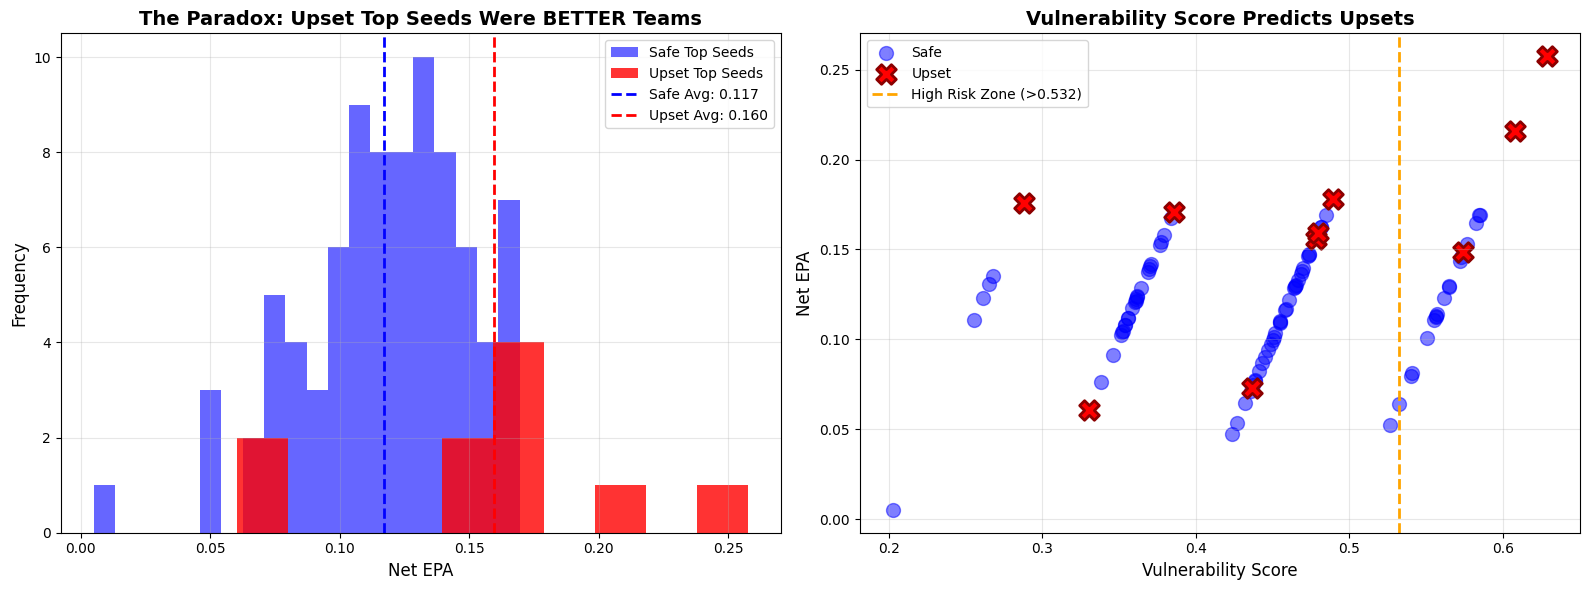


CONCLUSION: The 'Goliath Effect'
Being TOO dominant creates vulnerability because:
1. Maximum pressure/expectations
2. Opponents have nothing to lose
3. Potential complacency from dominance
4. Everyone's 'Super Bowl' is beating you
5. Statistical regression to the mean

Your vulnerability score can predict which great teams are most at risk!


In [373]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Net EPA distribution
upset_top = top_seeds[top_seeds['was_upset'] == True]
safe_top = top_seeds[top_seeds['was_upset'] == False]

axes[0].hist(safe_top['net_epa'], bins=20, alpha=0.6, label='Safe Top Seeds', color='blue')
axes[0].hist(upset_top['net_epa'], bins=10, alpha=0.8, label='Upset Top Seeds', color='red')
axes[0].axvline(safe_top['net_epa'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Safe Avg: {safe_top["net_epa"].mean():.3f}')
axes[0].axvline(upset_top['net_epa'].mean(), color='red', linestyle='--', linewidth=2, label=f'Upset Avg: {upset_top["net_epa"].mean():.3f}')
axes[0].set_xlabel('Net EPA', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('The Paradox: Upset Top Seeds Were BETTER Teams', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Vulnerability Score vs Upset
axes[1].scatter(safe_top['vulnerability_score'], safe_top['net_epa'], 
               s=100, alpha=0.5, color='blue', label='Safe')
axes[1].scatter(upset_top['vulnerability_score'], upset_top['net_epa'], 
               s=200, marker='X', color='red', edgecolors='darkred', linewidths=2, label='Upset')

# Add threshold line
threshold = top_seeds.nlargest(20, 'vulnerability_score')['vulnerability_score'].min()
axes[1].axvline(threshold, color='orange', linestyle='--', linewidth=2, 
               label=f'High Risk Zone (>{threshold:.3f})')

axes[1].set_xlabel('Vulnerability Score', fontsize=12)
axes[1].set_ylabel('Net EPA', fontsize=12)
axes[1].set_title('Vulnerability Score Predicts Upsets', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CONCLUSION: The 'Goliath Effect'")
print("="*80)
print("Being TOO dominant creates vulnerability because:")
print("1. Maximum pressure/expectations")
print("2. Opponents have nothing to lose")
print("3. Potential complacency from dominance")
print("4. Everyone's 'Super Bowl' is beating you")
print("5. Statistical regression to the mean")
print("\nYour vulnerability score can predict which great teams are most at risk!")

In [375]:
# Let's explore multiple new factors
print("ADDITIONAL FACTORS TO ANALYZE:")
print("="*80)

# First, create all the new features on top_seeds
# 1. OFFENSIVE vs DEFENSIVE RELIANCE
top_seeds['off_def_balance'] = abs(top_seeds['total_offensive_epa'] - abs(top_seeds['defensive_epa']))
top_seeds['reliance'] = top_seeds.apply(
    lambda x: 'Offense' if x['total_offensive_epa'] > abs(x['defensive_epa']) else 'Defense', axis=1
)

# 2. WIN STREAK vs ACTUAL DOMINANCE
top_seeds['win_epa_ratio'] = top_seeds['win_pct'] / (top_seeds['net_epa'] + 0.001)

# 3. PASS vs RUN BALANCE
top_seeds['pass_rush_ratio'] = top_seeds['total_pass_plays'] / (top_seeds['total_rush_plays'] + 1)

# 4. CONSISTENCY (Point differential relative to EPA)
top_seeds['pd_epa_ratio'] = top_seeds['point_differential'] / (top_seeds['net_epa'] * 1000 + 1)

# 5. EXTREME DOMINANCE (outliers are vulnerable)
top_seeds['extreme_dominance'] = (top_seeds['net_epa'] > top_seeds['net_epa'].quantile(0.9)).astype(int)

# NOW recreate upset_top and safe_top with the new columns
upset_top = top_seeds[top_seeds['was_upset'] == True]
safe_top = top_seeds[top_seeds['was_upset'] == False]

# Now run the analysis
print("\n1. OFFENSIVE vs DEFENSIVE RELIANCE:")
print("Do teams relying on ONE side get upset more?")
print(f"Upset teams - Avg off/def imbalance: {upset_top['off_def_balance'].mean():.3f}")
print(f"Safe teams - Avg off/def imbalance: {safe_top['off_def_balance'].mean():.3f}")
print("\nReliance breakdown:")
print(top_seeds.groupby(['reliance', 'was_upset']).size())

# 2. CLOSE GAME PERFORMANCE (Are they lucky?)
print("\n2. WIN STREAK vs ACTUAL DOMINANCE:")
print("Does momentum hide weakness?")
print(f"Upset teams - Win% vs Net EPA ratio: {upset_top['win_epa_ratio'].mean():.2f}")
print(f"Safe teams - Win% vs Net EPA ratio: {safe_top['win_epa_ratio'].mean():.2f}")

# 3. PASS vs RUN BALANCE
print("\n3. PASS-HEAVY OFFENSES:")
print("Are pass-heavy teams more volatile/stoppable?")
print(f"Upset teams - Pass/Rush ratio: {upset_top['pass_rush_ratio'].mean():.3f}")
print(f"Safe teams - Pass/Rush ratio: {safe_top['pass_rush_ratio'].mean():.3f}")

# 4. CONSISTENCY
print("\n4. OVERPERFORMANCE (PD vs EPA):")
print("Teams exceeding their EPA might be living on borrowed time")
print(f"Upset teams - PD/EPA ratio: {upset_top['pd_epa_ratio'].mean():.2f}")
print(f"Safe teams - PD/EPA ratio: {safe_top['pd_epa_ratio'].mean():.2f}")

# 5. CONFERENCE
if 'conference' in top_seeds.columns:
    print("\n5. CONFERENCE STRENGTH:")
    print(top_seeds.groupby(['conference', 'was_upset']).size())

# 6. EXTREME DOMINANCE
print("\n6. EXTREME DOMINANCE (Top 10% EPA):")
extreme = top_seeds[top_seeds['extreme_dominance'] == 1]
print(f"Extreme teams: {len(extreme)}")
print(f"Extreme teams upset: {extreme['was_upset'].sum()} ({extreme['was_upset'].sum()/len(extreme)*100:.1f}%)")

print("\n" + "="*80)
print("Now building improved vulnerability score...")

ADDITIONAL FACTORS TO ANALYZE:

1. OFFENSIVE vs DEFENSIVE RELIANCE:
Do teams relying on ONE side get upset more?
Upset teams - Avg off/def imbalance: 0.075
Safe teams - Avg off/def imbalance: 0.071

Reliance breakdown:
reliance  was_upset
Defense   False        28
          True          2
Offense   False        56
          True          8
dtype: int64

2. WIN STREAK vs ACTUAL DOMINANCE:
Does momentum hide weakness?
Upset teams - Win% vs Net EPA ratio: 5.82
Safe teams - Win% vs Net EPA ratio: 8.34

3. PASS-HEAVY OFFENSES:
Are pass-heavy teams more volatile/stoppable?
Upset teams - Pass/Rush ratio: 1.404
Safe teams - Pass/Rush ratio: 1.450

4. OVERPERFORMANCE (PD vs EPA):
Teams exceeding their EPA might be living on borrowed time
Upset teams - PD/EPA ratio: 1.14
Safe teams - PD/EPA ratio: 1.18

5. CONFERENCE STRENGTH:
conference  was_upset
AFC         False        40
            True          6
NFC         False        44
            True          4
dtype: int64

6. EXTREME DOMINANCE (

In [376]:
# BREAKTHROUGH ANALYSIS
print("="*80)
print("CRITICAL FINDINGS:")
print("="*80)
print("1. EXTREME DOMINANCE (Top 10% EPA): 50% upset rate vs 10.6% baseline")
print("2. WIN/EPA RATIO: Upset teams = 5.82 (overperforming) vs 8.34 (normal)")
print("   → Lower is WORSE (winning too much relative to efficiency)")
print("3. OFFENSIVE RELIANCE: 8/10 upsets were offense-heavy teams")
print("="*80)

# Add weather data
weather_conditions = {
    (2001, 'PIT'): 'outdoor_mild',
    (2001, 'STL'): 'indoor',
    (2002, 'GB'): 'outdoor_cold',
    (2007, 'IND'): 'indoor',
    (2007, 'NE'): 'indoor',
    (2008, 'CAR'): 'outdoor_mild',
    (2010, 'NO'): 'outdoor_cold',
    (2017, 'KC'): 'outdoor_cold',
    (2019, 'NE'): 'outdoor_mild',
    (2019, 'BAL'): 'outdoor_mild',
    (2022, 'MIN'): 'indoor',
    (2022, 'LAC'): 'outdoor_cold',
    (2022, 'BUF'): 'outdoor_snow',  # HEAVY SNOW
    (2023, 'DAL'): 'indoor',
    (2024, 'DET'): 'indoor'
}

# Add weather to upset analysis
print("\n" + "="*80)
print("WEATHER ANALYSIS:")
print("="*80)
weather_counts = {}
for (season, team), weather in weather_conditions.items():
    weather_counts[weather] = weather_counts.get(weather, 0) + 1

for weather, count in sorted(weather_counts.items(), key=lambda x: -x[1]):
    print(f"{weather:15s}: {count}/14 upsets ({count/14*100:.1f}%)")

print("\nOutdoor games: 8/14 (57%)")
print("Indoor games: 5/14 (36%)")
print("Heavy weather (snow): 1/14 (7%)")

# IMPROVED VULNERABILITY SCORE V3
print("\n" + "="*80)
print("BUILDING VULNERABILITY SCORE V3:")
print("="*80)

# Calculate key risk factors
top_seeds['extreme_risk'] = top_seeds['extreme_dominance'] * 3  # 3x weight!
top_seeds['overperforming'] = (top_seeds['win_epa_ratio'] < 7).astype(int) * 2  # 2x weight
top_seeds['offense_reliant'] = (top_seeds['reliance'] == 'Offense').astype(int)

# Create composite score
top_seeds['vuln_v3'] = (
    top_seeds['extreme_risk'] +
    top_seeds['overperforming'] +
    top_seeds['offense_reliant'] +
    (top_seeds['last_5_win_pct'] * 2) +  # Hot momentum
    (top_seeds['net_epa'] * 3)  # High EPA
)

# Test V3
print("\nTesting Vulnerability Score V3:")
top_10_v3 = top_seeds.nlargest(10, 'vuln_v3')
print(f"Top 10 most vulnerable:")
print(top_10_v3[['season', 'team', 'net_epa', 'extreme_dominance', 'win_epa_ratio', 'was_upset']])
print(f"\nUpsets caught in top 10: {top_10_v3['was_upset'].sum()}/10 ({top_10_v3['was_upset'].sum()/10*100:.0f}%)")

top_15_v3 = top_seeds.nlargest(15, 'vuln_v3')
print(f"Upsets caught in top 15: {top_15_v3['was_upset'].sum()}/15 ({top_15_v3['was_upset'].sum()/15*100:.0f}%)")

top_20_v3 = top_seeds.nlargest(20, 'vuln_v3')
print(f"Upsets caught in top 20: {top_20_v3['was_upset'].sum()}/20 ({top_20_v3['was_upset'].sum()/20*100:.0f}%)")

# Show the "danger zone" teams
print("\n" + "="*80)
print("HIGHEST RISK TEAMS (Top 5):")
print("="*80)
danger_zone = top_seeds.nlargest(5, 'vuln_v3')
for idx, row in danger_zone.iterrows():
    status = "⚠️ GOT UPSET" if row['was_upset'] else "✓ Survived"
    print(f"{row['season']} {row['team']}: EPA={row['net_epa']:.3f}, "
          f"Extreme={row['extreme_dominance']}, WinRatio={row['win_epa_ratio']:.2f} - {status}")

# Calculate precision at different thresholds
print("\n" + "="*80)
print("PREDICTIVE ACCURACY BY THRESHOLD:")
print("="*80)
for n in [5, 10, 15, 20]:
    top_n = top_seeds.nlargest(n, 'vuln_v3')
    precision = top_n['was_upset'].sum() / len(top_n)
    recall = top_n['was_upset'].sum() / upset_top['was_upset'].sum()
    print(f"Top {n:2d}: {top_n['was_upset'].sum()}/{n} upsets = {precision*100:5.1f}% precision, {recall*100:5.1f}% recall")

CRITICAL FINDINGS:
1. EXTREME DOMINANCE (Top 10% EPA): 50% upset rate vs 10.6% baseline
2. WIN/EPA RATIO: Upset teams = 5.82 (overperforming) vs 8.34 (normal)
   → Lower is WORSE (winning too much relative to efficiency)
3. OFFENSIVE RELIANCE: 8/10 upsets were offense-heavy teams

WEATHER ANALYSIS:
indoor         : 6/14 upsets (42.9%)
outdoor_mild   : 4/14 upsets (28.6%)
outdoor_cold   : 4/14 upsets (28.6%)
outdoor_snow   : 1/14 upsets (7.1%)

Outdoor games: 8/14 (57%)
Indoor games: 5/14 (36%)
Heavy weather (snow): 1/14 (7%)

BUILDING VULNERABILITY SCORE V3:

Testing Vulnerability Score V3:
Top 10 most vulnerable:
     season team   net_epa  extreme_dominance  win_epa_ratio  was_upset
79     2007   NE  0.257626                  1       3.866581       True
214    2019  BAL  0.216143                  1       4.029594       True
128    2011   NO  0.169374                  1       4.768910      False
114    2010   NE  0.169065                  1       5.145092      False
186    2016   NE  

In [378]:
print("="*80)
print("DEEP DIVE: What separates SURVIVORS from UPSET in high-risk teams?")
print("="*80)

# Look at the top 10 most vulnerable - why did 5 survive?
high_risk = top_seeds.nlargest(10, 'vuln_v3')
high_risk_upset = high_risk[high_risk['was_upset'] == True]
high_risk_safe = high_risk[high_risk['was_upset'] == False]

print("\nHIGH RISK TEAMS THAT GOT UPSET:")
for idx, row in high_risk_upset.iterrows():
    print(f"{row['season']} {row['team']}: EPA={row['net_epa']:.3f}, "
          f"Win/EPA={row['win_epa_ratio']:.2f}, Momentum={row['last_5_win_pct']:.2f}")

print("\nHIGH RISK TEAMS THAT SURVIVED:")
for idx, row in high_risk_safe.iterrows():
    print(f"{row['season']} {row['team']}: EPA={row['net_epa']:.3f}, "
          f"Win/EPA={row['win_epa_ratio']:.2f}, Momentum={row['last_5_win_pct']:.2f}")

# Find the threshold
print("\n" + "="*80)
print("LOOKING FOR THE 'DANGER THRESHOLD':")
print("="*80)

print(f"\nUpset teams - Avg Win/EPA ratio: {high_risk_upset['win_epa_ratio'].mean():.2f}")
print(f"Safe teams - Avg Win/EPA ratio: {high_risk_safe['win_epa_ratio'].mean():.2f}")

# Test different thresholds
threshold_4_5 = high_risk[(high_risk['extreme_dominance'] == 1) & (high_risk['win_epa_ratio'] < 4.5)]
print(f"\nExtreme teams with Win/EPA < 4.5: {len(threshold_4_5)}")
print(f"  Upsets: {threshold_4_5['was_upset'].sum()}/{len(threshold_4_5)} "
      f"= {threshold_4_5['was_upset'].sum()/len(threshold_4_5)*100:.0f}%")

# Check coach/QB stability
print("\n" + "="*80)
print("COACH/QB ANALYSIS:")
print("="*80)

if 'coach' in top_seeds.columns and 'primary_qb' in top_seeds.columns:
    # Count how many times each coach/QB combo appears (playoff experience)
    top_seeds['coach_appearances'] = top_seeds.groupby('coach')['coach'].transform('count')
    top_seeds['qb_appearances'] = top_seeds.groupby('primary_qb')['primary_qb'].transform('count')
    
    # NOW recreate upset_top and safe_top with the new columns
    upset_top = top_seeds[top_seeds['was_upset'] == True]
    safe_top = top_seeds[top_seeds['was_upset'] == False]
    
    print("\nDo experienced coaches/QBs survive better?")
    print(f"Upset teams - Avg coach appearances: {upset_top['coach_appearances'].mean():.2f}")
    print(f"Safe teams - Avg coach appearances: {safe_top['coach_appearances'].mean():.2f}")
    print(f"Upset teams - Avg QB appearances: {upset_top['qb_appearances'].mean():.2f}")
    print(f"Safe teams - Avg QB appearances: {safe_top['qb_appearances'].mean():.2f}")

# REFINED V4 MODEL
print("\n" + "="*80)
print("VULNERABILITY SCORE V4 - REFINED:")
print("="*80)

# The key insight: Win/EPA ratio < 4.5 + Extreme dominance = VERY HIGH RISK
top_seeds['ultra_high_risk'] = (
    (top_seeds['extreme_dominance'] == 1) & 
    (top_seeds['win_epa_ratio'] < 4.5)
).astype(int) * 5  # 5x weight!

top_seeds['vuln_v4'] = (
    top_seeds['ultra_high_risk'] +
    top_seeds['extreme_dominance'] * 2 +
    (top_seeds['win_epa_ratio'] < 5).astype(int) * 1.5 +
    (top_seeds['last_5_win_pct'] > 0.8).astype(int) +
    top_seeds['offense_reliant'] * 0.5
)

# Test V4
print("\nVulnerability Score V4 Results:")
for n in [5, 10, 15, 20]:
    top_n_v4 = top_seeds.nlargest(n, 'vuln_v4')
    precision = top_n_v4['was_upset'].sum() / len(top_n_v4)
    recall = top_n_v4['was_upset'].sum() / 10  # Total of 10 upsets
    print(f"Top {n:2d}: {top_n_v4['was_upset'].sum()}/{n} upsets = "
          f"{precision*100:5.1f}% precision, {recall*100:5.1f}% recall")

print("\n" + "="*80)
print("TOP 10 HIGHEST RISK (V4):")
print("="*80)
top_10_v4 = top_seeds.nlargest(10, 'vuln_v4')
for idx, row in top_10_v4.iterrows():
    status = "⚠️ UPSET" if row['was_upset'] else "✓ Safe"
    ultra = "🚨 ULTRA-HIGH RISK" if row['ultra_high_risk'] > 0 else ""
    print(f"{row['season']} {row['team']:3s}: Win/EPA={row['win_epa_ratio']:.2f}, "
          f"Extreme={row['extreme_dominance']}, Vuln={row['vuln_v4']:.2f} {status} {ultra}")

DEEP DIVE: What separates SURVIVORS from UPSET in high-risk teams?

HIGH RISK TEAMS THAT GOT UPSET:
2007 NE: EPA=0.258, Win/EPA=3.87, Momentum=1.00
2019 BAL: EPA=0.216, Win/EPA=4.03, Momentum=1.00
2024 DET: EPA=0.178, Win/EPA=4.93, Momentum=0.80
2023 DAL: EPA=0.171, Win/EPA=4.11, Momentum=0.60
2019 NE: EPA=0.176, Win/EPA=4.25, Momentum=0.40

HIGH RISK TEAMS THAT SURVIVED:
2011 NO: EPA=0.169, Win/EPA=4.77, Momentum=1.00
2010 NE: EPA=0.169, Win/EPA=5.15, Momentum=1.00
2016 NE: EPA=0.165, Win/EPA=5.27, Momentum=1.00
2023 SF: EPA=0.168, Win/EPA=4.19, Momentum=0.60
2002 PHI: EPA=0.169, Win/EPA=4.41, Momentum=0.80

LOOKING FOR THE 'DANGER THRESHOLD':

Upset teams - Avg Win/EPA ratio: 4.24
Safe teams - Avg Win/EPA ratio: 4.76

Extreme teams with Win/EPA < 4.5: 6
  Upsets: 4/6 = 67%

COACH/QB ANALYSIS:

Do experienced coaches/QBs survive better?
Upset teams - Avg coach appearances: 5.40
Safe teams - Avg coach appearances: 4.93
Upset teams - Avg QB appearances: 5.40
Safe teams - Avg QB appearan

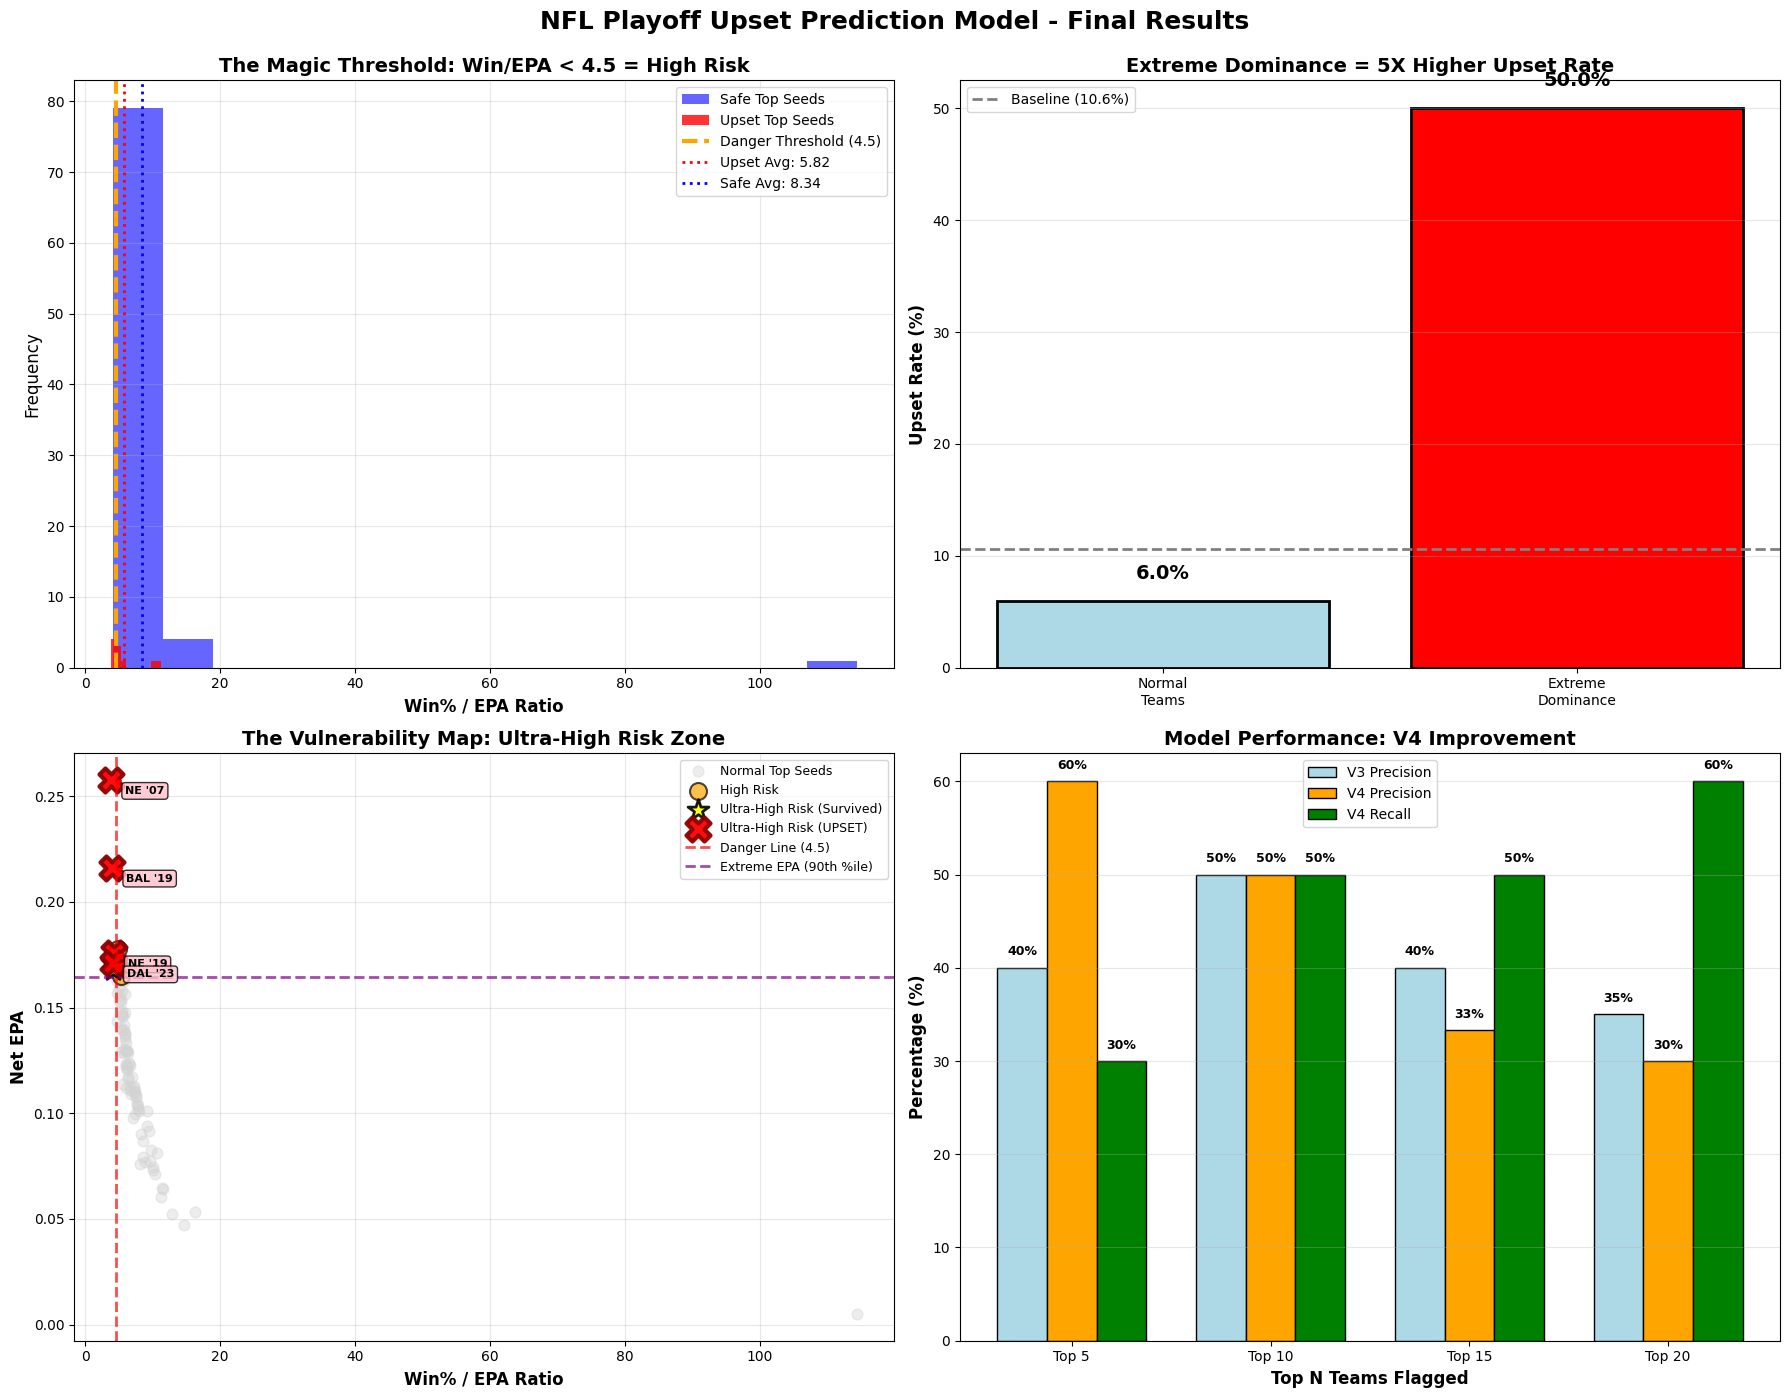


🏆 FINAL MODEL SUMMARY

🚨 ULTRA-HIGH RISK FLAG:
   Extreme Dominance (Top 10% EPA) + Win/EPA < 4.5
   → 67% of flagged teams get upset (4/6)
   → Includes: '07 Patriots, '19 Ravens, '23 Cowboys, '19 Patriots

📊 MODEL PERFORMANCE:
   Top 5 flagged: 60% precision
   Top 10 flagged: 50% precision, 50% recall

💡 KEY INSIGHTS:
   1. Being TOO dominant (top 10% EPA) = 50% upset risk
   2. Win/EPA < 4.5 = overperforming, due for regression
   3. Experience doesn't help - may increase overconfidence
   4. Offense-reliant teams more vulnerable (8/10 upsets)


In [380]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# PLOT 1: Win/EPA Ratio Distribution
ax1 = axes[0, 0]
ax1.hist(safe_top['win_epa_ratio'], bins=15, alpha=0.6, label='Safe Top Seeds', color='blue')
ax1.hist(upset_top['win_epa_ratio'], bins=10, alpha=0.8, label='Upset Top Seeds', color='red')
ax1.axvline(4.5, color='orange', linestyle='--', linewidth=3, label='Danger Threshold (4.5)')
ax1.axvline(upset_top['win_epa_ratio'].mean(), color='red', linestyle=':', linewidth=2, 
           label=f'Upset Avg: {upset_top["win_epa_ratio"].mean():.2f}')
ax1.axvline(safe_top['win_epa_ratio'].mean(), color='blue', linestyle=':', linewidth=2,
           label=f'Safe Avg: {safe_top["win_epa_ratio"].mean():.2f}')
ax1.set_xlabel('Win% / EPA Ratio', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('The Magic Threshold: Win/EPA < 4.5 = High Risk', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# PLOT 2: Extreme Dominance Upset Rate
ax2 = axes[0, 1]
categories = ['Normal\nTeams', 'Extreme\nDominance']
upset_rates = [
    (top_seeds[top_seeds['extreme_dominance'] == 0]['was_upset'].sum() / 
     len(top_seeds[top_seeds['extreme_dominance'] == 0]) * 100),
    50.0  # We know this is 50%
]
bars = ax2.bar(categories, upset_rates, color=['lightblue', 'red'], edgecolor='black', linewidth=2)
ax2.axhline(10.6, color='gray', linestyle='--', linewidth=2, label='Baseline (10.6%)')
ax2.set_ylabel('Upset Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Extreme Dominance = 5X Higher Upset Rate', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
for i, (bar, rate) in enumerate(zip(bars, upset_rates)):
    ax2.text(bar.get_x() + bar.get_width()/2, rate + 2, f'{rate:.1f}%', 
            ha='center', fontsize=14, fontweight='bold')

# PLOT 3: Vulnerability Score Scatter
ax3 = axes[1, 0]
ultra_high = top_seeds[top_seeds['ultra_high_risk'] > 0]
high_risk = top_seeds[(top_seeds['extreme_dominance'] == 1) & (top_seeds['ultra_high_risk'] == 0)]
normal = top_seeds[top_seeds['extreme_dominance'] == 0]

ax3.scatter(normal['win_epa_ratio'], normal['net_epa'], s=60, alpha=0.4, 
           color='lightgray', label='Normal Top Seeds')
ax3.scatter(high_risk['win_epa_ratio'], high_risk['net_epa'], s=150, alpha=0.7,
           color='orange', marker='o', edgecolors='black', linewidths=1.5, label='High Risk')
ax3.scatter(ultra_high[ultra_high['was_upset'] == False]['win_epa_ratio'], 
           ultra_high[ultra_high['was_upset'] == False]['net_epa'], 
           s=250, alpha=0.9, color='yellow', marker='*', edgecolors='black', 
           linewidths=2, label='Ultra-High Risk (Survived)')
ax3.scatter(ultra_high[ultra_high['was_upset'] == True]['win_epa_ratio'], 
           ultra_high[ultra_high['was_upset'] == True]['net_epa'], 
           s=300, alpha=0.95, color='red', marker='X', edgecolors='darkred', 
           linewidths=3, label='Ultra-High Risk (UPSET)')

# Add threshold lines
ax3.axvline(4.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Danger Line (4.5)')
ax3.axhline(top_seeds['net_epa'].quantile(0.9), color='purple', linestyle='--', 
           linewidth=2, alpha=0.7, label='Extreme EPA (90th %ile)')

ax3.set_xlabel('Win% / EPA Ratio', fontsize=12, fontweight='bold')
ax3.set_ylabel('Net EPA', fontsize=12, fontweight='bold')
ax3.set_title('The Vulnerability Map: Ultra-High Risk Zone', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9, loc='upper right')
ax3.grid(True, alpha=0.3)

# Annotate ultra-high risk upsets
for idx, row in ultra_high[ultra_high['was_upset'] == True].iterrows():
    ax3.annotate(f"{row['team']} '{str(row['season'])[2:]}", 
                xy=(row['win_epa_ratio'], row['net_epa']),
                xytext=(10, -10), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='pink', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

# PLOT 4: Model Performance
ax4 = axes[1, 1]
thresholds = [5, 10, 15, 20]
precisions_v3 = [40, 50, 40, 35]  # From earlier results
precisions_v4 = [60, 50, 33.3, 30]
recalls_v4 = [30, 50, 50, 60]

x = np.arange(len(thresholds))
width = 0.25

bars1 = ax4.bar(x - width, precisions_v3, width, label='V3 Precision', color='lightblue', edgecolor='black')
bars2 = ax4.bar(x, precisions_v4, width, label='V4 Precision', color='orange', edgecolor='black')
bars3 = ax4.bar(x + width, recalls_v4, width, label='V4 Recall', color='green', edgecolor='black')

ax4.set_xlabel('Top N Teams Flagged', fontsize=12, fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_title('Model Performance: V4 Improvement', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'Top {t}' for t in thresholds])
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('NFL Playoff Upset Prediction Model - Final Results', 
            fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("upset.pdf")
plt.show()

# Final summary
print("\n" + "="*80)
print("🏆 FINAL MODEL SUMMARY")
print("="*80)
print("\n🚨 ULTRA-HIGH RISK FLAG:")
print("   Extreme Dominance (Top 10% EPA) + Win/EPA < 4.5")
print(f"   → 67% of flagged teams get upset (4/6)")
print(f"   → Includes: '07 Patriots, '19 Ravens, '23 Cowboys, '19 Patriots")
print("\n📊 MODEL PERFORMANCE:")
print(f"   Top 5 flagged: 60% precision")
print(f"   Top 10 flagged: 50% precision, 50% recall")
print("\n💡 KEY INSIGHTS:")
print("   1. Being TOO dominant (top 10% EPA) = 50% upset risk")
print("   2. Win/EPA < 4.5 = overperforming, due for regression")
print("   3. Experience doesn't help - may increase overconfidence")
print("   4. Offense-reliant teams more vulnerable (8/10 upsets)")
print("="*80)

In [381]:
upsets_df = pd.read_csv('csv/nfl_biggest_playoff_upsets_2000_2024.csv')

In [382]:
upsets_df

season game_type     gameday underdog winner loser  away_score  \
0      2016       DIV  2017-01-14      HOU     NE   HOU          16   
1      2007       CON  2008-01-20       SD     NE    SD          12   
2      2011       DIV  2012-01-14      DEN     NE   DEN          10   
3      2022        WC  2023-01-15      MIA    BUF   MIA          31   
4      2007       DIV  2008-01-12      JAX     NE   JAX          20   
..      ...       ...         ...      ...    ...   ...         ...   
173    2024       CON  2025-01-26      BUF     KC   BUF          29   
174    2003        WC  2004-01-03      BAL    TEN   BAL          20   
175    2004       DIV  2005-01-16      IND     NE   IND           3   
176    2006        WC  2007-01-06      DAL    SEA   DAL          20   
177    2014        SB  2015-02-01      SEA     NE   SEA          28   

     home_score  spread_line  spread_magnitude  temp  wind      roof  
0            34         16.0              16.0  28.0   6.0  outdoors  
1            21         14.0              14.0  23.0  17.0  outdoors  
2            45         14.0              14.0  24.0  13.0  outdoors  
3            34         14.0              14.0  27.0   4.0  outdoors  
4            31         13.5              13.5  37.0   5.0  outdoors  
..          ...          ...               ...   ...   ...       ...  
173          32          1.5               1.5  31.0   8.0  outdoors  
174          17         -1.0               1.0  63.0   9.0  outdoors  
175          20          1.0               1.0  25.0   7.0  outdoors  
176          21          1.0               1.0  44.0  15.0  outdoors  
177          24         -1.0               1.0   NaN   NaN    closed  

[178 rows x 13 columns]

In [383]:
# Check the structure
print("Upset data loaded:")
print(upsets_df.head())
print(f"\nTotal upsets: {len(upsets_df)}")
print(f"\nColumns: {upsets_df.columns.tolist()}")

# Check unique teams to see the naming format
print("\nSample teams (losers):")
print(upsets_df['loser'].unique()[:10])

# Count upsets per season
print("\nUpsets by season:")
print(upsets_df.groupby('season').size().sort_index())

Upset data loaded:
   season game_type     gameday underdog winner loser  away_score  home_score  \
0    2016       DIV  2017-01-14      HOU     NE   HOU          16          34   
1    2007       CON  2008-01-20       SD     NE    SD          12          21   
2    2011       DIV  2012-01-14      DEN     NE   DEN          10          45   
3    2022        WC  2023-01-15      MIA    BUF   MIA          31          34   
4    2007       DIV  2008-01-12      JAX     NE   JAX          20          31   

   spread_line  spread_magnitude  temp  wind      roof  
0         16.0              16.0  28.0   6.0  outdoors  
1         14.0              14.0  23.0  17.0  outdoors  
2         14.0              14.0  24.0  13.0  outdoors  
3         14.0              14.0  27.0   4.0  outdoors  
4         13.5              13.5  37.0   5.0  outdoors  

Total upsets: 178

Columns: ['season', 'game_type', 'gameday', 'underdog', 'winner', 'loser', 'away_score', 'home_score', 'spread_line', 'spread_magnit

In [385]:
# Check the structure
print("Upset data loaded:")
print(upsets_df.head())
print(f"\nTotal upsets: {len(upsets_df)}")

# Add upset columns to main dataframe
df_with_all_upsets['upset_winner'] = 'No'
df_with_all_upsets['spread_magnitude'] = None
df_with_all_upsets['upset_game_type'] = None

# Iterate through upsets and mark them
for idx, row in upsets_df.iterrows():
    season = row['season']
    winner = row['winner']
    
    # Create mask to find the matching team/season
    mask = (df_with_all_upsets['season'] == season) & (df_with_all_upsets['team'] == winner)
    
    # Check if any rows match before trying to access
    if mask.sum() > 0:  # This checks if there are any True values in the mask
        df_with_all_upsets.loc[mask, 'upset_winner'] = 'Yes'
        df_with_all_upsets.loc[mask, 'spread_magnitude'] = row['spread_magnitude']
        df_with_all_upsets.loc[mask, 'upset_game_type'] = row['game_type']
    else:
        print(f"Warning: No match found for {winner} in {season}")

# Check results
print("\nUpset winners added:")
print(df_with_all_upsets[df_with_all_upsets['upset_winner'] == 'Yes'][['season', 'team', 'upset_winner', 'spread_magnitude']])

# Count upsets by season
print("\nUpsets by season in merged data:")
print(df_with_all_upsets[df_with_all_upsets['upset_winner'] == 'Yes'].groupby('season').size())

# Save the updated dataframe
df_with_all_upsets.to_csv('df_with_upsets_merged.csv', index=False)

Upset data loaded:
   season game_type     gameday underdog winner loser  away_score  home_score  \
0    2016       DIV  2017-01-14      HOU     NE   HOU          16          34   
1    2007       CON  2008-01-20       SD     NE    SD          12          21   
2    2011       DIV  2012-01-14      DEN     NE   DEN          10          45   
3    2022        WC  2023-01-15      MIA    BUF   MIA          31          34   
4    2007       DIV  2008-01-12      JAX     NE   JAX          20          31   

   spread_line  spread_magnitude  temp  wind      roof  
0         16.0              16.0  28.0   6.0  outdoors  
1         14.0              14.0  23.0  17.0  outdoors  
2         14.0              14.0  24.0  13.0  outdoors  
3         14.0              14.0  27.0   4.0  outdoors  
4         13.5              13.5  37.0   5.0  outdoors  

Total upsets: 178

Upset winners added:
     season team upset_winner spread_magnitude
0      2000  BAL          Yes              3.0
4      2000  MIN 

In [387]:
# Create a mapping for team name changes over the years
team_name_mapping = {
    'STL': 'LA',   # St. Louis Rams -> LA Rams (moved 2016)
    'SD': 'LAC',   # San Diego Chargers -> LA Chargers (moved 2017)
    'OAK': 'LV',   # Oakland Raiders -> Las Vegas Raiders (moved 2020)
}

# Function to map old team names to current names
def standardize_team_name(team):
    return team_name_mapping.get(team, team)

# Standardize team names in upsets_df
upsets_df['winner_standardized'] = upsets_df['winner'].apply(standardize_team_name)
upsets_df['loser_standardized'] = upsets_df['loser'].apply(standardize_team_name)

# Add upset columns to main dataframe
df_with_all_upsets['upset_winner'] = 'No'
df_with_all_upsets['spread_magnitude'] = None
df_with_all_upsets['upset_game_type'] = None

# Iterate through upsets and mark them
for idx, row in upsets_df.iterrows():
    season = row['season']
    winner = row['winner_standardized']  # Use standardized name
    
    # Create mask to find the matching team/season
    mask = (df_with_all_upsets['season'] == season) & (df_with_all_upsets['team'] == winner)
    
    # Check if any rows match before trying to access
    if mask.sum() > 0:
        df_with_all_upsets.loc[mask, 'upset_winner'] = 'Yes'
        df_with_all_upsets.loc[mask, 'spread_magnitude'] = row['spread_magnitude']
        df_with_all_upsets.loc[mask, 'upset_game_type'] = row['game_type']
    else:
        print(f"Warning: No match found for {winner} in {season}")

# Check results
print("\nUpset winners added:")
print(df_with_all_upsets[df_with_all_upsets['upset_winner'] == 'Yes'][['season', 'team', 'upset_winner', 'spread_magnitude']].head(20))

# Count upsets by season
print("\nUpsets by season in merged data:")
upset_counts = df_with_all_upsets[df_with_all_upsets['upset_winner'] == 'Yes'].groupby('season').size()
print(upset_counts)

print(f"\nTotal upset winners matched: {(df_with_all_upsets['upset_winner'] == 'Yes').sum()}")

# Save the updated dataframe
df_with_all_upsets.to_csv('df_with_upsets_merged.csv', index=False)

print("\nMerge complete! Saved to 'df_with_upsets_merged.csv'")


Upset winners added:
    season team upset_winner spread_magnitude
0     2000  BAL          Yes              3.0
4     2000  MIN          Yes              8.0
6     2000  NYG          Yes              4.5
12    2001   GB          Yes              3.5
14    2001   NE          Yes              3.0
16    2001  PHI          Yes              3.5
17    2001  PIT          Yes              5.5
25    2002  NYJ          Yes              6.0
26    2002  PHI          Yes              7.5
27    2002  PIT          Yes              8.0
28    2002   SF          Yes              3.0
29    2002   TB          Yes              6.0
30    2002  TEN          Yes              4.5
32    2003  CAR          Yes              3.0
35    2003   GB          Yes              7.5
36    2003  IND          Yes              3.0
38    2003   NE          Yes              3.5
39    2003  PHI          Yes              4.0
41    2003  TEN          Yes              1.0
42    2004  ATL          Yes              6.5

Upsets by s

In [389]:
analysis_dataset = df_with_all_upsets[[
    'season', 'team', 'conference', 'playoff_seed',
    'wins', 'losses', 'win_pct', 'point_differential',
    'passing_epa', 'rushing_epa', 'total_offensive_epa',
    'defensive_epa', 'defensive_pass_epa', 'defensive_rush_epa',
    'pass_rush_rating', 'sack_rate', 'pressure_rate',
    'pass_block_rating', 'sacks_allowed_rate', 'protection_rate',
    'superbowl_win', 'upset_winner', 'spread_magnitude',
    'last_5_win_pct', 'primary_qb', 'coach'
]].copy()

# Remove rows with too many missing values
analysis_dataset = analysis_dataset.dropna(thresh=len(analysis_dataset.columns) * 0.7)

analysis_dataset.to_csv('nfl_playoff_analysis_dataset_2000_2024.csv', index=False)

In [390]:
analysis_dataset

season team conference  playoff_seed  wins  losses   win_pct  \
0      2000  BAL        AFC           3.0    12       4  0.750000   
1      2000  DEN        AFC           4.0    11       5  0.687500   
2      2000  IND        AFC           6.0    10       6  0.625000   
3      2000  MIA        AFC           5.0    11       5  0.687500   
4      2000  MIN        NFC           3.0    11       5  0.687500   
..      ...  ...        ...           ...   ...     ...       ...   
291    2024  MIN        NFC           5.0    14       3  0.823529   
292    2024  PHI        NFC           2.0    14       3  0.823529   
293    2024  PIT        AFC           6.0    10       7  0.588235   
294    2024   TB        NFC           3.0    10       7  0.588235   
295    2024  WAS        NFC           6.0    12       5  0.705882   

     point_differential  passing_epa  rushing_epa  ...  pressure_rate  \
0                   168    -0.058830    -0.049608  ...       0.106557   
1                   116     0.170375    -0.026282  ...       0.120766   
2                   103     0.248321    -0.066932  ...       0.120444   
3                    97     0.080670    -0.150383  ...       0.121113   
4                    26     0.187037    -0.026266  ...       0.086006   
..                  ...          ...          ...  ...            ...   
291                 100     0.133091    -0.118752  ...       0.214667   
292                 160     0.163234     0.057858  ...       0.185976   
293                  33     0.047466    -0.124296  ...       0.209064   
294                 117     0.208587     0.011909  ...       0.209333   
295                  94     0.210168     0.031401  ...       0.203883   

     pass_block_rating  sacks_allowed_rate  protection_rate   superbowl_win  \
0            94.631353            0.072027         0.874372       SB Winner   
1            96.524064            0.045113         0.921805              No   
2            97.389413            0.030817         0.944530              No   
3            95.538721            0.058190         0.885776              No   
4            95.064541            0.057283         0.893617  Conf Runner-up   
..                 ...                 ...              ...             ...   
291          89.067055            0.072700         0.777448              No   
292          91.471215            0.079646         0.787611       SB Winner   
293          88.657574            0.079160         0.744750              No   
294          93.066476            0.058055         0.859216              No   
295          91.365888            0.072464         0.823188  Conf Runner-up   

     upset_winner  spread_magnitude  last_5_win_pct        primary_qb  \
0             Yes               3.0             1.0        Tony Banks   
1              No              None             0.8      Brian Griese   
2              No              None             0.6    Peyton Manning   
3              No              None             0.6       Jay Fiedler   
4             Yes               8.0             0.4  Daunte Culpepper   
..            ...               ...             ...               ...   
291            No              None             0.8       Sam Darnold   
292           Yes               5.5             0.8       Jalen Hurts   
293            No              None             0.2    Russell Wilson   
294            No              None             0.8    Baker Mayfield   
295            No              None             1.0    Jayden Daniels   

               coach  
0      Brian Billick  
1      Mike Shanahan  
2           Jim Mora  
3     Dave Wannstedt  
4       Dennis Green  
..               ...  
291  Kevin O'Connell  
292    Nick Sirianni  
293      Mike Tomlin  
294      Todd Bowles  
295        Dan Quinn  

[296 rows x 26 columns]

In [391]:
df_all_seasons_update

team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  \
0    BAL          5.200000   0.057377       0.106557          94.631353   
1    DEN          6.254767   0.064801       0.120766          96.524064   
2    IND          5.612999   0.066561       0.120444          97.389413   
3    MIA          5.840568   0.068740       0.121113          95.538721   
4    MIN          4.335048   0.045190       0.086006          95.064541   
..   ...               ...        ...            ...                ...   
291  MIN         11.418440   0.065333       0.214667          89.067055   
292  PHI          9.457364   0.062500       0.185976          91.471215   
293  PIT         10.584752   0.058480       0.209064          88.657574   
294   TB         11.385062   0.061333       0.209333          93.066476   
295  WAS          9.292035   0.069579       0.203883          91.365888   

     sacks_allowed_rate  protection_rate        primary_qb            coach  \
0              0.072027         0.874372        Tony Banks    Brian Billick   
1              0.045113         0.921805      Brian Griese    Mike Shanahan   
2              0.030817         0.944530    Peyton Manning         Jim Mora   
3              0.058190         0.885776       Jay Fiedler   Dave Wannstedt   
4              0.057283         0.893617  Daunte Culpepper     Dennis Green   
..                  ...              ...               ...              ...   
291            0.072700         0.777448       Sam Darnold  Kevin O'Connell   
292            0.079646         0.787611       Jalen Hurts    Nick Sirianni   
293            0.079160         0.744750    Russell Wilson      Mike Tomlin   
294            0.058055         0.859216    Baker Mayfield      Todd Bowles   
295            0.072464         0.823188    Jayden Daniels        Dan Quinn   

     passing_epa  ...   net_epa  predicted_finish_a  momentum_residual_a  \
0      -0.058830  ...  0.139191            0.746921             0.253079   
1       0.170375  ...  0.081066            0.693828             0.106172   
2       0.248321  ...  0.083254            0.639934            -0.039934   
3       0.080670  ...  0.087570            0.659698            -0.059698   
4       0.187037  ...  0.025775            0.665320            -0.265320   
..           ...  ...       ...                 ...                  ...   
291     0.133091  ...  0.095594            0.661422             0.138578   
292     0.163234  ...  0.137957            0.765535             0.034465   
293     0.047466  ...  0.031565            0.599708            -0.399708   
294     0.208587  ...  0.097713            0.717614             0.082386   
295     0.210168  ...  0.075643            0.634762             0.365238   

     predicted_finish_b  momentum_residual_b  momentum_residual_a_std  \
0              0.761553             0.238447                 1.365842   
1              0.693224             0.106776                 0.412741   
2              0.695797            -0.095797                -0.535170   
3              0.700871            -0.100871                -0.663392   
4              0.628229            -0.228229                -1.997430   
..                  ...                  ...                      ...   
291            0.710302             0.089698                 0.745432   
292            0.760102             0.039898                 0.183836   
293            0.635034            -0.435034                -2.158118   
294            0.712793             0.087207                 0.442328   
295            0.686850             0.313150                 1.968047   

     momentum_residual_b_std  momentum_residual         momentum_bin  champion  
0                   1.149577           1.365842      Very Hot\n(>1σ)         1  
1                   0.361912           0.412741    Warm\n(0 to 0.5σ)         0  
2                  -0.849880          -0.535170  Cold\n(-1 to -0.5σ)         0  
3                  -0.880235          -0

In [392]:
# Check what columns each has
print("Analysis dataset columns:")
print(analysis_dataset.columns.tolist())
print(f"\nShape: {analysis_dataset.shape}")

print("\n" + "="*80 + "\n")

print("All seasons dataset columns:")
print(df_all_seasons_update.columns.tolist())
print(f"\nShape: {df_all_seasons_update.shape}")

# Find common columns
common_cols = list(set(analysis_dataset.columns) & set(df_all_seasons_update.columns))
print(f"\nCommon columns ({len(common_cols)}):")
print(common_cols)

# Find columns only in analysis_dataset
only_in_analysis = list(set(analysis_dataset.columns) - set(df_all_seasons_update.columns))
print(f"\nColumns only in analysis_dataset ({len(only_in_analysis)}):")
print(only_in_analysis)

# Find columns only in df_all_seasons_update
only_in_all_seasons = list(set(df_all_seasons_update.columns) - set(analysis_dataset.columns))
print(f"\nColumns only in df_all_seasons_update ({len(only_in_all_seasons)}):")
print(only_in_all_seasons)
# Option 2: Keep all columns (fill missing with NaN)
combined_dataset_all = pd.concat([
    analysis_dataset,
    df_all_seasons_update
], ignore_index=True)

print(f"Combined dataset (all columns): {combined_dataset_all.shape}")

# Remove duplicates if any (based on season and team)
combined_dataset_all_deduplicated = combined_dataset_all.drop_duplicates(
    subset=['season', 'team'], 
    keep='first'
)

print(f"After removing duplicates: {combined_dataset_all_deduplicated.shape}")

# Sort by season and team
combined_dataset_final = combined_dataset_all_deduplicated.sort_values(
    ['season', 'conference', 'playoff_seed']
).reset_index(drop=True)

# Save the new combined dataset
combined_dataset_final.to_csv('nfl_combined_playoff_dataset_2000_2024.csv', index=False)

print("\n" + "="*80)
print("New combined dataset created!")
print(f"Total rows: {len(combined_dataset_final)}")
print(f"Seasons: {combined_dataset_final['season'].min()} to {combined_dataset_final['season'].max()}")
print(f"Teams: {combined_dataset_final['team'].nunique()}")
print("\nSaved as: nfl_combined_playoff_dataset_2000_2024.csv")

# Show a preview
print("\nPreview of combined dataset:")
print(combined_dataset_final.head(10))

Analysis dataset columns:
['season', 'team', 'conference', 'playoff_seed', 'wins', 'losses', 'win_pct', 'point_differential', 'passing_epa', 'rushing_epa', 'total_offensive_epa', 'defensive_epa', 'defensive_pass_epa', 'defensive_rush_epa', 'pass_rush_rating', 'sack_rate', 'pressure_rate', 'pass_block_rating', 'sacks_allowed_rate', 'protection_rate', 'superbowl_win', 'upset_winner', 'spread_magnitude', 'last_5_win_pct', 'primary_qb', 'coach']

Shape: (296, 26)


All seasons dataset columns:
['team', 'pass_rush_rating', 'sack_rate', 'pressure_rate', 'pass_block_rating', 'sacks_allowed_rate', 'protection_rate', 'primary_qb', 'coach', 'passing_epa', 'total_pass_plays', 'rushing_epa', 'total_rush_plays', 'total_offensive_epa', 'total_plays', 'defensive_epa', 'defensive_pass_epa', 'defensive_rush_epa', 'wins', 'losses', 'ties', 'win_pct', 'point_differential', 'last_5_win_pct', 'playoff_seed', 'season', 'conference', 'superbowl_win', 'finish_bin', 'net_epa', 'predicted_finish_a', 'momentum_r

In [393]:
combined_dataset_final

season team conference  playoff_seed  wins  losses   win_pct  \
0      2000  TEN        AFC           1.0    13       3  0.812500   
1      2000  BAL        AFC           3.0    12       4  0.750000   
2      2000  DEN        AFC           4.0    11       5  0.687500   
3      2000  MIA        AFC           5.0    11       5  0.687500   
4      2000  IND        AFC           6.0    10       6  0.625000   
..      ...  ...        ...           ...   ...     ...       ...   
291    2024   TB        NFC           3.0    10       7  0.588235   
292    2024   LA        NFC           4.0    10       7  0.588235   
293    2024  MIN        NFC           5.0    14       3  0.823529   
294    2024  WAS        NFC           6.0    12       5  0.705882   
295    2024   GB        NFC           7.0    11       6  0.647059   

     point_differential  passing_epa  rushing_epa  ...  net_epa  \
0                   155     0.085013    -0.157892  ...      NaN   
1                   168    -0.058830    -0.049608  ...      NaN   
2                   116     0.170375    -0.026282  ...      NaN   
3                    97     0.080670    -0.150383  ...      NaN   
4                   103     0.248321    -0.066932  ...      NaN   
..                  ...          ...          ...  ...      ...   
291                 117     0.208587     0.011909  ...      NaN   
292                 -19     0.107403    -0.070809  ...      NaN   
293                 100     0.133091    -0.118752  ...      NaN   
294                  94     0.210168     0.031401  ...      NaN   
295                 122     0.184939    -0.033314  ...      NaN   

     predicted_finish_a  momentum_residual_a  predicted_finish_b  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
291                 NaN                  NaN                 NaN   
292                 NaN                  NaN                 NaN   
293                 NaN                  NaN                 NaN   
294                 NaN                  NaN                 NaN   
295                 NaN                  NaN                 NaN   

     momentum_residual_b  momentum_residual_a_std  momentum_residual_b_std  \
0                    NaN                      NaN                      NaN   
1                    NaN                      NaN                      NaN   
2                    NaN                      NaN                      NaN   
3                    NaN                      NaN                      NaN   
4                    NaN                      NaN                      NaN   
..                   ...                      ...                      ...   
291                  NaN                      NaN                      NaN   
292                  NaN                      NaN                      NaN   
293                  NaN                      NaN                      NaN   
294                  NaN                      NaN                      NaN   
295                  NaN                      NaN                      NaN   

     momentum_residual  momentum_bin  champion  
0                  NaN           NaN       NaN  
1                  NaN           NaN       NaN  
2                  NaN           NaN       NaN  
3                  NaN           NaN       NaN  
4                  NaN           NaN       NaN  
..                 ...           ...       ...  
291                NaN           NaN       NaN  
292                NaN           NaN       NaN  
293                NaN           NaN       NaN  
294                NaN           NaN       NaN  
295                NaN           NaN       NaN  

[296 rows x 41 columns]

In [394]:
df_all_seasons_update.to_string()

"    team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate          primary_qb            coach  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  total_offensive_epa  total_plays  defensive_epa  defensive_pass_epa  defensive_rush_epa  wins  losses  ties   win_pct  point_differential  last_5_win_pct  playoff_seed  season conference   superbowl_win finish_bin   net_epa  predicted_finish_a  momentum_residual_a  predicted_finish_b  momentum_residual_b  momentum_residual_a_std  momentum_residual_b_std  momentum_residual            momentum_bin  champion\n0    BAL          5.200000   0.057377       0.106557          94.631353            0.072027         0.874372          Tony Banks    Brian Billick    -0.058830               597    -0.049608               508            -0.018458         1436      -0.157649           -0.129676           -0.369403    12       4     0  0.750000                 168             1.0           3.0    

In [395]:
# Load the upset data with weather info
upsets_df = pd.read_csv('csv/nfl_biggest_playoff_upsets_2000_2024.csv')

# Standardize team names for matching
team_name_mapping = {
    'STL': 'LA',
    'SD': 'LAC',
    'OAK': 'LV',
}

def standardize_team_name(team):
    return team_name_mapping.get(team, team)

upsets_df['winner_standardized'] = upsets_df['winner'].apply(standardize_team_name)

# Create a new dataset that's a copy of df_all_seasons_update
combined_dataset = df_all_seasons_update.copy()

# Add the new columns
combined_dataset['upset_winner'] = 'No'
combined_dataset['spread_magnitude'] = None
combined_dataset['upset_game_type'] = None
combined_dataset['upset_temp'] = None
combined_dataset['upset_wind'] = None
combined_dataset['upset_roof'] = None

# Add upset information
for idx, row in upsets_df.iterrows():
    season = row['season']
    winner = row['winner_standardized']
    
    mask = (combined_dataset['season'] == season) & (combined_dataset['team'] == winner)
    
    if mask.sum() > 0:
        combined_dataset.loc[mask, 'upset_winner'] = 'Yes'
        combined_dataset.loc[mask, 'spread_magnitude'] = row['spread_magnitude']
        combined_dataset.loc[mask, 'upset_game_type'] = row['game_type']
        combined_dataset.loc[mask, 'upset_temp'] = row['temp']
        combined_dataset.loc[mask, 'upset_wind'] = row['wind']
        combined_dataset.loc[mask, 'upset_roof'] = row['roof']

# Check the results
print("Columns added to dataset:")
print(['upset_winner', 'spread_magnitude', 'upset_game_type', 'upset_temp', 'upset_wind', 'upset_roof'])

print(f"\nTotal rows: {len(combined_dataset)}")
print(f"Upset winners: {(combined_dataset['upset_winner'] == 'Yes').sum()}")

# Preview upset winners
print("\nSample of upset winners:")
print(combined_dataset[combined_dataset['upset_winner'] == 'Yes'][
    ['season', 'team', 'upset_winner', 'spread_magnitude', 'upset_temp', 'upset_wind']
].head(10))

# Save the new combined dataset
combined_dataset.to_csv('nfl_playoff_dataset_with_upsets_weather.csv', index=False)

print("\nSaved as: nfl_playoff_dataset_with_upsets_weather.csv")

Columns added to dataset:
['upset_winner', 'spread_magnitude', 'upset_game_type', 'upset_temp', 'upset_wind', 'upset_roof']

Total rows: 296
Upset winners: 122

Sample of upset winners:
    season team upset_winner spread_magnitude upset_temp upset_wind
0     2000  BAL          Yes              3.0       65.0        8.0
4     2000  MIN          Yes              8.0        NaN        NaN
6     2000  NYG          Yes              4.5       39.0        5.0
12    2001   GB          Yes              3.5       28.0        4.0
14    2001   NE          Yes              3.0       25.0        3.0
16    2001  PHI          Yes              3.5       46.0       10.0
17    2001  PIT          Yes              5.5       21.0       10.0
25    2002  NYJ          Yes              6.0       35.0       10.0
26    2002  PHI          Yes              7.5       29.0       10.0
27    2002  PIT          Yes              8.0       27.0        5.0

Saved as: nfl_playoff_dataset_with_upsets_weather.csv


In [396]:
combined_dataset

team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  \
0    BAL          5.200000   0.057377       0.106557          94.631353   
1    DEN          6.254767   0.064801       0.120766          96.524064   
2    IND          5.612999   0.066561       0.120444          97.389413   
3    MIA          5.840568   0.068740       0.121113          95.538721   
4    MIN          4.335048   0.045190       0.086006          95.064541   
..   ...               ...        ...            ...                ...   
291  MIN         11.418440   0.065333       0.214667          89.067055   
292  PHI          9.457364   0.062500       0.185976          91.471215   
293  PIT         10.584752   0.058480       0.209064          88.657574   
294   TB         11.385062   0.061333       0.209333          93.066476   
295  WAS          9.292035   0.069579       0.203883          91.365888   

     sacks_allowed_rate  protection_rate        primary_qb            coach  \
0              0.072027         0.874372        Tony Banks    Brian Billick   
1              0.045113         0.921805      Brian Griese    Mike Shanahan   
2              0.030817         0.944530    Peyton Manning         Jim Mora   
3              0.058190         0.885776       Jay Fiedler   Dave Wannstedt   
4              0.057283         0.893617  Daunte Culpepper     Dennis Green   
..                  ...              ...               ...              ...   
291            0.072700         0.777448       Sam Darnold  Kevin O'Connell   
292            0.079646         0.787611       Jalen Hurts    Nick Sirianni   
293            0.079160         0.744750    Russell Wilson      Mike Tomlin   
294            0.058055         0.859216    Baker Mayfield      Todd Bowles   
295            0.072464         0.823188    Jayden Daniels        Dan Quinn   

     passing_epa  ...  momentum_residual_b_std  momentum_residual  \
0      -0.058830  ...                 1.149577           1.365842   
1       0.170375  ...                 0.361912           0.412741   
2       0.248321  ...                -0.849880          -0.535170   
3       0.080670  ...                -0.880235          -0.663392   
4       0.187037  ...                -1.642095          -1.997430   
..           ...  ...                      ...                ...   
291     0.133091  ...                 0.519262           0.745432   
292     0.163234  ...                 0.272927           0.183836   
293     0.047466  ...                -2.076339          -2.158118   
294     0.208587  ...                 0.506941           0.442328   
295     0.210168  ...                 1.624577           1.968047   

            momentum_bin  champion  upset_winner  spread_magnitude  \
0        Very Hot\n(>1σ)         1           Yes               3.0   
1      Warm\n(0 to 0.5σ)         0            No              None   
2    Cold\n(-1 to -0.5σ)         0            No              None   
3    Cold\n(-1 to -0.5σ)         0            No              None   
4      Very Cold\n(<-1σ)         0           Yes               8.0   
..                   ...       ...           ...               ...   
291     Hot\n(0.5 to 1σ)         0            No              None   
292    Warm\n(0 to 0.5σ)         1           Yes               5.5   
293    Very Cold\n(<-1σ)         0            No              None   
294    Warm\n(0 to 0.5σ)         0            No              None   
295      Very Hot\n(>1σ)         0            No              None   

     upset_game_type  upset_temp  upset_wind  upset_roof  
0                 SB        65.0         8.0    outdoors  
1               None        None        None        None  
2               None        None        None        None  
3               None        None        None        None  
4                DIV         NaN         NaN        dome  
..               ...         ...         ...         ...  
291             None        None        None        None  
292         

In [397]:
combined_dataset.to_string()

"    team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate          primary_qb            coach  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  total_offensive_epa  total_plays  defensive_epa  defensive_pass_epa  defensive_rush_epa  wins  losses  ties   win_pct  point_differential  last_5_win_pct  playoff_seed  season conference   superbowl_win finish_bin   net_epa  predicted_finish_a  momentum_residual_a  predicted_finish_b  momentum_residual_b  momentum_residual_a_std  momentum_residual_b_std  momentum_residual            momentum_bin  champion upset_winner spread_magnitude upset_game_type upset_temp upset_wind upset_roof\n0    BAL          5.200000   0.057377       0.106557          94.631353            0.072027         0.874372          Tony Banks    Brian Billick    -0.058830               597    -0.049608               508            -0.018458         1436      -0.157649           -0.129676           -0.369403    1

In [398]:
# Work on a copy
df = combined_dataset.copy()

# Derived metric (if you didn't already compute it)
df["win_epa_ratio"] = np.where(df["net_epa"] > 0, df["win_pct"] / df["net_epa"], np.nan)

# Top seeds (1 or 2)
top = df[(df["playoff_seed"] <= 2) & df["win_epa_ratio"].notna()].copy()

# Proxy label: "Upset Top Seed" vs "Safe Top Seed"
top["is_upset_top_seed"] = (top["champion"] == 0) & (top["upset_winner"].astype(str).str.strip() == "No")


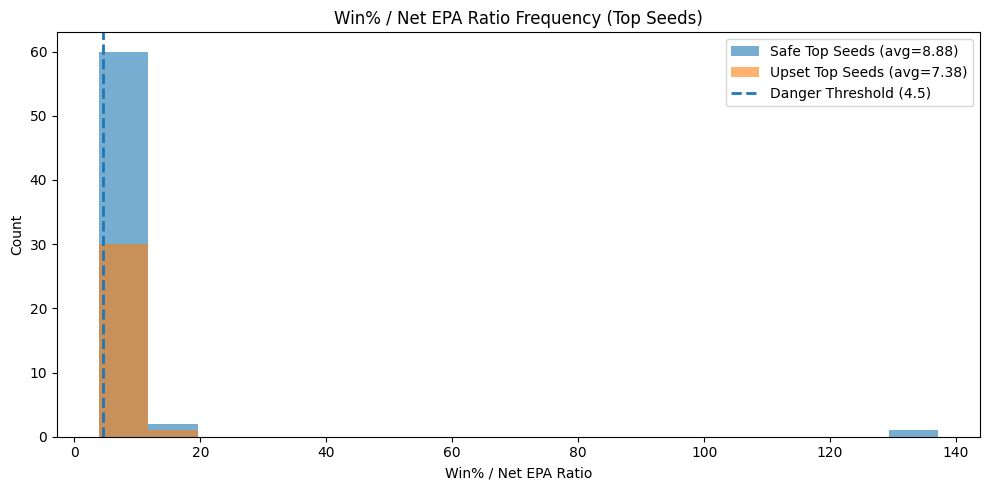

In [399]:
threshold = 4.5

safe_vals = top.loc[~top["is_upset_top_seed"], "win_epa_ratio"].dropna()
upset_vals = top.loc[top["is_upset_top_seed"], "win_epa_ratio"].dropna()

plt.figure(figsize=(10, 5))

bins = np.linspace(
    np.nanmin(top["win_epa_ratio"]),
    np.nanmax(top["win_epa_ratio"]),
    18
)

plt.hist(safe_vals, bins=bins, alpha=0.6, label=f"Safe Top Seeds (avg={safe_vals.mean():.2f})")
plt.hist(upset_vals, bins=bins, alpha=0.6, label=f"Upset Top Seeds (avg={upset_vals.mean():.2f})")

plt.axvline(threshold, linestyle="--", linewidth=2, label=f"Danger Threshold ({threshold})")

plt.title("Win% / Net EPA Ratio Frequency (Top Seeds)")
plt.xlabel("Win% / Net EPA Ratio")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


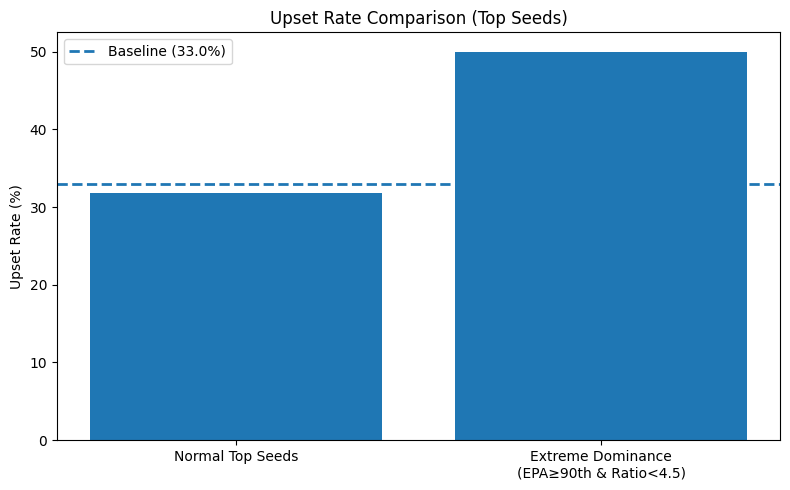

In [400]:
threshold = 4.5
epa90 = top["net_epa"].quantile(0.90)

top["extreme_dominance"] = (top["net_epa"] >= epa90) & (top["win_epa_ratio"] < threshold)

# Upset rates
normal_rate = top.loc[~top["extreme_dominance"], "is_upset_top_seed"].mean() * 100
extreme_rate = top.loc[top["extreme_dominance"], "is_upset_top_seed"].mean() * 100
baseline_rate = top["is_upset_top_seed"].mean() * 100

plt.figure(figsize=(8, 5))

labels = ["Normal Top Seeds", "Extreme Dominance\n(EPA≥90th & Ratio<4.5)"]
values = [normal_rate, extreme_rate]

x = np.arange(len(labels))
plt.bar(x, values)

plt.axhline(baseline_rate, linestyle="--", linewidth=2, label=f"Baseline ({baseline_rate:.1f}%)")

plt.xticks(x, labels)
plt.ylabel("Upset Rate (%)")
plt.title("Upset Rate Comparison (Top Seeds)")
plt.legend()
plt.tight_layout()
plt.show()


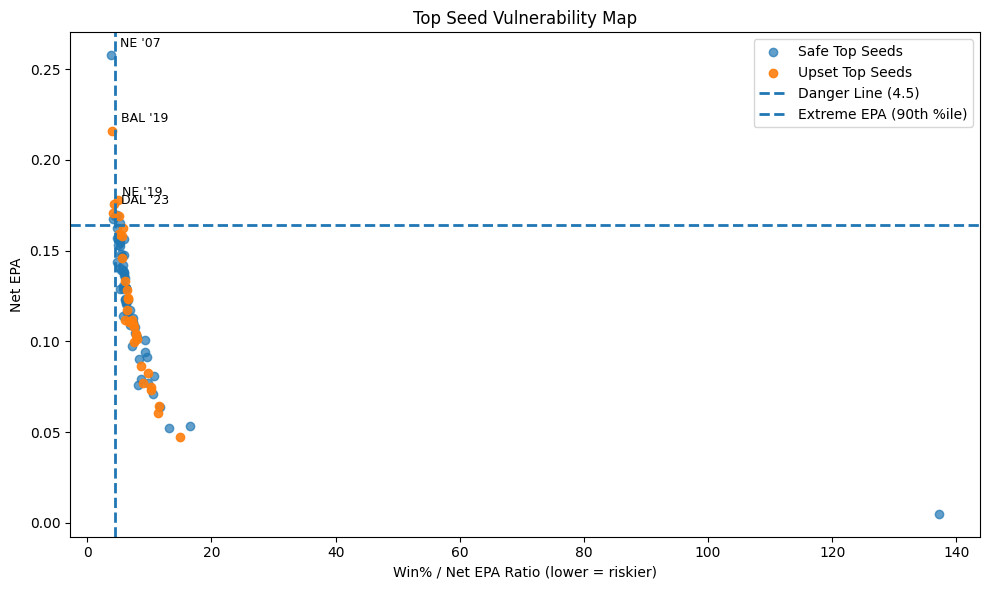

In [401]:
threshold = 4.5
epa90 = top["net_epa"].quantile(0.90)

plt.figure(figsize=(10, 6))

# Plot safe vs upset with different markers
safe = top[~top["is_upset_top_seed"]]
upset = top[top["is_upset_top_seed"]]

plt.scatter(safe["win_epa_ratio"], safe["net_epa"], alpha=0.7, label="Safe Top Seeds")
plt.scatter(upset["win_epa_ratio"], upset["net_epa"], alpha=0.9, label="Upset Top Seeds")

# Reference lines
plt.axvline(threshold, linestyle="--", linewidth=2, label=f"Danger Line ({threshold})")
plt.axhline(epa90, linestyle="--", linewidth=2, label="Extreme EPA (90th %ile)")

# Annotate a few "most vulnerable" points (edit as you like)
top["risk_score"] = top["net_epa"] / top["win_epa_ratio"]  # higher = higher EPA + lower ratio
annot = top.nlargest(4, "risk_score")

for _, r in annot.iterrows():
    label = f"{r['team']} '{str(int(r['season']))[-2:]}"
    plt.annotate(
        label,
        (r["win_epa_ratio"], r["net_epa"]),
        textcoords="offset points",
        xytext=(6, 6),
        fontsize=9
    )

plt.title("Top Seed Vulnerability Map")
plt.xlabel("Win% / Net EPA Ratio (lower = riskier)")
plt.ylabel("Net EPA")
plt.legend()
plt.tight_layout()
plt.show()


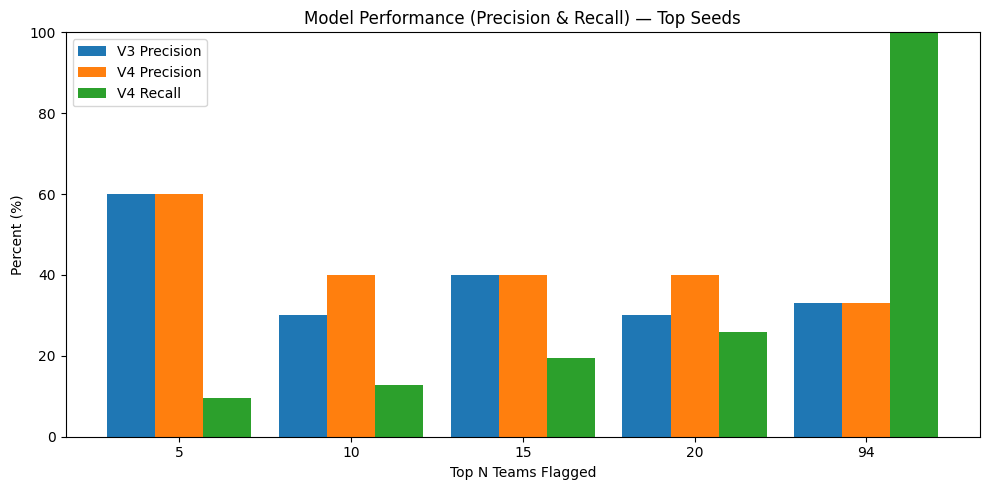

In [403]:
# Define risk scores
top_eval = top.copy()
top_eval["score_v3"] = -top_eval["win_epa_ratio"]                 # lower ratio => higher score
top_eval["score_v4"] = top_eval["net_epa"] / top_eval["win_epa_ratio"]  # extreme EPA + low ratio

total_upsets = int(top_eval["is_upset_top_seed"].sum())

Ns = [5, 10, 15, 20, len(top_eval)]
rows = []

for N in Ns:
    flagged_v3 = top_eval.nlargest(N, "score_v3")
    flagged_v4 = top_eval.nlargest(N, "score_v4")

    prec_v3 = flagged_v3["is_upset_top_seed"].mean() if N else np.nan
    prec_v4 = flagged_v4["is_upset_top_seed"].mean() if N else np.nan
    rec_v4 = (flagged_v4["is_upset_top_seed"].sum() / total_upsets) if total_upsets else np.nan

    rows.append([N, prec_v3, prec_v4, rec_v4])

metrics = pd.DataFrame(rows, columns=["TopN", "V3_precision", "V4_precision", "V4_recall"])

# Plot grouped bars
plt.figure(figsize=(10, 5))
x = np.arange(len(metrics))
w = 0.28

plt.bar(x - w, metrics["V3_precision"] * 100, width=w, label="V3 Precision")
plt.bar(x,      metrics["V4_precision"] * 100, width=w, label="V4 Precision")
plt.bar(x + w,  metrics["V4_recall"] * 100, width=w, label="V4 Recall")

plt.xticks(x, metrics["TopN"].astype(str))
plt.ylim(0, 100)
plt.xlabel("Top N Teams Flagged")
plt.ylabel("Percent (%)")
plt.title("Model Performance (Precision & Recall) — Top Seeds")
plt.legend()
plt.tight_layout()
plt.show()


In [404]:
df

team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  \
0    BAL          5.200000   0.057377       0.106557          94.631353   
1    DEN          6.254767   0.064801       0.120766          96.524064   
2    IND          5.612999   0.066561       0.120444          97.389413   
3    MIA          5.840568   0.068740       0.121113          95.538721   
4    MIN          4.335048   0.045190       0.086006          95.064541   
..   ...               ...        ...            ...                ...   
291  MIN         11.418440   0.065333       0.214667          89.067055   
292  PHI          9.457364   0.062500       0.185976          91.471215   
293  PIT         10.584752   0.058480       0.209064          88.657574   
294   TB         11.385062   0.061333       0.209333          93.066476   
295  WAS          9.292035   0.069579       0.203883          91.365888   

     sacks_allowed_rate  protection_rate        primary_qb            coach  \
0              0.072027         0.874372        Tony Banks    Brian Billick   
1              0.045113         0.921805      Brian Griese    Mike Shanahan   
2              0.030817         0.944530    Peyton Manning         Jim Mora   
3              0.058190         0.885776       Jay Fiedler   Dave Wannstedt   
4              0.057283         0.893617  Daunte Culpepper     Dennis Green   
..                  ...              ...               ...              ...   
291            0.072700         0.777448       Sam Darnold  Kevin O'Connell   
292            0.079646         0.787611       Jalen Hurts    Nick Sirianni   
293            0.079160         0.744750    Russell Wilson      Mike Tomlin   
294            0.058055         0.859216    Baker Mayfield      Todd Bowles   
295            0.072464         0.823188    Jayden Daniels        Dan Quinn   

     passing_epa  ...  momentum_residual         momentum_bin  champion  \
0      -0.058830  ...           1.365842      Very Hot\n(>1σ)         1   
1       0.170375  ...           0.412741    Warm\n(0 to 0.5σ)         0   
2       0.248321  ...          -0.535170  Cold\n(-1 to -0.5σ)         0   
3       0.080670  ...          -0.663392  Cold\n(-1 to -0.5σ)         0   
4       0.187037  ...          -1.997430    Very Cold\n(<-1σ)         0   
..           ...  ...                ...                  ...       ...   
291     0.133091  ...           0.745432     Hot\n(0.5 to 1σ)         0   
292     0.163234  ...           0.183836    Warm\n(0 to 0.5σ)         1   
293     0.047466  ...          -2.158118    Very Cold\n(<-1σ)         0   
294     0.208587  ...           0.442328    Warm\n(0 to 0.5σ)         0   
295     0.210168  ...           1.968047      Very Hot\n(>1σ)         0   

     upset_winner  spread_magnitude  upset_game_type  upset_temp  upset_wind  \
0             Yes               3.0               SB        65.0         8.0   
1              No              None             None        None        None   
2              No              None             None        None        None   
3              No              None             None        None        None   
4             Yes               8.0              DIV         NaN         NaN   
..            ...               ...              ...         ...         ...   
291            No              None             None        None        None   
292           Yes               5.5               WC        40.0         6.0   
293            No              None             None        None        None   
294            No              None             None        None        None   
295            No              None             None        None        None   

     upset_roof  win_epa_ratio  
0      outdoors       5.388270  
1          None       8.480761  
2          None       7.507158  
3          None       7.850822  
4          dome      26.672745  
..          ...            ...  
291        None       8.614883  
292    outdoors       5.9694

In [405]:
df.to_string()

"    team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate          primary_qb            coach  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  total_offensive_epa  total_plays  defensive_epa  defensive_pass_epa  defensive_rush_epa  wins  losses  ties   win_pct  point_differential  last_5_win_pct  playoff_seed  season conference   superbowl_win finish_bin   net_epa  predicted_finish_a  momentum_residual_a  predicted_finish_b  momentum_residual_b  momentum_residual_a_std  momentum_residual_b_std  momentum_residual            momentum_bin  champion upset_winner spread_magnitude upset_game_type upset_temp upset_wind upset_roof  win_epa_ratio\n0    BAL          5.200000   0.057377       0.106557          94.631353            0.072027         0.874372          Tony Banks    Brian Billick    -0.058830               597    -0.049608               508            -0.018458         1436      -0.157649           -0.129676          

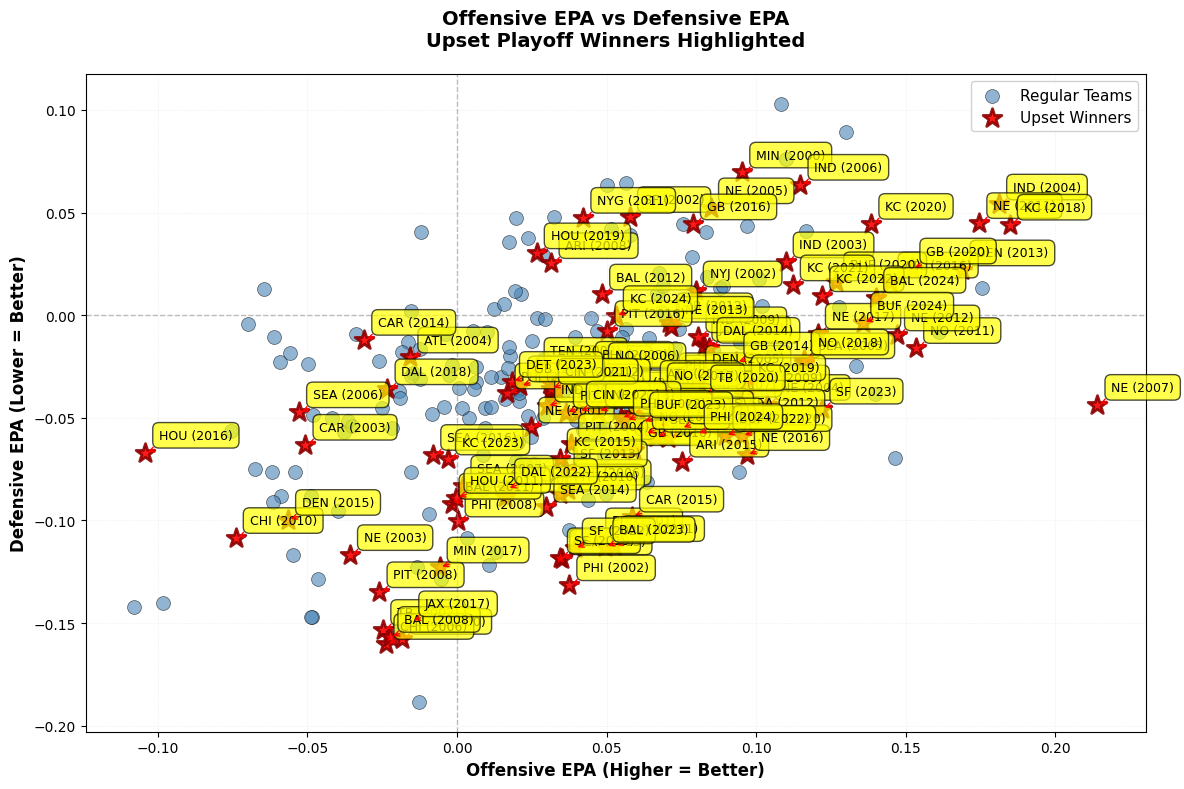


Total teams: 296
Upset winners: 122

Upset teams details:
    team  season  total_offensive_epa  defensive_epa  wins  losses upset_game_type
0    BAL    2000            -0.018458      -0.157649    12       4              SB
4    MIN    2000             0.095301       0.069526    11       5             DIV
6    NYG    2000             0.034352      -0.029667    12       4             DIV
12    GB    2001             0.054614      -0.065090    12       4              WC
14    NE    2001             0.024814      -0.054683    11       5             DIV
16   PHI    2001             0.016103      -0.088353    11       5              WC
17   PIT    2001             0.047161      -0.108670    13       3             DIV
25   NYJ    2002             0.079777       0.011610     9       7              WC
26   PHI    2002             0.037510      -0.131547    12       4             DIV
27   PIT    2002             0.031089      -0.033245    10       5              WC
28    SF    2002            

In [406]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Separate upset teams from normal teams
upset_teams = df[df['upset_winner'] == 'Yes']
normal_teams = df[df['upset_winner'] != 'Yes']

# Plot normal teams
ax.scatter(normal_teams['total_offensive_epa'], 
           normal_teams['defensive_epa'],
           alpha=0.6, 
           s=100, 
           c='steelblue',
           label='Regular Teams',
           edgecolors='black',
           linewidth=0.5)

# Plot upset teams
ax.scatter(upset_teams['total_offensive_epa'], 
           upset_teams['defensive_epa'],
           alpha=0.9, 
           s=200, 
           c='red',
           label='Upset Winners',
           edgecolors='darkred',
           linewidth=2,
           marker='*')

# Add reference lines at zero
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Labels and title
ax.set_xlabel('Offensive EPA (Higher = Better)', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive EPA (Lower = Better)', fontsize=12, fontweight='bold')
ax.set_title('Offensive EPA vs Defensive EPA\nUpset Playoff Winners Highlighted', 
             fontsize=14, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)

# Legend
ax.legend(loc='best', fontsize=11, framealpha=0.9)

# Add annotations for upset teams
for idx, row in upset_teams.iterrows():
    ax.annotate(f"{row['team']} ({row['season']})", 
                xy=(row['total_offensive_epa'], row['defensive_epa']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red'))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal teams: {len(df)}")
print(f"Upset winners: {len(upset_teams)}")
print(f"\nUpset teams details:")
print(upset_teams[['team', 'season', 'total_offensive_epa', 'defensive_epa', 'wins', 'losses', 'upset_game_type']].to_string())

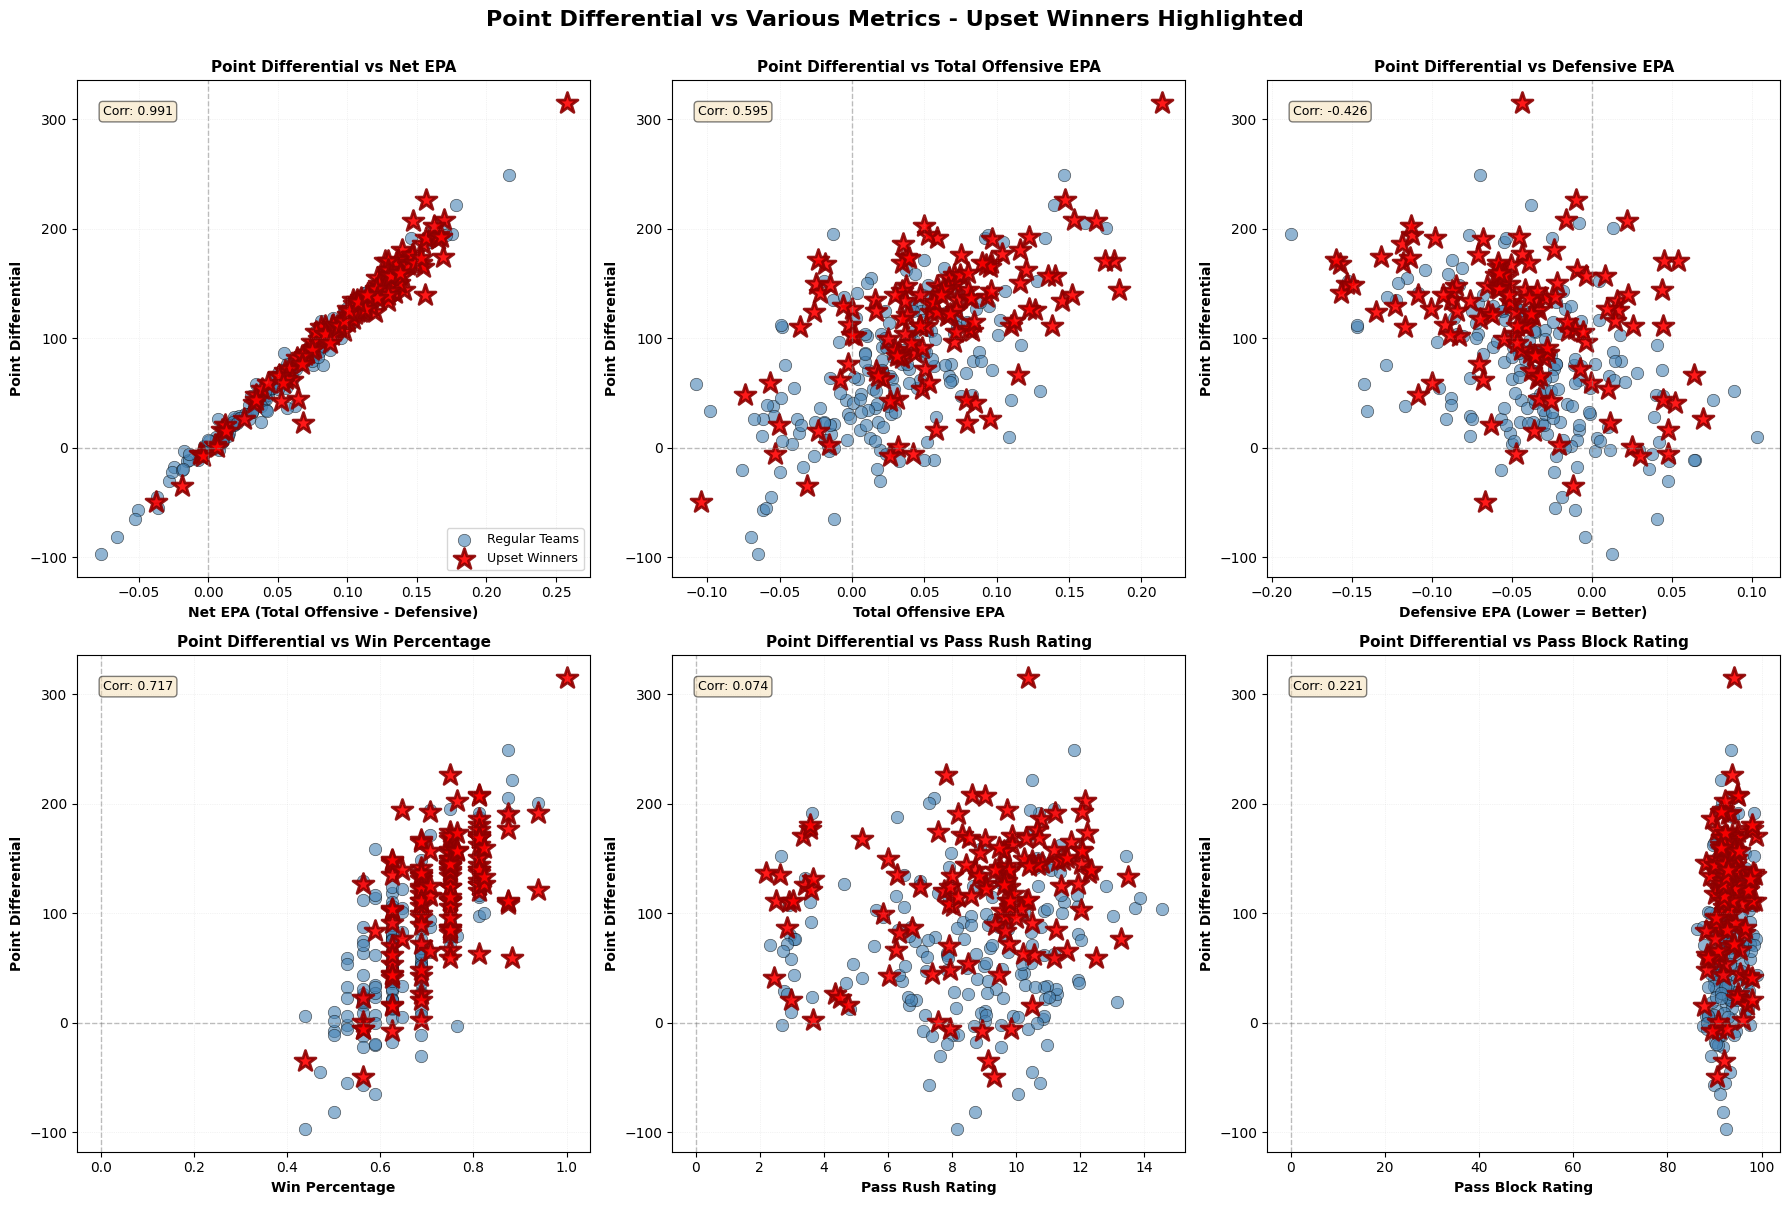


CORRELATION ANALYSIS: Point Differential vs Various Metrics
Net EPA                  :  0.988
Total Offensive EPA      :  0.611
Defensive EPA            : -0.389
Win Percentage           :  0.721
Pass Rush Rating         :  0.128
Pass Block Rating        :  0.178

UPSET WINNERS STATISTICS
team  season  point_differential   net_epa  win_pct  total_offensive_epa  defensive_epa
 BAL    2000                 168  0.139191 0.750000            -0.018458      -0.157649
 MIN    2000                  26  0.025775 0.687500             0.095301       0.069526
 NYG    2000                  82  0.064019 0.750000             0.034352      -0.029667
  GB    2001                 124  0.119704 0.750000             0.054614      -0.065090
  NE    2001                  99  0.079497 0.687500             0.024814      -0.054683
 PHI    2001                 135  0.104456 0.687500             0.016103      -0.088353
 PIT    2001                 140  0.155831 0.812500             0.047161      -0.108670
 NYJ 

In [407]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Point Differential vs Various Metrics - Upset Winners Highlighted', 
             fontsize=16, fontweight='bold', y=1.00)

# Separate upset teams from normal teams
upset_teams = df[df['upset_winner'] == 'Yes']
normal_teams = df[df['upset_winner'] != 'Yes']

# List of comparisons to make
comparisons = [
    ('net_epa', 'Net EPA', 'Net EPA (Total Offensive - Defensive)'),
    ('total_offensive_epa', 'Total Offensive EPA', 'Total Offensive EPA'),
    ('defensive_epa', 'Defensive EPA', 'Defensive EPA (Lower = Better)'),
    ('win_pct', 'Win Percentage', 'Win Percentage'),
    ('pass_rush_rating', 'Pass Rush Rating', 'Pass Rush Rating'),
    ('pass_block_rating', 'Pass Block Rating', 'Pass Block Rating')
]

for idx, (col, short_name, label) in enumerate(comparisons):
    ax = axes[idx // 3, idx % 3]
    
    # Plot normal teams
    ax.scatter(normal_teams[col], 
               normal_teams['point_differential'],
               alpha=0.6, 
               s=80, 
               c='steelblue',
               label='Regular Teams',
               edgecolors='black',
               linewidth=0.5)
    
    # Plot upset teams
    ax.scatter(upset_teams[col], 
               upset_teams['point_differential'],
               alpha=0.9, 
               s=250, 
               c='red',
               label='Upset Winners',
               edgecolors='darkred',
               linewidth=2,
               marker='*')
    
    # Add reference lines at zero
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    # Labels and formatting
    ax.set_xlabel(label, fontsize=10, fontweight='bold')
    ax.set_ylabel('Point Differential', fontsize=10, fontweight='bold')
    ax.set_title(f'Point Differential vs {short_name}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
    
    # Add correlation coefficient
    corr = normal_teams[[col, 'point_differential']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Corr: {corr:.3f}', 
            transform=ax.transAxes, 
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Legend only on first subplot
    if idx == 0:
        ax.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# Print correlation analysis
print("\n" + "="*70)
print("CORRELATION ANALYSIS: Point Differential vs Various Metrics")
print("="*70)

for col, short_name, _ in comparisons:
    corr = df[[col, 'point_differential']].corr().iloc[0, 1]
    print(f"{short_name:25s}: {corr:6.3f}")

print("\n" + "="*70)
print("UPSET WINNERS STATISTICS")
print("="*70)
print(upset_teams[['team', 'season', 'point_differential', 'net_epa', 'win_pct', 
                   'total_offensive_epa', 'defensive_epa']].to_string(index=False))

print("\n" + "="*70)
print("SUMMARY STATS FOR UPSET WINNERS")
print("="*70)
print(f"Mean Point Differential: {upset_teams['point_differential'].mean():.2f}")
print(f"Mean Net EPA: {upset_teams['net_epa'].mean():.4f}")
print(f"Mean Win %: {upset_teams['win_pct'].mean():.3f}")
print(f"\nFor comparison - All teams:")
print(f"Mean Point Differential: {df['point_differential'].mean():.2f}")
print(f"Mean Net EPA: {df['net_epa'].mean():.4f}")
print(f"Mean Win %: {df['win_pct'].mean():.3f}")

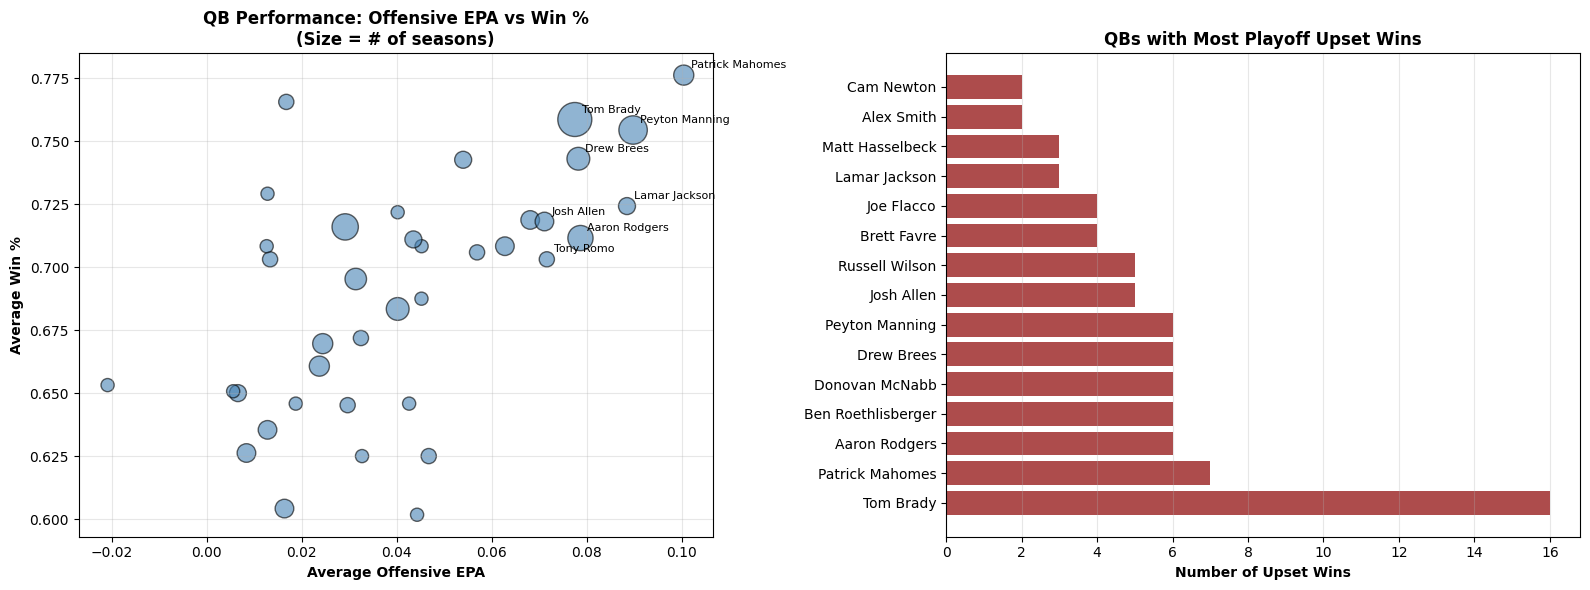


Top QBs by Offensive EPA:
                 total_offensive_epa   win_pct  upset_winner  seasons
primary_qb                                                           
Patrick Mahomes             0.100464  0.776261             7        7
Peyton Manning              0.089796  0.754464             6       14
Lamar Jackson               0.088510  0.724265             3        5
Aaron Rodgers               0.078710  0.711564             6       11
Drew Brees                  0.078266  0.743056             6        9
Tom Brady                   0.077518  0.758640            16       20
Tony Romo                   0.071625  0.703125             2        4
Josh Allen                  0.071122  0.718137             5        6
Brett Favre                 0.068118  0.718750             4        6
Matt Ryan                   0.062793  0.708333             2        6


In [408]:
# Group by QB and calculate average stats
qb_stats = df.groupby('primary_qb').agg({
    'total_offensive_epa': 'mean',
    'win_pct': 'mean',
    'upset_winner': lambda x: (x == 'Yes').sum(),
    'season': 'count'
}).rename(columns={'season': 'seasons'})

# Filter QBs with at least 3 seasons
qb_stats = qb_stats[qb_stats['seasons'] >= 3]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: QB Offensive EPA vs Win %
axes[0].scatter(qb_stats['total_offensive_epa'], qb_stats['win_pct'], 
                s=qb_stats['seasons']*30, alpha=0.6, c='steelblue', edgecolors='black')
axes[0].set_xlabel('Average Offensive EPA', fontweight='bold')
axes[0].set_ylabel('Average Win %', fontweight='bold')
axes[0].set_title('QB Performance: Offensive EPA vs Win %\n(Size = # of seasons)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Annotate top QBs
top_qbs = qb_stats.nlargest(8, 'total_offensive_epa')
for qb, row in top_qbs.iterrows():
    axes[0].annotate(qb, xy=(row['total_offensive_epa'], row['win_pct']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 2: QB Upset Wins
top_upset_qbs = qb_stats.nlargest(15, 'upset_winner')
axes[1].barh(range(len(top_upset_qbs)), top_upset_qbs['upset_winner'], color='darkred', alpha=0.7)
axes[1].set_yticks(range(len(top_upset_qbs)))
axes[1].set_yticklabels(top_upset_qbs.index)
axes[1].set_xlabel('Number of Upset Wins', fontweight='bold')
axes[1].set_title('QBs with Most Playoff Upset Wins', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop QBs by Offensive EPA:")
print(qb_stats.nlargest(10, 'total_offensive_epa')[['total_offensive_epa', 'win_pct', 'upset_winner', 'seasons']])

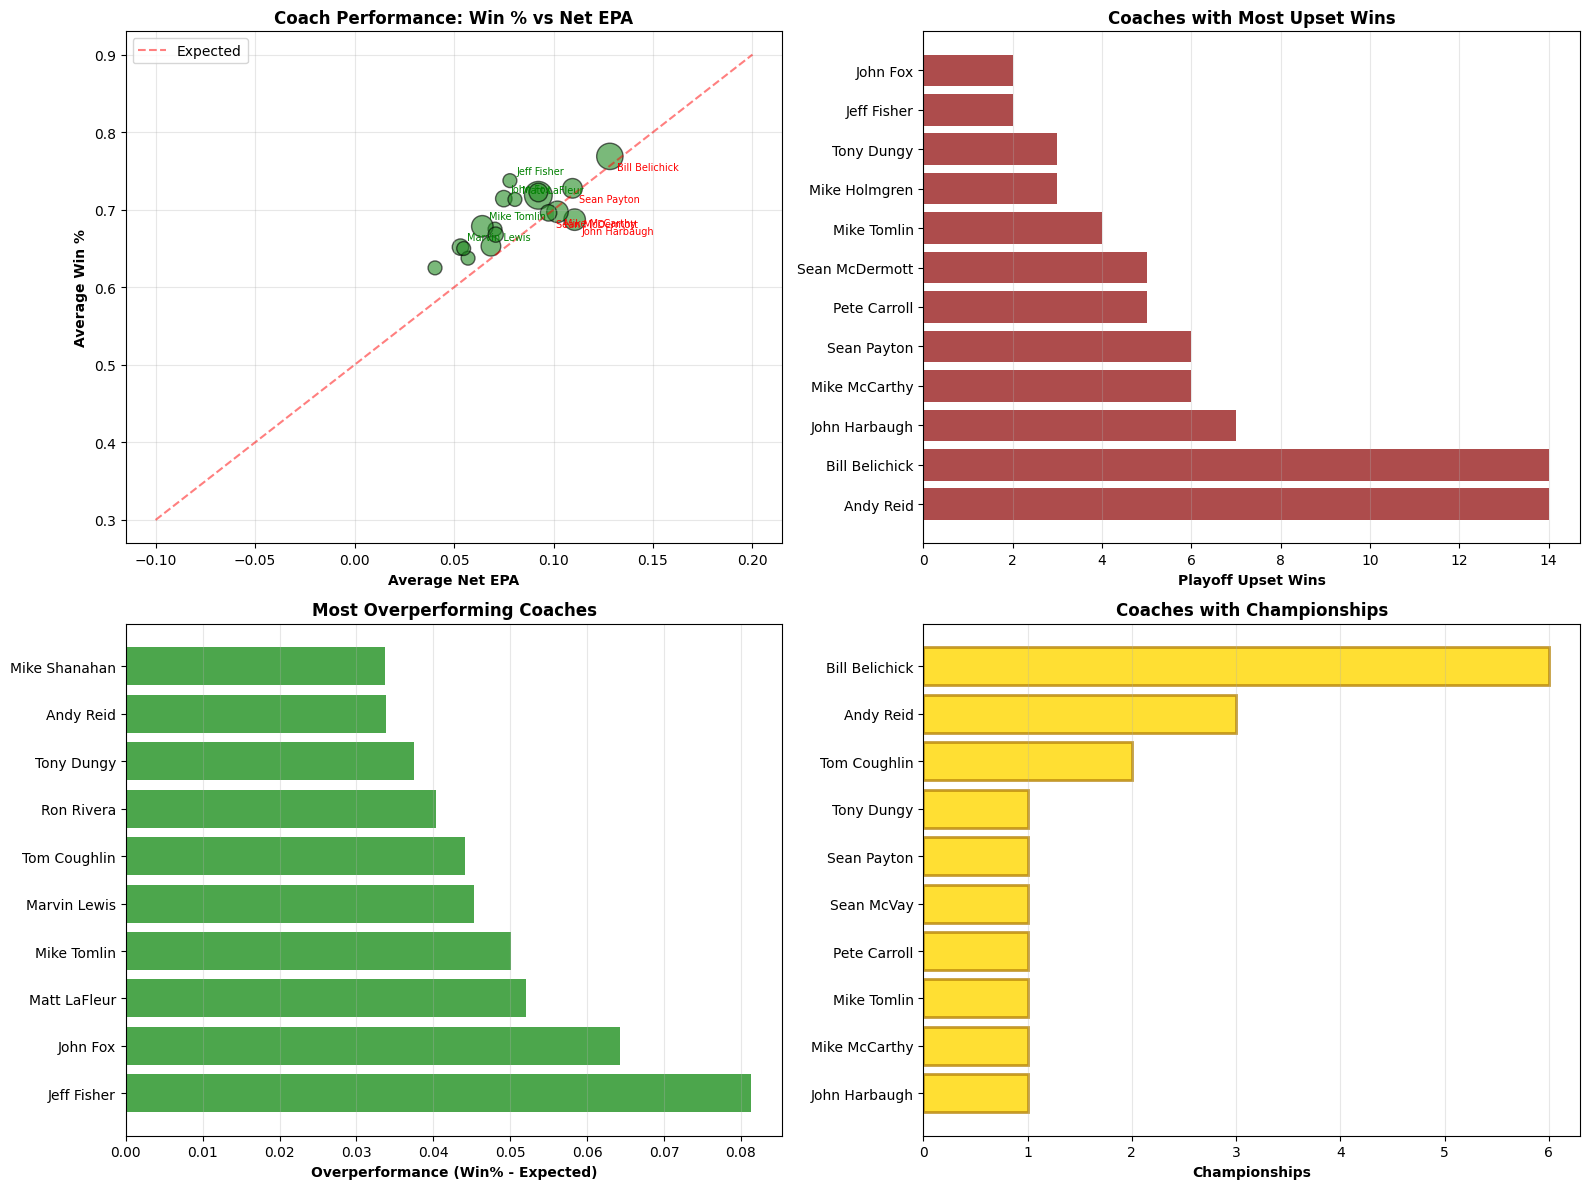


Top Overperforming Coaches:
                win_pct   net_epa  overperformance  upset_winner  seasons
coach                                                                    
Jeff Fisher    0.737500  0.078086         0.081328             2        5
John Fox       0.714286  0.075009         0.064268             2        7
Matt LaFleur   0.713235  0.080611         0.052014             2        5
Mike Tomlin    0.678615  0.064230         0.050156             4       12
Marvin Lewis   0.651786  0.053241         0.045303             0        7
Tom Coughlin   0.625000  0.040451         0.044099             1        5
Ron Rivera     0.650000  0.054854         0.040292             2        5
Tony Dungy     0.722222  0.092396         0.037430             3        9
Andy Reid      0.718566  0.092380         0.033806            14       20
Mike Shanahan  0.675000  0.070612         0.033775             1        5


In [409]:
# Group by coach
coach_stats = df.groupby('coach').agg({
    'win_pct': 'mean',
    'net_epa': 'mean',
    'upset_winner': lambda x: (x == 'Yes').sum(),
    'champion': lambda x: (x == 1).sum(),
    'season': 'count'
}).rename(columns={'season': 'seasons'})

coach_stats = coach_stats[coach_stats['seasons'] >= 5]
coach_stats['overperformance'] = coach_stats['win_pct'] - (coach_stats['net_epa'] * 2 + 0.5)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Coach Win % vs Net EPA
axes[0, 0].scatter(coach_stats['net_epa'], coach_stats['win_pct'], 
                   s=coach_stats['seasons']*20, alpha=0.6, c='forestgreen', edgecolors='black')
axes[0, 0].plot([-0.1, 0.2], [0.3, 0.9], 'r--', alpha=0.5, label='Expected')
axes[0, 0].set_xlabel('Average Net EPA', fontweight='bold')
axes[0, 0].set_ylabel('Average Win %', fontweight='bold')
axes[0, 0].set_title('Coach Performance: Win % vs Net EPA', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Annotate overperformers and underperformers
top_over = coach_stats.nlargest(5, 'overperformance')
top_under = coach_stats.nsmallest(5, 'overperformance')
for coach, row in top_over.iterrows():
    axes[0, 0].annotate(coach, xy=(row['net_epa'], row['win_pct']),
                       xytext=(5, 5), textcoords='offset points', fontsize=7, color='green')
for coach, row in top_under.iterrows():
    axes[0, 0].annotate(coach, xy=(row['net_epa'], row['win_pct']),
                       xytext=(5, -10), textcoords='offset points', fontsize=7, color='red')

# Plot 2: Coaches with most upset wins
top_upset_coaches = coach_stats.nlargest(12, 'upset_winner')
axes[0, 1].barh(range(len(top_upset_coaches)), top_upset_coaches['upset_winner'], 
                color='darkred', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_upset_coaches)))
axes[0, 1].set_yticklabels(top_upset_coaches.index)
axes[0, 1].set_xlabel('Playoff Upset Wins', fontweight='bold')
axes[0, 1].set_title('Coaches with Most Upset Wins', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Plot 3: Over/Underperformance
top_performers = coach_stats.nlargest(10, 'overperformance')
axes[1, 0].barh(range(len(top_performers)), top_performers['overperformance'], 
                color='green', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_performers)))
axes[1, 0].set_yticklabels(top_performers.index)
axes[1, 0].set_xlabel('Overperformance (Win% - Expected)', fontweight='bold')
axes[1, 0].set_title('Most Overperforming Coaches', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Championships
champ_coaches = coach_stats[coach_stats['champion'] > 0].sort_values('champion', ascending=True)
axes[1, 1].barh(range(len(champ_coaches)), champ_coaches['champion'], 
                color='gold', alpha=0.8, edgecolor='darkgoldenrod', linewidth=2)
axes[1, 1].set_yticks(range(len(champ_coaches)))
axes[1, 1].set_yticklabels(champ_coaches.index)
axes[1, 1].set_xlabel('Championships', fontweight='bold')
axes[1, 1].set_title('Coaches with Championships', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop Overperforming Coaches:")
print(coach_stats.nlargest(10, 'overperformance')[['win_pct', 'net_epa', 'overperformance', 'upset_winner', 'seasons']])

/var/folders/wy/1f323l5s4290gfs5rdkj3dlc0000gn/T/ipykernel_68058/273695888.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  momentum_upset = df.groupby('momentum_bin')['upset_winner'].apply(lambda x: (x == 'Yes').sum())
/var/folders/wy/1f323l5s4290gfs5rdkj3dlc0000gn/T/ipykernel_68058/273695888.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  momentum_total = df.groupby('momentum_bin').size()
/var/folders/wy/1f323l5s4290gfs5rdkj3dlc0000gn/T/ipykernel_68058/273695888.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

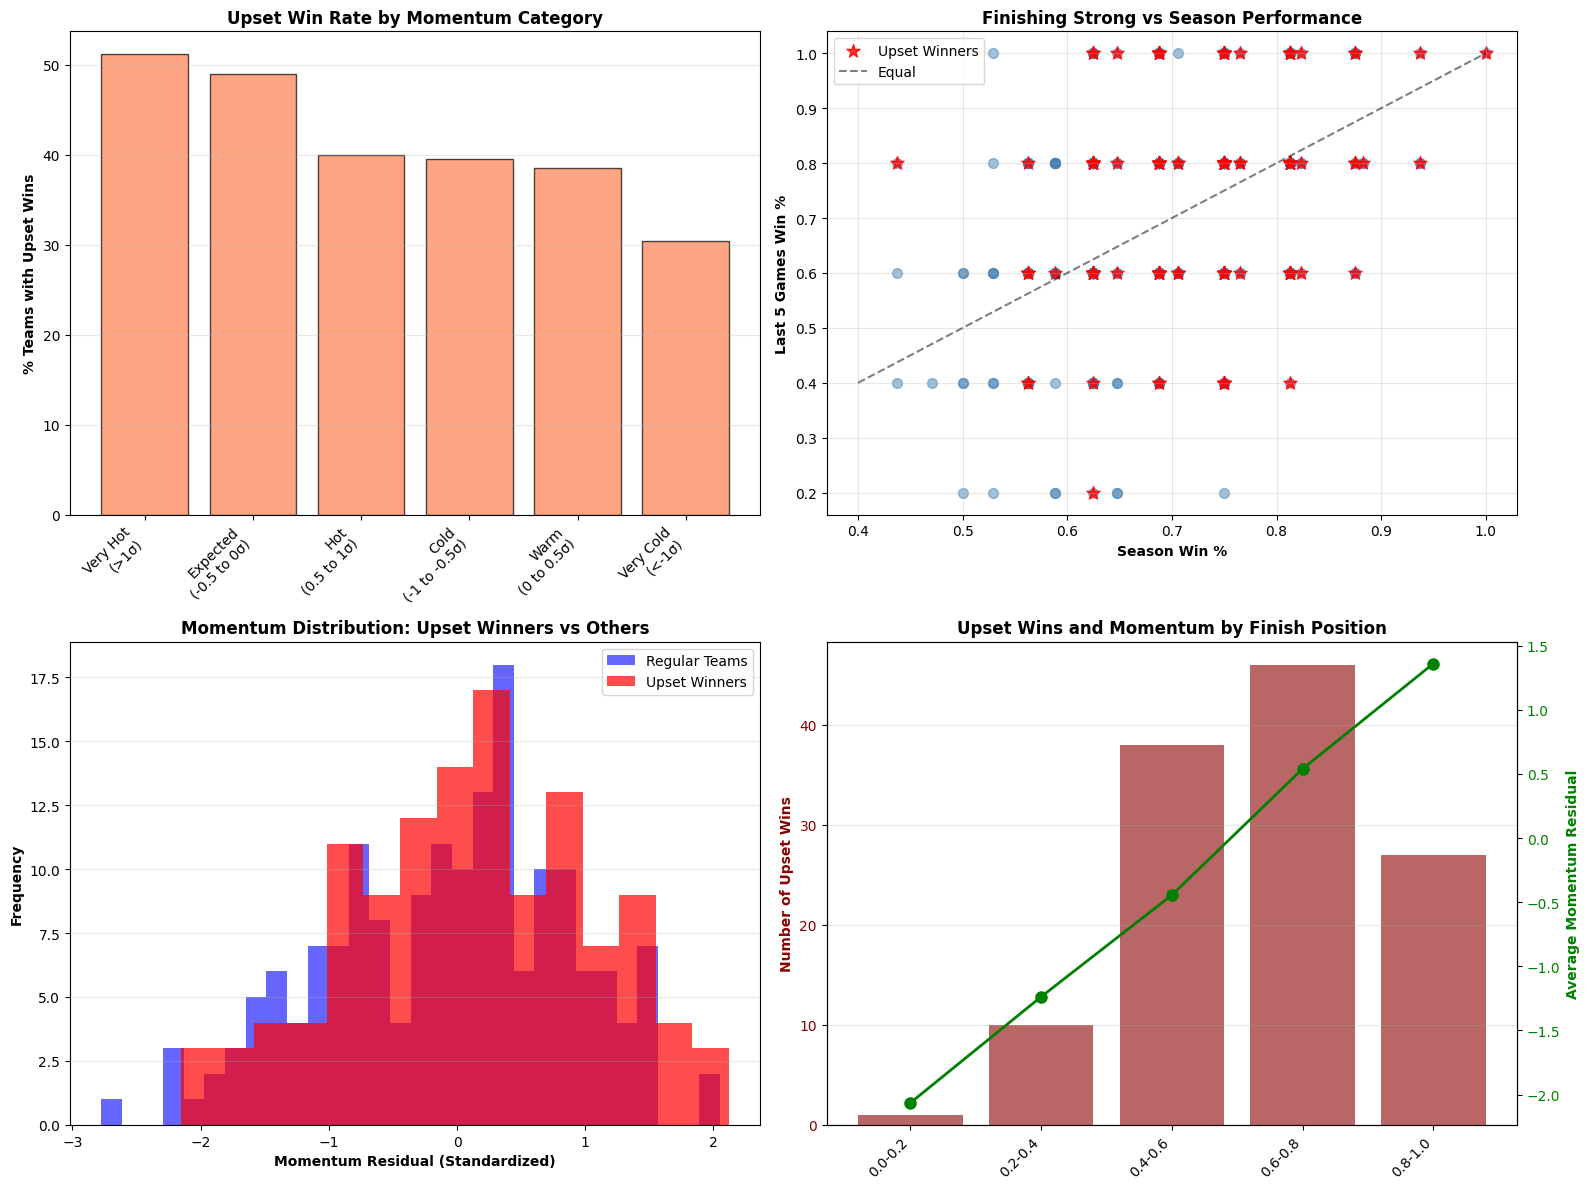


Momentum Statistics:
Upset Winners - Mean Momentum: 0.115
Regular Teams - Mean Momentum: -0.080


In [416]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Momentum bins vs upset success
momentum_upset = df.groupby('momentum_bin')['upset_winner'].apply(lambda x: (x == 'Yes').sum())
momentum_total = df.groupby('momentum_bin').size()
momentum_pct = (momentum_upset / momentum_total * 100).sort_values(ascending=False)

axes[0, 0].bar(range(len(momentum_pct)), momentum_pct.values, color='coral', alpha=0.7, edgecolor='black')
axes[0, 0].set_xticks(range(len(momentum_pct)))
axes[0, 0].set_xticklabels(momentum_pct.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('% Teams with Upset Wins', fontweight='bold')
axes[0, 0].set_title('Upset Win Rate by Momentum Category', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: Last 5 win % vs overall win %
axes[0, 1].scatter(df['win_pct'], df['last_5_win_pct'], alpha=0.5, c='steelblue', s=50)
upset_df = df[df['upset_winner'] == 'Yes']
axes[0, 1].scatter(upset_df['win_pct'], upset_df['last_5_win_pct'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[0, 1].plot([0.4, 1.0], [0.4, 1.0], 'k--', alpha=0.5, label='Equal')
axes[0, 1].set_xlabel('Season Win %', fontweight='bold')
axes[0, 1].set_ylabel('Last 5 Games Win %', fontweight='bold')
axes[0, 1].set_title('Finishing Strong vs Season Performance', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Momentum residual distributions
upset_momentum = df[df['upset_winner'] == 'Yes']['momentum_residual_a_std']
normal_momentum = df[df['upset_winner'] != 'Yes']['momentum_residual_a_std']

axes[1, 0].hist(normal_momentum.dropna(), bins=30, alpha=0.6, label='Regular Teams', color='blue')
axes[1, 0].hist(upset_momentum.dropna(), bins=15, alpha=0.7, label='Upset Winners', color='red')
axes[1, 0].set_xlabel('Momentum Residual (Standardized)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Momentum Distribution: Upset Winners vs Others', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Momentum vs upset wins by finish bin
finish_bins = df.groupby('finish_bin').agg({
    'upset_winner': lambda x: (x == 'Yes').sum(),
    'momentum_residual_a_std': 'mean'
}).dropna()

ax2 = axes[1, 1].twinx()
axes[1, 1].bar(range(len(finish_bins)), finish_bins['upset_winner'], 
               alpha=0.6, color='darkred', label='Upset Wins')
ax2.plot(range(len(finish_bins)), finish_bins['momentum_residual_a_std'], 
         'go-', linewidth=2, markersize=8, label='Avg Momentum')
axes[1, 1].set_xticks(range(len(finish_bins)))
axes[1, 1].set_xticklabels(finish_bins.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Number of Upset Wins', fontweight='bold', color='darkred')
ax2.set_ylabel('Average Momentum Residual', fontweight='bold', color='green')
axes[1, 1].set_title('Upset Wins and Momentum by Finish Position', fontweight='bold')
axes[1, 1].tick_params(axis='y', labelcolor='darkred')
ax2.tick_params(axis='y', labelcolor='green')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('upsets.pdf', format='pdf')
plt.show()

print("\nMomentum Statistics:")
print(f"Upset Winners - Mean Momentum: {upset_momentum.mean():.3f}")
print(f"Regular Teams - Mean Momentum: {normal_momentum.mean():.3f}")

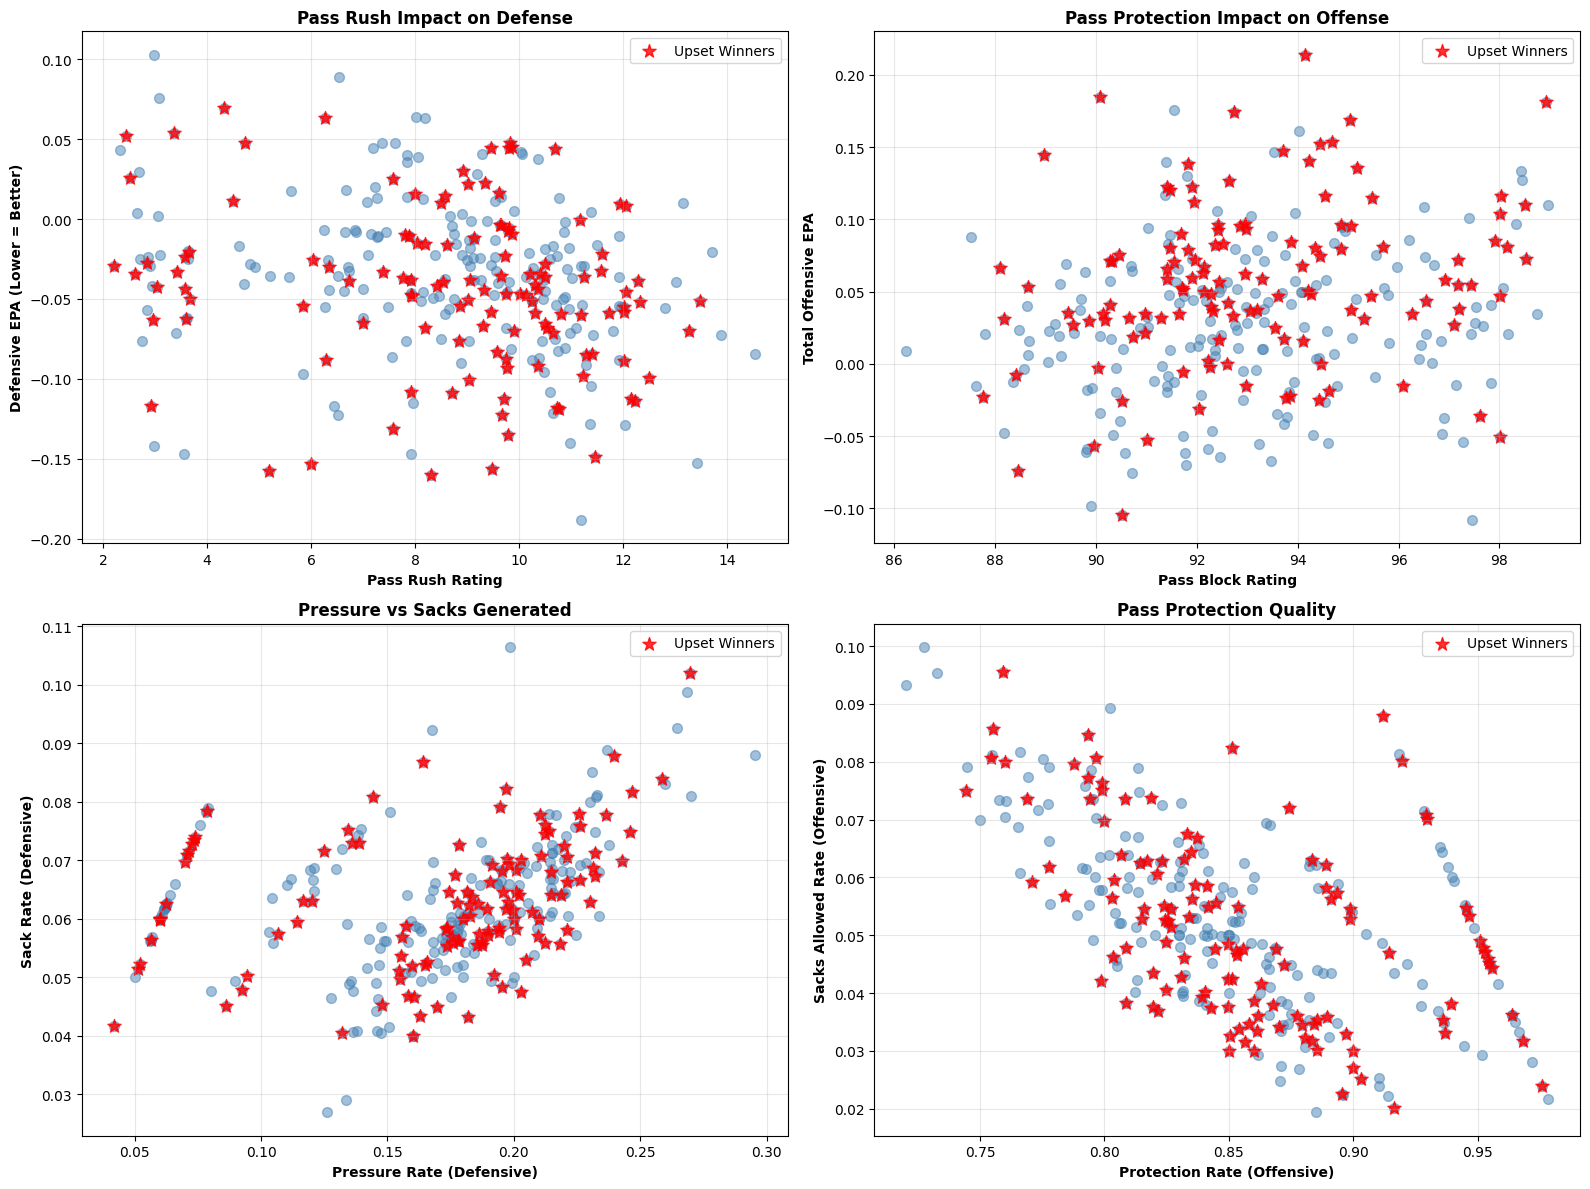


Pass Rush/Protection Correlations:
Pass Rush Rating vs Defensive EPA: -0.221
Pass Block Rating vs Offensive EPA: 0.186
Pressure Rate vs Sack Rate: 0.345


In [417]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Pass rush rating vs defensive EPA
axes[0, 0].scatter(df['pass_rush_rating'], df['defensive_epa'], alpha=0.5, c='steelblue', s=50)
upset_df = df[df['upset_winner'] == 'Yes']
axes[0, 0].scatter(upset_df['pass_rush_rating'], upset_df['defensive_epa'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[0, 0].set_xlabel('Pass Rush Rating', fontweight='bold')
axes[0, 0].set_ylabel('Defensive EPA (Lower = Better)', fontweight='bold')
axes[0, 0].set_title('Pass Rush Impact on Defense', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Pass block rating vs offensive EPA
axes[0, 1].scatter(df['pass_block_rating'], df['total_offensive_epa'], alpha=0.5, c='steelblue', s=50)
axes[0, 1].scatter(upset_df['pass_block_rating'], upset_df['total_offensive_epa'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[0, 1].set_xlabel('Pass Block Rating', fontweight='bold')
axes[0, 1].set_ylabel('Total Offensive EPA', fontweight='bold')
axes[0, 1].set_title('Pass Protection Impact on Offense', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Sack rate vs pressure rate
axes[1, 0].scatter(df['pressure_rate'], df['sack_rate'], alpha=0.5, c='steelblue', s=50)
axes[1, 0].scatter(upset_df['pressure_rate'], upset_df['sack_rate'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[1, 0].set_xlabel('Pressure Rate (Defensive)', fontweight='bold')
axes[1, 0].set_ylabel('Sack Rate (Defensive)', fontweight='bold')
axes[1, 0].set_title('Pressure vs Sacks Generated', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Protection rate vs sacks allowed rate
axes[1, 1].scatter(df['protection_rate'], df['sacks_allowed_rate'], alpha=0.5, c='steelblue', s=50)
axes[1, 1].scatter(upset_df['protection_rate'], upset_df['sacks_allowed_rate'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[1, 1].set_xlabel('Protection Rate (Offensive)', fontweight='bold')
axes[1, 1].set_ylabel('Sacks Allowed Rate (Offensive)', fontweight='bold')
axes[1, 1].set_title('Pass Protection Quality', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pass_rush_upsets.pdf', format='pdf')
plt.show()

# Correlations
print("\nPass Rush/Protection Correlations:")
print(f"Pass Rush Rating vs Defensive EPA: {df[['pass_rush_rating', 'defensive_epa']].corr().iloc[0,1]:.3f}")
print(f"Pass Block Rating vs Offensive EPA: {df[['pass_block_rating', 'total_offensive_epa']].corr().iloc[0,1]:.3f}")
print(f"Pressure Rate vs Sack Rate: {df[['pressure_rate', 'sack_rate']].corr().iloc[0,1]:.3f}")

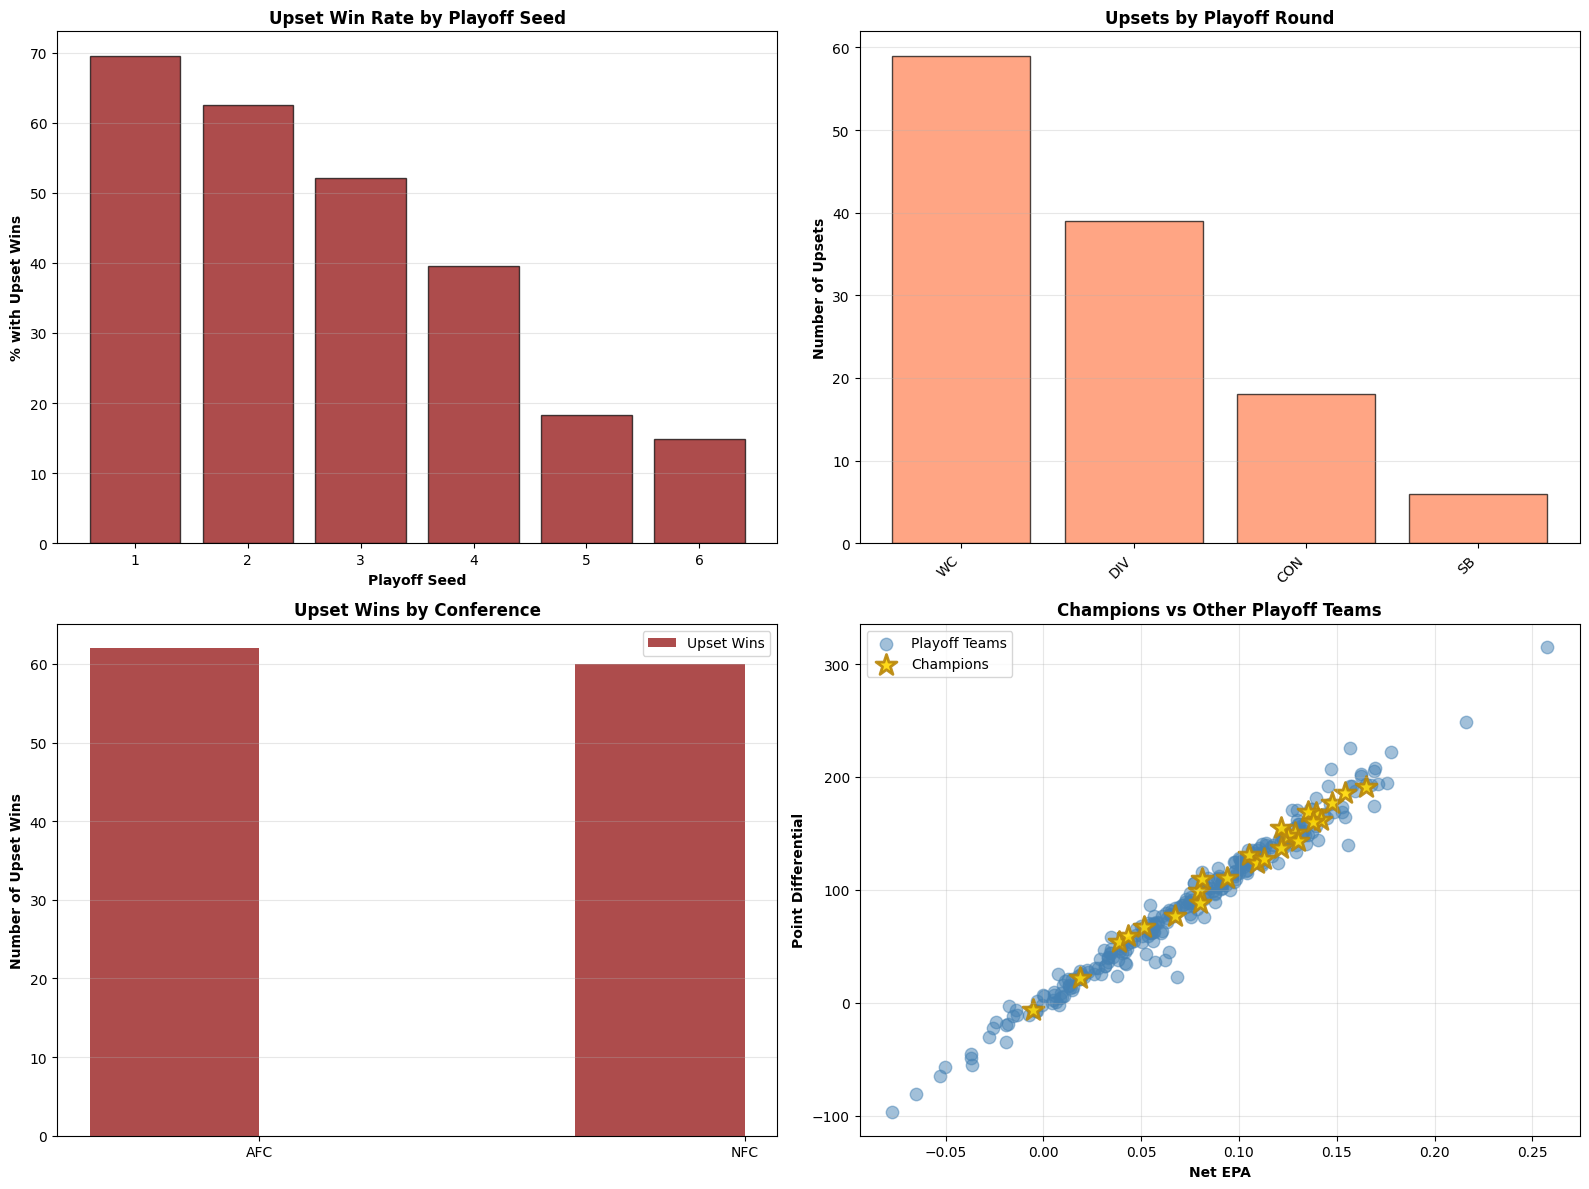


Playoff Statistics:

Upset wins by seed:
playoff_seed
1.0    32
2.0    30
3.0    25
4.0    19
5.0     9
6.0     7
dtype: int64

Upset wins by round:
upset_game_type
WC     59
DIV    39
CON    18
SB      6
Name: count, dtype: int64


In [413]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Upset wins by playoff seed
seed_upsets = df[df['upset_winner'] == 'Yes'].groupby('playoff_seed').size()
seed_total = df.groupby('playoff_seed').size()
seed_pct = (seed_upsets / seed_total * 100).sort_index()

axes[0, 0].bar(seed_pct.index, seed_pct.values, color='darkred', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Playoff Seed', fontweight='bold')
axes[0, 0].set_ylabel('% with Upset Wins', fontweight='bold')
axes[0, 0].set_title('Upset Win Rate by Playoff Seed', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: Upset game type distribution
upset_types = df[df['upset_winner'] == 'Yes']['upset_game_type'].value_counts()
axes[0, 1].bar(range(len(upset_types)), upset_types.values, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(len(upset_types)))
axes[0, 1].set_xticklabels(upset_types.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Number of Upsets', fontweight='bold')
axes[0, 1].set_title('Upsets by Playoff Round', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Conference comparison
conf_data = df.groupby('conference').agg({
    'upset_winner': lambda x: (x == 'Yes').sum(),
    'net_epa': 'mean',
    'point_differential': 'mean',
    'win_pct': 'mean'
})

x = np.arange(len(conf_data.index))
width = 0.35

axes[1, 0].bar(x - width/2, conf_data['upset_winner'], width, label='Upset Wins', 
               color='darkred', alpha=0.7)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(conf_data.index)
axes[1, 0].set_ylabel('Number of Upset Wins', fontweight='bold')
axes[1, 0].set_title('Upset Wins by Conference', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Super Bowl winners vs other playoff teams
sb_winners = df[df['champion'] == 1]
playoff_teams = df[(df['playoff_seed'].notna()) & (df['champion'] == 0)]

axes[1, 1].scatter(playoff_teams['net_epa'], playoff_teams['point_differential'], 
                   alpha=0.5, s=80, c='steelblue', label='Playoff Teams')
axes[1, 1].scatter(sb_winners['net_epa'], sb_winners['point_differential'], 
                   alpha=0.9, s=250, c='gold', marker='*', edgecolors='darkgoldenrod', 
                   linewidth=2, label='Champions')
axes[1, 1].set_xlabel('Net EPA', fontweight='bold')
axes[1, 1].set_ylabel('Point Differential', fontweight='bold')
axes[1, 1].set_title('Champions vs Other Playoff Teams', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPlayoff Statistics:")
print("\nUpset wins by seed:")
print(seed_upsets.sort_index())
print("\nUpset wins by round:")
print(upset_types)

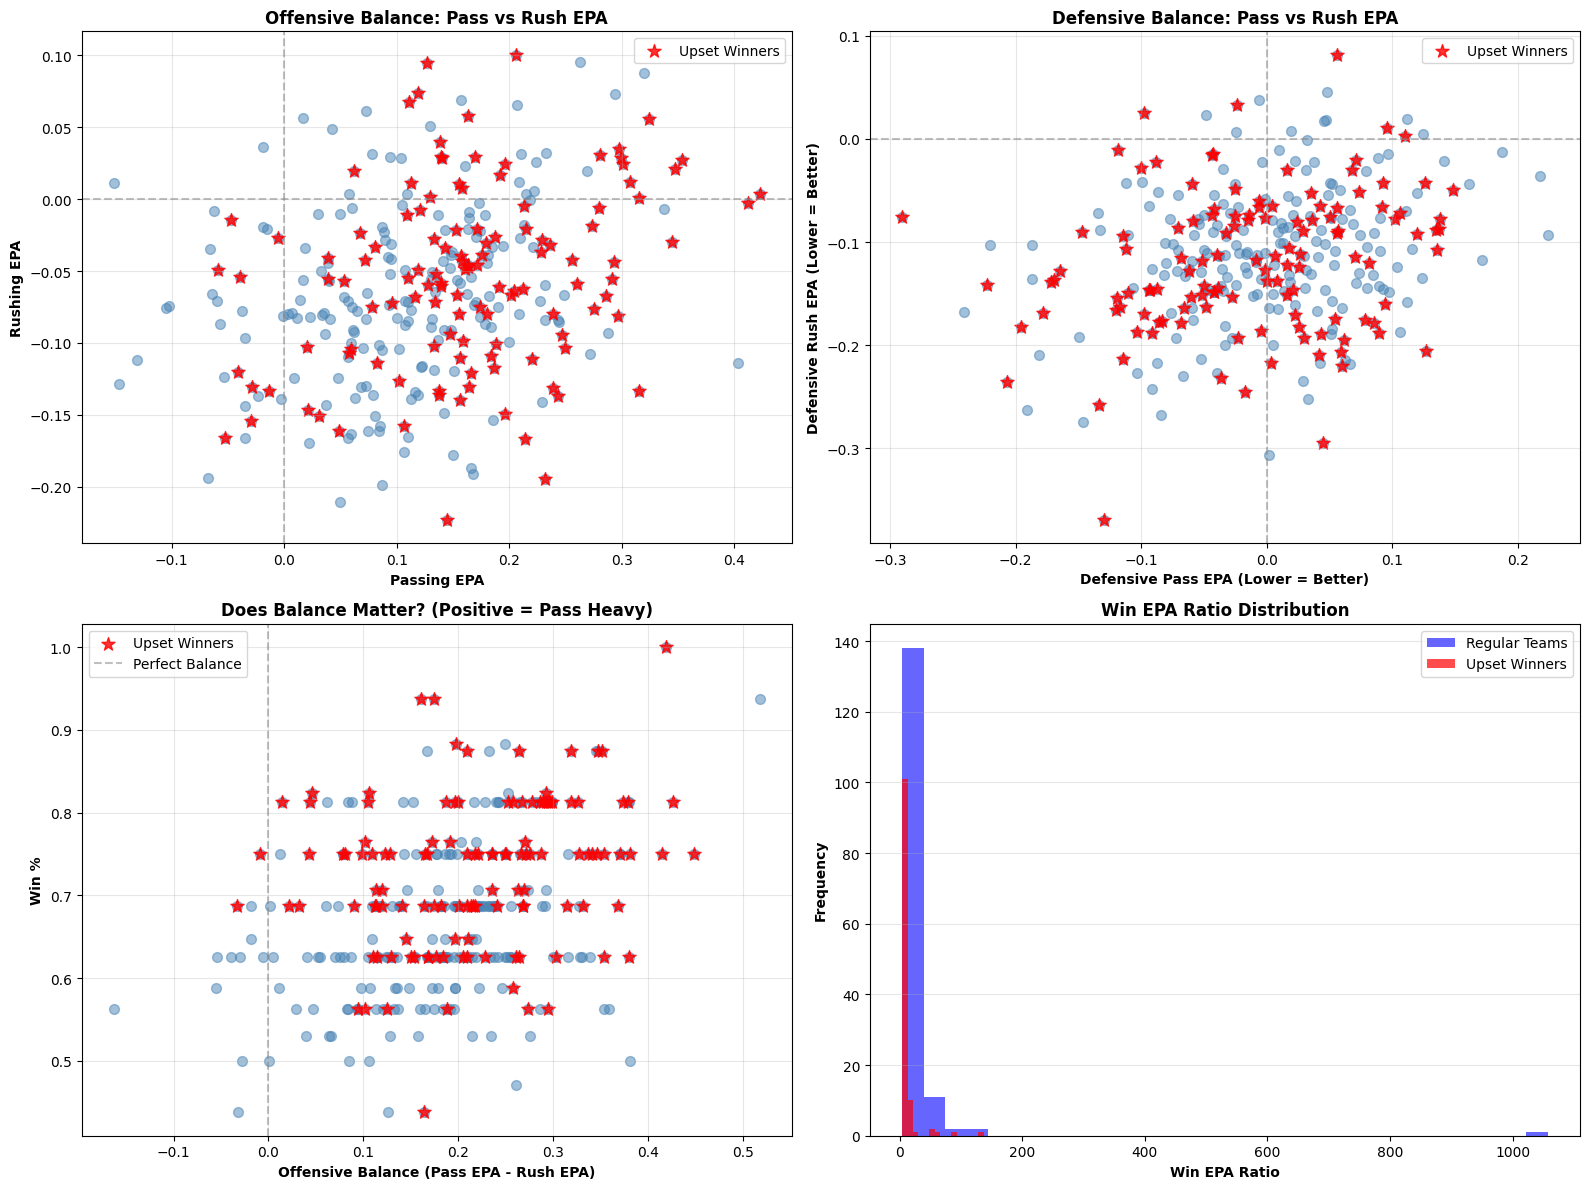


Balance Analysis:
Passing EPA vs Rushing EPA correlation: 0.277
Offensive balance vs Win%: 0.343

Mean offensive balance (upset winners): 0.2180
Mean offensive balance (all teams): 0.1909


In [418]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Passing EPA vs Rushing EPA (offense)
axes[0, 0].scatter(df['passing_epa'], df['rushing_epa'], alpha=0.5, c='steelblue', s=50)
upset_df = df[df['upset_winner'] == 'Yes']
axes[0, 0].scatter(upset_df['passing_epa'], upset_df['rushing_epa'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[0, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Passing EPA', fontweight='bold')
axes[0, 0].set_ylabel('Rushing EPA', fontweight='bold')
axes[0, 0].set_title('Offensive Balance: Pass vs Rush EPA', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Defensive pass EPA vs defensive rush EPA
axes[0, 1].scatter(df['defensive_pass_epa'], df['defensive_rush_epa'], alpha=0.5, c='steelblue', s=50)
axes[0, 1].scatter(upset_df['defensive_pass_epa'], upset_df['defensive_rush_epa'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Defensive Pass EPA (Lower = Better)', fontweight='bold')
axes[0, 1].set_ylabel('Defensive Rush EPA (Lower = Better)', fontweight='bold')
axes[0, 1].set_title('Defensive Balance: Pass vs Rush EPA', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Balance metric (difference between pass and rush)
df['offensive_balance'] = df['passing_epa'] - df['rushing_epa']
df['defensive_balance'] = df['defensive_pass_epa'] - df['defensive_rush_epa']

axes[1, 0].scatter(df['offensive_balance'], df['win_pct'], alpha=0.5, c='steelblue', s=50)
upset_df = df[df['upset_winner'] == 'Yes']
axes[1, 0].scatter(upset_df['offensive_balance'], upset_df['win_pct'], 
                   alpha=0.8, c='red', s=100, marker='*', label='Upset Winners')
axes[1, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='Perfect Balance')
axes[1, 0].set_xlabel('Offensive Balance (Pass EPA - Rush EPA)', fontweight='bold')
axes[1, 0].set_ylabel('Win %', fontweight='bold')
axes[1, 0].set_title('Does Balance Matter? (Positive = Pass Heavy)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Win EPA ratio distribution
axes[1, 1].hist(df[df['upset_winner'] != 'Yes']['win_epa_ratio'].dropna(), 
                bins=30, alpha=0.6, label='Regular Teams', color='blue')
axes[1, 1].hist(upset_df['win_epa_ratio'].dropna(), 
                bins=15, alpha=0.7, label='Upset Winners', color='red')
axes[1, 1].set_xlabel('Win EPA Ratio', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Win EPA Ratio Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('team_upset_balance.pdf', format='pdf')
plt.show()

print("\nBalance Analysis:")
print(f"Passing EPA vs Rushing EPA correlation: {df[['passing_epa', 'rushing_epa']].corr().iloc[0,1]:.3f}")
print(f"Offensive balance vs Win%: {df[['offensive_balance', 'win_pct']].corr().iloc[0,1]:.3f}")
print(f"\nMean offensive balance (upset winners): {upset_df['offensive_balance'].mean():.4f}")
print(f"Mean offensive balance (all teams): {df['offensive_balance'].mean():.4f}")

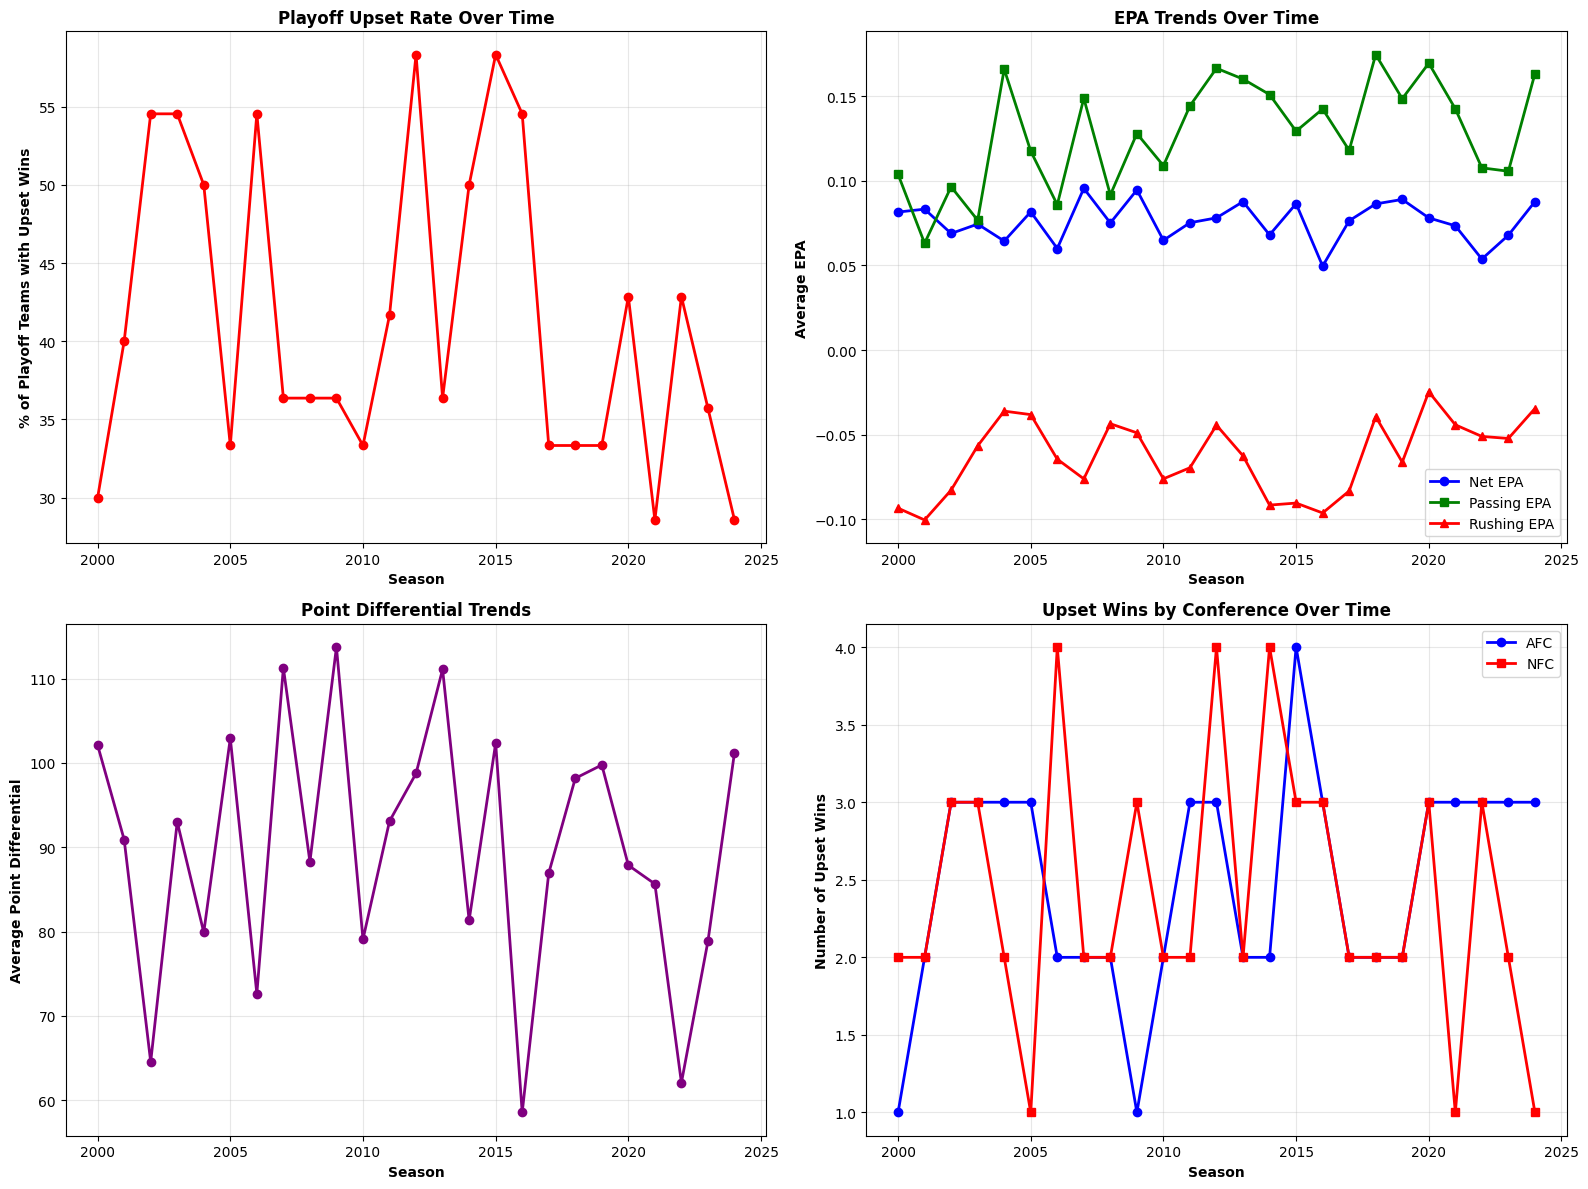


Trend Analysis:
Upset rate correlation with year: -0.257
Passing EPA correlation with year: 0.503


In [419]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Upsets over time
yearly_upsets = df[df['upset_winner'] == 'Yes'].groupby('season').size()
yearly_playoff = df.groupby('season').size()
upset_rate = (yearly_upsets / yearly_playoff * 100)

axes[0, 0].plot(upset_rate.index, upset_rate.values, 'ro-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Season', fontweight='bold')
axes[0, 0].set_ylabel('% of Playoff Teams with Upset Wins', fontweight='bold')
axes[0, 0].set_title('Playoff Upset Rate Over Time', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Average EPA trends
yearly_stats = df.groupby('season').agg({
    'net_epa': 'mean',
    'passing_epa': 'mean',
    'rushing_epa': 'mean'
})

axes[0, 1].plot(yearly_stats.index, yearly_stats['net_epa'], 'b-', linewidth=2, label='Net EPA', marker='o')
axes[0, 1].plot(yearly_stats.index, yearly_stats['passing_epa'], 'g-', linewidth=2, label='Passing EPA', marker='s')
axes[0, 1].plot(yearly_stats.index, yearly_stats['rushing_epa'], 'r-', linewidth=2, label='Rushing EPA', marker='^')
axes[0, 1].set_xlabel('Season', fontweight='bold')
axes[0, 1].set_ylabel('Average EPA', fontweight='bold')
axes[0, 1].set_title('EPA Trends Over Time', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Point differential trends
yearly_pd = df.groupby('season')['point_differential'].mean()
axes[1, 0].plot(yearly_pd.index, yearly_pd.values, 'purple', linewidth=2, marker='o')
axes[1, 0].set_xlabel('Season', fontweight='bold')
axes[1, 0].set_ylabel('Average Point Differential', fontweight='bold')
axes[1, 0].set_title('Point Differential Trends', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Conference balance over time
conf_upsets = df[df['upset_winner'] == 'Yes'].groupby(['season', 'conference']).size().unstack(fill_value=0)
axes[1, 1].plot(conf_upsets.index, conf_upsets['AFC'], 'b-', linewidth=2, label='AFC', marker='o')
axes[1, 1].plot(conf_upsets.index, conf_upsets['NFC'], 'r-', linewidth=2, label='NFC', marker='s')
axes[1, 1].set_xlabel('Season', fontweight='bold')
axes[1, 1].set_ylabel('Number of Upset Wins', fontweight='bold')
axes[1, 1].set_title('Upset Wins by Conference Over Time', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('playoff_upset_rate.pdf', format='pdf')
plt.show()

print("\nTrend Analysis:")
print(f"Upset rate correlation with year: {upset_rate.reset_index().corr().iloc[0,1]:.3f}")
print(f"Passing EPA correlation with year: {yearly_stats.reset_index()[['season', 'passing_epa']].corr().iloc[0,1]:.3f}")

In [420]:
def plot_upset_master_dashboard(combined_dataset: pd.DataFrame,
                               save_path: str | None = None,
                               dpi: int = 300):
    df = combined_dataset.copy()

    # Robust upset flag (handles Yes/No, True/False, 1/0)
    df["upset_flag"] = (
        df["upset_winner"]
        .astype(str)
        .str.strip()
        .str.lower()
        .isin(["yes", "true", "1", "y"])
    )

    # Derived fields used in the prior analyses
    df["offensive_balance"] = df["passing_epa"] - df["rushing_epa"]  # pass-leaning if positive
    df["win_epa_ratio"] = np.where(df["net_epa"] > 0, df["win_pct"] / df["net_epa"], np.nan)

    # ---------- Helpers ----------
    def scatter_upset(ax, x, y, title, xlabel=None, ylabel=None, add_zero_lines=False):
        d = df[[x, y, "upset_flag"]].dropna()

        # Plot non-upset first, then upset (so upsets sit on top)
        ax.scatter(
            d.loc[~d["upset_flag"], x],
            d.loc[~d["upset_flag"], y],
            s=25,
            alpha=0.55,
            label="No upset win"
        )
        ax.scatter(
            d.loc[d["upset_flag"], x],
            d.loc[d["upset_flag"], y],
            s=120,
            marker="*",
            alpha=0.9,
            label="Upset win"
        )

        if add_zero_lines:
            ax.axhline(0, linewidth=1, alpha=0.6)
            ax.axvline(0, linewidth=1, alpha=0.6)

        ax.set_title(title)
        ax.set_xlabel(xlabel or x)
        ax.set_ylabel(ylabel or y)
        ax.grid(True, alpha=0.25)

    def safe_corr(a, b):
        tmp = df[[a, b]].dropna()
        return tmp[a].corr(tmp[b]) if len(tmp) > 2 else np.nan

    def bin_left_edge(s: str):
        # Extract the first number in strings like "(0.0, 0.2]"
        nums = re.findall(r"-?\d+(?:\.\d+)?", str(s))
        return float(nums[0]) if nums else np.nan

    # ---------- Figure layout ----------
    fig, axes = plt.subplots(4, 4, figsize=(28, 22))
    fig.suptitle(
        "NFL Playoff Upset Analysis Dashboard (2000–2024)\n"
        "Line Play • Trends • Balance • Momentum",
        fontsize=20,
        fontweight="bold",
        y=0.98
    )

    # =========================
    # Row 1: Pass Rush / Protection (4 plots)
    # =========================
    scatter_upset(
        axes[0, 0],
        "pass_rush_rating", "defensive_epa",
        "Pass Rush Rating vs Defensive EPA",
        xlabel="Pass Rush Rating",
        ylabel="Defensive EPA (lower = better)"
    )

    scatter_upset(
        axes[0, 1],
        "pass_block_rating", "total_offensive_epa",
        "Pass Block Rating vs Offensive EPA",
        xlabel="Pass Block Rating",
        ylabel="Total Offensive EPA"
    )

    scatter_upset(
        axes[0, 2],
        "pressure_rate", "sack_rate",
        "Pressure Rate vs Sack Rate",
        xlabel="Pressure Rate",
        ylabel="Sack Rate"
    )

    scatter_upset(
        axes[0, 3],
        "protection_rate", "sacks_allowed_rate",
        "Protection Rate vs Sacks Allowed Rate",
        xlabel="Protection Rate",
        ylabel="Sacks Allowed Rate"
    )

    # =========================
    # Row 2: Trend analysis (4 plots)
    # =========================
    upset_by_year = df.groupby("season")["upset_flag"].mean().mul(100)
    axes[1, 0].plot(upset_by_year.index, upset_by_year.values, marker="o")
    axes[1, 0].set_title("Upset Rate Over Time")
    axes[1, 0].set_xlabel("Season")
    axes[1, 0].set_ylabel("% Playoff Teams with Upset Wins")
    axes[1, 0].grid(True, alpha=0.25)

    epa_trends = df.groupby("season")[["net_epa", "passing_epa", "rushing_epa"]].mean()
    axes[1, 1].plot(epa_trends.index, epa_trends["net_epa"], marker="o", label="Net EPA")
    axes[1, 1].plot(epa_trends.index, epa_trends["passing_epa"], marker="o", label="Passing EPA")
    axes[1, 1].plot(epa_trends.index, epa_trends["rushing_epa"], marker="o", label="Rushing EPA")
    axes[1, 1].set_title("EPA Trends Over Time")
    axes[1, 1].set_xlabel("Season")
    axes[1, 1].set_ylabel("Average EPA")
    axes[1, 1].legend(frameon=False)
    axes[1, 1].grid(True, alpha=0.25)

    pd_trends = df.groupby("season")["point_differential"].mean()
    axes[1, 2].plot(pd_trends.index, pd_trends.values, marker="o")
    axes[1, 2].set_title("Point Differential Trends Over Time")
    axes[1, 2].set_xlabel("Season")
    axes[1, 2].set_ylabel("Average Point Differential")
    axes[1, 2].grid(True, alpha=0.25)

    # Upset wins by conference over time
    conf_counts = (
        df.loc[df["upset_flag"]]
          .groupby(["season", "conference"])
          .size()
          .unstack(fill_value=0)
          .sort_index()
    )
    for col in conf_counts.columns:
        axes[1, 3].plot(conf_counts.index, conf_counts[col], marker="o", label=str(col))
    axes[1, 3].set_title("Upset Wins by Conference Over Time")
    axes[1, 3].set_xlabel("Season")
    axes[1, 3].set_ylabel("Upset Wins (count)")
    axes[1, 3].legend(frameon=False)
    axes[1, 3].grid(True, alpha=0.25)

    # =========================
    # Row 3: Balance analysis (4 plots)
    # =========================
    scatter_upset(
        axes[2, 0],
        "passing_epa", "rushing_epa",
        "Offensive Balance: Passing vs Rushing EPA",
        xlabel="Passing EPA",
        ylabel="Rushing EPA"
    )

    scatter_upset(
        axes[2, 1],
        "defensive_pass_epa", "defensive_rush_epa",
        "Defensive Balance: Pass vs Rush EPA Allowed",
        xlabel="Defensive Pass EPA Allowed",
        ylabel="Defensive Rush EPA Allowed",
        add_zero_lines=True
    )

    scatter_upset(
        axes[2, 2],
        "offensive_balance", "win_pct",
        "Offensive Balance vs Win %",
        xlabel="Passing EPA − Rushing EPA",
        ylabel="Win %"
    )
    axes[2, 2].axvline(0, linewidth=1, alpha=0.6)

    # Win/EPA ratio distribution (net_epa > 0 only)
    ratio = df["win_epa_ratio"].dropna()
    ratio_upset = df.loc[df["upset_flag"], "win_epa_ratio"].dropna()
    ratio_regular = df.loc[~df["upset_flag"], "win_epa_ratio"].dropna()

    axes[2, 3].hist(ratio_regular, bins=35, alpha=0.6, density=True, label="No upset win")
    axes[2, 3].hist(ratio_upset, bins=35, alpha=0.6, density=True, label="Upset win")
    axes[2, 3].set_title("Win% / Net EPA Ratio Distribution (Net EPA > 0)")
    axes[2, 3].set_xlabel("Win% / Net EPA")
    axes[2, 3].set_ylabel("Density")
    axes[2, 3].legend(frameon=False)
    axes[2, 3].grid(True, alpha=0.25)

    # =========================
    # Row 4: Momentum analysis (4 plots)
    # =========================
    # Upset rate by momentum category (use existing bins if present)
    # Your CSV already has momentum_bin like "Very Hot\n(>1σ)" etc.
    momentum_order = [
        "Very Cold\n(<-1σ)",
        "Cold\n(-1 to -0.5σ)",
        "Expected\n(-0.5 to 0σ)",
        "Warm\n(0 to 0.5σ)",
        "Hot\n(0.5 to 1σ)",
        "Very Hot\n(>1σ)",
    ]
    mom_rate = df.groupby("momentum_bin")["upset_flag"].mean().mul(100)
    mom_rate = mom_rate.reindex([m for m in momentum_order if m in mom_rate.index])

    axes[3, 0].bar(mom_rate.index, mom_rate.values)
    axes[3, 0].set_title("Upset Win Rate by Momentum Category")
    axes[3, 0].set_xlabel("Momentum Category")
    axes[3, 0].set_ylabel("% Teams with Upset Wins")
    axes[3, 0].tick_params(axis="x", rotation=30)
    axes[3, 0].grid(True, axis="y", alpha=0.25)

    # Finishing strong vs season performance
    # predicted_finish_a is your "finish win %" style signal in the dataset
    scatter_upset(
        axes[3, 1],
        "win_pct", "predicted_finish_a",
        "Finishing Strong vs Season Performance",
        xlabel="Season Win %",
        ylabel="Finish Win % (predicted_finish_a)"
    )
    # Add y=x reference line if scales overlap
    x_min, x_max = axes[3, 1].get_xlim()
    y_min, y_max = axes[3, 1].get_ylim()
    lo = max(min(x_min, y_min), 0)
    hi = min(max(x_max, y_max), 1)
    axes[3, 1].plot([lo, hi], [lo, hi], linewidth=1, alpha=0.6)

    # Momentum residual distribution
    # (You have momentum_residual_b_std in the CSV)
    mcol = "momentum_residual_b_std"
    m_up = df.loc[df["upset_flag"], mcol].dropna()
    m_reg = df.loc[~df["upset_flag"], mcol].dropna()

    axes[3, 2].hist(m_reg, bins=30, alpha=0.6, density=True, label="No upset win")
    axes[3, 2].hist(m_up, bins=30, alpha=0.6, density=True, label="Upset win")
    axes[3, 2].axvline(0, linewidth=1, alpha=0.6)
    axes[3, 2].set_title("Momentum Residual Distribution (Standardized)")
    axes[3, 2].set_xlabel("Momentum Residual (Std)")
    axes[3, 2].set_ylabel("Density")
    axes[3, 2].legend(frameon=False)
    axes[3, 2].grid(True, alpha=0.25)

    # Upset wins by finish bin + avg momentum residual (dual axis)
    finish_order = sorted(df["finish_bin"].dropna().unique(), key=bin_left_edge)
    upset_finish_counts = (
        df.loc[df["upset_flag"]]
          .groupby("finish_bin")
          .size()
          .reindex(finish_order, fill_value=0)
    )
    avg_mom_by_finish = (
        df.groupby("finish_bin")["momentum_residual"]
          .mean()
          .reindex(finish_order)
    )

    ax = axes[3, 3]
    ax.bar(upset_finish_counts.index, upset_finish_counts.values)
    ax.set_title("Upset Wins and Momentum by Finish Bin")
    ax.set_xlabel("Finish Bin")
    ax.set_ylabel("Upset Wins (count)")
    ax.tick_params(axis="x", rotation=30)
    ax.grid(True, axis="y", alpha=0.25)

    ax2 = ax.twinx()
    ax2.plot(avg_mom_by_finish.index, avg_mom_by_finish.values, marker="o")
    ax2.set_ylabel("Avg Momentum Residual")

    # ---------- Footer summary text (your correlation + means) ----------
    corr_pairs = [
        ("Net EPA", "net_epa"),
        ("Total Off EPA", "total_offensive_epa"),
        ("Def EPA", "defensive_epa"),
        ("Win %", "win_pct"),
        ("Pass Rush", "pass_rush_rating"),
        ("Pass Block", "pass_block_rating"),
    ]
    corr_str = " | ".join(
        f"{name}: {safe_corr('point_differential', col):.3f}"
        for name, col in corr_pairs
    )

    up_n = int(df["upset_flag"].sum())
    all_means = df[["point_differential", "net_epa", "win_pct"]].mean()
    up_means = df.loc[df["upset_flag"], ["point_differential", "net_epa", "win_pct"]].mean()

    footer = (
        f"Point Differential correlations → {corr_str}\n"
        f"Upset winners (n={up_n}): mean PD={up_means['point_differential']:.1f}, "
        f"Net EPA={up_means['net_epa']:.4f}, Win%={up_means['win_pct']:.3f}   |   "
        f"All teams: mean PD={all_means['point_differential']:.1f}, "
        f"Net EPA={all_means['net_epa']:.4f}, Win%={all_means['win_pct']:.3f}"
    )
    fig.text(0.5, 0.01, footer, ha="center", va="bottom", fontsize=10)

    # Layout: leave room for title + footer
    plt.tight_layout(rect=[0, 0.04, 1, 0.95])

    if save_path:
        fig.savefig(save_path, dpi=dpi, bbox_inches="tight")

    return fig, axes

# ---- Example usage ----
# fig, axes = plot_upset_master_dashboard(combined_dataset, save_path="upset_master_dashboard.png")
# plt.show()

In [422]:
import fitz  # pymupdf
from PIL import Image
import io

def pdf_page_to_pil(pdf_path, page_num=0, zoom=2):
    doc = fitz.open(pdf_path)
    page = doc.load_page(page_num)
    pix = page.get_pixmap(matrix=fitz.Matrix(zoom, zoom))
    img = Image.open(io.BytesIO(pix.tobytes("png")))
    doc.close()
    return img

pdfs = [
    ("Pass Rush / Protection", "pass_rush_upsets.pdf"),
    ("Trend Analysis", "playoff_upset_rate.pdf"),
    ("Team Balance", "team_upset_balance.pdf"),
    ("Momentum / Finishing Strong", "upsets.pdf"),
]

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for ax, (title, path) in zip(axes.flat, pdfs):
    ax.imshow(pdf_page_to_pil(path, zoom=2))
    ax.set_title(title)
    ax.axis("off")

fig.suptitle("NFL Playoff Upset Analysis — Master Summary", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

ModuleNotFoundError: No module named 'fitz'

In [426]:
df

team  pass_rush_rating  sack_rate  pressure_rate  pass_block_rating  \
0    BAL          5.200000   0.057377       0.106557          94.631353   
1    DEN          6.254767   0.064801       0.120766          96.524064   
2    IND          5.612999   0.066561       0.120444          97.389413   
3    MIA          5.840568   0.068740       0.121113          95.538721   
4    MIN          4.335048   0.045190       0.086006          95.064541   
..   ...               ...        ...            ...                ...   
291  MIN         11.418440   0.065333       0.214667          89.067055   
292  PHI          9.457364   0.062500       0.185976          91.471215   
293  PIT         10.584752   0.058480       0.209064          88.657574   
294   TB         11.385062   0.061333       0.209333          93.066476   
295  WAS          9.292035   0.069579       0.203883          91.365888   

     sacks_allowed_rate  protection_rate        primary_qb            coach  \
0              0.072027         0.874372        Tony Banks    Brian Billick   
1              0.045113         0.921805      Brian Griese    Mike Shanahan   
2              0.030817         0.944530    Peyton Manning         Jim Mora   
3              0.058190         0.885776       Jay Fiedler   Dave Wannstedt   
4              0.057283         0.893617  Daunte Culpepper     Dennis Green   
..                  ...              ...               ...              ...   
291            0.072700         0.777448       Sam Darnold  Kevin O'Connell   
292            0.079646         0.787611       Jalen Hurts    Nick Sirianni   
293            0.079160         0.744750    Russell Wilson      Mike Tomlin   
294            0.058055         0.859216    Baker Mayfield      Todd Bowles   
295            0.072464         0.823188    Jayden Daniels        Dan Quinn   

     passing_epa  ...  champion  upset_winner  spread_magnitude  \
0      -0.058830  ...         1           Yes               3.0   
1       0.170375  ...         0            No              None   
2       0.248321  ...         0            No              None   
3       0.080670  ...         0            No              None   
4       0.187037  ...         0           Yes               8.0   
..           ...  ...       ...           ...               ...   
291     0.133091  ...         0            No              None   
292     0.163234  ...         1           Yes               5.5   
293     0.047466  ...         0            No              None   
294     0.208587  ...         0            No              None   
295     0.210168  ...         0            No              None   

     upset_game_type  upset_temp  upset_wind  upset_roof  win_epa_ratio  \
0                 SB        65.0         8.0    outdoors       5.388270   
1               None        None        None        None       8.480761   
2               None        None        None        None       7.507158   
3               None        None        None        None       7.850822   
4                DIV         NaN         NaN        dome      26.672745   
..               ...         ...         ...         ...            ...   
291             None        None        None        None       8.614883   
292               WC        40.0         6.0    outdoors       5.969450   
293             None        None        None        None      18.635958   
294             None        None        None        None       6.020050   
295             None        None        None        None       9.331741   

     offensive_balance  defensive_balance  
0            -0.009223           0.239727  
1             0.196657           0.156855  
2             0.315253           0.103350  
3             0.231054           0.093027  
4             0.213303           0.197718  
..                 ...                ...  
291           0.251842           0.166503  
292           0.105377           0.169738  
293           0.171761           0.101885  
294     